<a href="https://colab.research.google.com/github/VindhyaHV/IEEE-CSI-Fraud-Data-detection/blob/main/FD_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  Definition




1.   This case study is a small step towards helping millions of 
customers and saving them from fraudulent transactions. IEEE-CIS is partnering with world’s leading payment service company, Vesta Corporation in providing the best solution for fraud prevention industry.
2.   Here we will benchmark machine learning models on a challenging large-scale dataset provided by Vesta's real-world e-commerce transactions and contains a wide range of features from device type to product features.


In [ ]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.54 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/14242/568274/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1652236821&Signature=DXKUGEdSNO%2FvMj6brmbwv45DM06LMCfnGDbvLVm77taWxpNQHuP1IntNz8%2BKSeoeu1KeEL4uNYgfKZKbWwoCfeg3aIE%2BzkTE44aEQECeW8k4dylIc7OaERV%2BZ4aVt77MhAOk30zhrKOaEb7I76GSI%2FCNufQh1eiYqeSWXLZhtxMzbkWauo611TWYFC8RN3Y8ALQJgVTQypSbJeNqvraGMmBr9Bl3TPM856G0dZS3rDNM1DkNfv%2Bgof6%2F4FVxNUr%2FzG9R4VwagWX1%2FMci9mm2Vlu0XXX9CZP3bJLqK833FBOXCFLadeTtrckJPs9UkQEgaWxVtJyGOXqPj9%2FpnklEVA%3D%3D&response-content-disposition=attachment%3B+filename%3Dieee-fraud-detection.zip" -c -O 'ieee-fraud-detection.zip'

--2022-05-10 16:02:03--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/14242/568274/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1652236821&Signature=DXKUGEdSNO%2FvMj6brmbwv45DM06LMCfnGDbvLVm77taWxpNQHuP1IntNz8%2BKSeoeu1KeEL4uNYgfKZKbWwoCfeg3aIE%2BzkTE44aEQECeW8k4dylIc7OaERV%2BZ4aVt77MhAOk30zhrKOaEb7I76GSI%2FCNufQh1eiYqeSWXLZhtxMzbkWauo611TWYFC8RN3Y8ALQJgVTQypSbJeNqvraGMmBr9Bl3TPM856G0dZS3rDNM1DkNfv%2Bgof6%2F4FVxNUr%2FzG9R4VwagWX1%2FMci9mm2Vlu0XXX9CZP3bJLqK833FBOXCFLadeTtrckJPs9UkQEgaWxVtJyGOXqPj9%2FpnklEVA%3D%3D&response-content-disposition=attachment%3B+filename%3Dieee-fraud-detection.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.128, 142.250.141.128, 74.125.137.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.128|:443... connected.
HTTP request sent, awaiting response... 416 Requested range not satisfiable

    The file is already fully retrieved; nothing 

In [ ]:
!unzip 'ieee-fraud-detection.zip'

Archive:  ieee-fraud-detection.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
train_identity = pd.read_csv('train_identity.csv')
train_transaction = pd.read_csv('train_transaction.csv')
test_identity = pd.read_csv('test_identity.csv')
test_transaction = pd.read_csv('test_transaction.csv')

Train Identity has total 41 features such has Transaction ID , DeviceType , DeviceInfo and id-01 - id_38 whose actual meanings are masked. 


In [ ]:
train_identity.describe

<bound method NDFrame.describe of         TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  \
0             2987004    0.0   70787.0    NaN    NaN    NaN    NaN    NaN   
1             2987008   -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN   
2             2987010   -5.0  191631.0    0.0    0.0    0.0    0.0    NaN   
3             2987011   -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN   
4             2987016    0.0    7460.0    0.0    0.0    1.0    0.0    NaN   
...               ...    ...       ...    ...    ...    ...    ...    ...   
144228        3577521  -15.0  145955.0    0.0    0.0    0.0    0.0    NaN   
144229        3577526   -5.0  172059.0    NaN    NaN    1.0   -5.0    NaN   
144230        3577529  -20.0  632381.0    NaN    NaN   -1.0  -36.0    NaN   
144231        3577531   -5.0   55528.0    0.0    0.0    0.0   -7.0    NaN   
144232        3577534  -45.0  339406.0    NaN    NaN  -10.0 -100.0    NaN   

        id_08  id_09  ...                

In [ ]:
train_transaction.describe

<bound method NDFrame.describe of         TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  \
0             2987000        0          86400           68.50         W   
1             2987001        0          86401           29.00         W   
2             2987002        0          86469           59.00         W   
3             2987003        0          86499           50.00         W   
4             2987004        0          86506           50.00         H   
...               ...      ...            ...             ...       ...   
590535        3577535        0       15811047           49.00         W   
590536        3577536        0       15811049           39.50         W   
590537        3577537        0       15811079           30.95         W   
590538        3577538        0       15811088          117.00         W   
590539        3577539        0       15811131          279.95         W   

        card1  card2  card3       card4  card5  ... V330  V331  V

In [ ]:
train_identity.columns

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')

In [ ]:
train_transaction.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)

In [ ]:
train_identity['TransactionID'].value_counts

<bound method IndexOpsMixin.value_counts of 0         2987004
1         2987008
2         2987010
3         2987011
4         2987016
           ...   
144228    3577521
144229    3577526
144230    3577529
144231    3577531
144232    3577534
Name: TransactionID, Length: 144233, dtype: int64>

There are no duplicate TranactionID in train identity 

In [ ]:
X_train = pd.merge(left = train_transaction , right = train_identity)
X_test = pd.merge(left = test_transaction, right = test_identity , how = 'left')
data = X_train
y_train = X_train['isFraud']
X_train = X_train.drop(['isFraud'],axis = 1)
data_test = X_test
#y_train.to_csv('Fraud_target.csv',index=False)

#files.download('Fraud_target.csv')

print(X_train.shape,y_train.shape)
print(X_test.shape)

Trans = test_transaction['TransactionID']
#Trans.to_csv('TransactionID.csv',index=False)

(144233, 433) (144233,)
(506691, 433)


###EDA

In [ ]:
print('{}% of transactions are fraudulent in nature'.format(y_train.value_counts(1)[1]*100))
print('{}% of transactions are non-fraudulent in nature'.format(y_train.value_counts(1)[0]*100))

**Number of Transactions vs Transaction Type**

In [ ]:
plt.bar(['Non-Fraud','Fraud'],y_train.value_counts())
plt.ylabel('Number of transactions')

**performance metric**



1.   We can see that the data is heavily imbalanced, only 7.84% of transactions are Fraudulent, since both TPR and FPR are important in this case study.Accurancy and F1 score will not perform that well. Accuracy will be more if all the transactions are marked as non-Fraudulent. But that's not a good result.

1.   AUC performs well since both TPR and FPR are considered






**Distribution of Transaction Amount** 

In [ ]:
sns.FacetGrid(data,hue='isFraud',height = 10 ).map(sns.histplot,'TransactionAmt').add_legend()
plt.show()

Both type of transactions have similar pattern of transaction Amounts , most of the transactions have less amount .. Its difficult to classify transactions using this feature

**Distribution of Product Code feature** 

In [ ]:
sns.FacetGrid(data,hue='isFraud',height = 6).map(sns.histplot,'ProductCD').add_legend()
plt.title('Distribution of productCD')
plt.show()

We can observe that transactions with Product code 'C' are more in number and more likely to be Fraudulent when compared to other ProductCD

**PDF and CDF of TransactionAmt** 

In [ ]:
counts,bin_edges = np.histogram(data['TransactionAmt'],bins=10,density=True)
pdf = counts/np.sum(counts)
print(pdf)
cdf = np.cumsum(pdf)
print(cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title('PDF,CDF of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('PDF,CDF')
plt.show()

We can observe that about 90% of the transactions are having lesser amounts

**Missing datapoints percentage in Card features**

In [ ]:
print('{0}% of card1 data are missing'.format((np.sum(data['card1'].isna())/len(data))))
print('{0}% of card2 data are missing'.format((np.sum(data['card2'].isna())/len(data))*100))
print('{0}% of card3 data are missing'.format((np.sum(data['card3'].isna())/len(data))*100))
print('{0}% of card4 data are missing'.format((np.sum(data['card4'].isna())/len(data))*100))
print('{0}% of card5 data are missing'.format((np.sum(data['card5'].isna())/len(data))*100))
print('{0}% of card6 data are missing'.format((np.sum(data['card6'].isna())/len(data))*100))

less than 1% of card features are missing 

**Distribution of Card type**

In [ ]:
sns.FacetGrid(data,hue='isFraud',height = 6 ).map(sns.histplot,'card4').add_legend()
plt.show()

Most of the cards are of type 'Visa'

**Multivariate Analysis Card4 , card6 and isFraud**



1.   Visa Credit card and debit cards  have more number of Fraudulent Transaction among all the cards 



In [ ]:
plt.figure(figsize= (7,7))
d = data[['card4','card6','isFraud']][data['isFraud']==1][data['card6']=='credit'].value_counts()
plt.xticks(rotation=90)
d.plot()
d = data[['card4','card6','isFraud']][data['isFraud']==1][data['card6']=='debit'].value_counts()
plt.xticks(rotation=90)
d.plot()

**Distribution of card6 feature**

In [ ]:
sns.FacetGrid(data,hue='isFraud',height = 10 ).map(sns.histplot,'card6').add_legend()
plt.show()

We can see that most of the transactions are through credit or debit cards, credit card has more fraudulent transactions

**charge card distribution**

In [ ]:
sns.FacetGrid(data[data['card6']=='charge card'],hue='isFraud',height = 3).map(sns.histplot,'card6').add_legend()
plt.show()



1.   We can see that most of the cards are of types Credit and Debit , where as very few are Charge Cards
2.   'Charge Card' does not have fraud transaction



In [ ]:
data['card6'].value_counts()

**Address and Distance Features** 



*   addr: address
*   both addresses are for purchaser
*   addr1 as billing region
*   addr2 as billing country







dist: distance
"distances between (not limited) billing address, mailing address, zip code, IP address, phone area, etc.”

In [ ]:
print('{0}% of addr1 data are missing'.format((np.sum(data['addr1'].isna())/len(data))*100))
print('{0}% of addr2 data are missing'.format((np.sum(data['addr2'].isna())/len(data))*100))

Nearly 42% of purchasers' addresses are missing

In [ ]:
print('{0}% of dist1 data are missing'.format((np.sum(data['dist1'].isna())/len(data))*100))
print('{0}% of dist2 data are missing'.format((np.sum(data['dist2'].isna())/len(data))*100))

In [ ]:
data['dist1'].isna().sum()

dist1 feature has 100% data missing and dist2 has 74% data missing 

**P_and (R__) emaildomain:** :purchaser and recipient email domain

Most of the Purchaser and Receiver mail Domains are 'Gmail.com'

**purchaser email domain disribution**

In [ ]:
plt.figure(figsize = (10,10))
sns.FacetGrid(data,hue='isFraud',height = 10 ).map(sns.histplot,'P_emaildomain').add_legend()
plt.xticks(rotation=90)
plt.show()

**Receiver email domain distribution**

In [ ]:
plt.figure(figsize = (10,10))
sns.FacetGrid(data,hue='isFraud',height = 10 ).map(sns.histplot,'R_emaildomain').add_legend()
plt.xticks(rotation=90)
plt.show()

In [ ]:
Domain_fraud = data[['R_emaildomain','isFraud']].groupby(['R_emaildomain']).mean()
Domain_fraud.sort_values('isFraud',ascending = False).head()



1.   We can see that protonmail.com has highest mean , ie Number of fraus transactions are more. Almost 95% of transactions with Receiver email domain are fraudulent in nature 
2.   Many receiver email domains with 0 mean are having zero fraudulent transactions



**Top 5 Receiver email domains with more fraudulent transactions** 


In [ ]:
plt.figure()
sns.FacetGrid(data[data['R_emaildomain']=='protonmail.com'],hue='isFraud',height = 3).map(sns.histplot,'R_emaildomain').add_legend()
sns.FacetGrid(data[data['R_emaildomain']=='mail.com'],hue='isFraud',height = 3).map(sns.histplot,'R_emaildomain').add_legend()
sns.FacetGrid(data[data['R_emaildomain']=='netzero.net'],hue='isFraud',height = 3).map(sns.histplot,'R_emaildomain').add_legend()
sns.FacetGrid(data[data['R_emaildomain']=='outlook.com'],hue='isFraud',height = 3).map(sns.histplot,'R_emaildomain').add_legend()
sns.FacetGrid(data[data['R_emaildomain']=='outlook.es'],hue='isFraud',height = 3).map(sns.histplot,'R_emaildomain').add_legend()
plt.show()

**Top 5 Purchaser email domains with more fraudulent transactions** 

In [ ]:
Domain_fraud_P = data[['P_emaildomain','isFraud']].groupby(['P_emaildomain']).mean()
Domain_fraud_P.sort_values('isFraud',ascending = False).head()

Top 5 purchaser email domain with more fraudulent transactions

In [ ]:
plt.figure()
sns.FacetGrid(data[data['P_emaildomain']=='protonmail.com'],hue='isFraud',height = 3).map(sns.histplot,'P_emaildomain').add_legend()
sns.FacetGrid(data[data['P_emaildomain']=='mail.com'],hue='isFraud',height = 3).map(sns.histplot,'P_emaildomain').add_legend()
sns.FacetGrid(data[data['P_emaildomain']=='outlook.com'],hue='isFraud',height = 3).map(sns.histplot,'P_emaildomain').add_legend()
sns.FacetGrid(data[data['P_emaildomain']=='outlook.es'],hue='isFraud',height = 3).map(sns.histplot,'P_emaildomain').add_legend()
sns.FacetGrid(data[data['P_emaildomain']=='gmail.com'],hue='isFraud',height = 3).map(sns.histplot,'P_emaildomain').add_legend()
plt.show()

**C1-C14**: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.

In [ ]:
c_data = data.iloc[:][['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14','isFraud']]
c_data

In [ ]:
sns.FacetGrid(c_data,hue = 'isFraud' ,size = 5).map(sns.distplot,'C2').add_legend()
plt.title('C2 distribution')
plt.xlabel('C2')
plt.show()

**C_10 - C_14 features Pair Plot** 

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(c_data.iloc[:,-5:],hue = 'isFraud' , height = 6).add_legend()
plt.title('Pair plot')
plt.show()

In [ ]:
c_data.isna().sum()


 

1.   There are no missing data in C features 
2. PDF of C features for fraud and non fraud transactions are overlapping in nature 



**PDF CDF of C features**

In [ ]:
plt.subplot(331)
counts,bin_edges = np.histogram(data['C1'],bins=10,density=True)
pdf = counts/np.sum(counts)
#print(pdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title('PDF,CDF of C1')
plt.xlabel('C1')
plt.ylabel('PDF,CDF')
plt.plot()
plt.subplot(332)
counts,bin_edges = np.histogram(data['C2'],bins=10,density=True)
pdf = counts/np.sum(counts)
#print(pdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title('PDF,CDF of C2')
plt.xlabel('C2')
plt.ylabel('PDF,CDF')
plt.plot()
plt.subplot(333)
counts,bin_edges = np.histogram(data['C3'],bins=10,density=True)
pdf = counts/np.sum(counts)
#print(pdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title('PDF,CDF of C3')
plt.xlabel('C3')
plt.ylabel('PDF,CDF')
plt.plot()
plt.subplot(334)
counts,bin_edges = np.histogram(data['C4'],bins=10,density=True)
pdf = counts/np.sum(counts)
#print(pdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title('PDF,CDF of C4')
plt.xlabel('C4')
plt.ylabel('PDF,CDF')
plt.plot()
plt.subplot(335)
counts,bin_edges = np.histogram(data['C5'],bins=10,density=True)
pdf = counts/np.sum(counts)
#print(pdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title('PDF,CDF of C5')
plt.xlabel('C5')
plt.ylabel('PDF,CDF')
plt.plot()
plt.subplot(336)
counts,bin_edges = np.histogram(data['C6'],bins=10,density=True)
pdf = counts/np.sum(counts)
#print(pdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title('PDF,CDF of C6')
plt.xlabel('C6')
plt.ylabel('PDF,CDF')
plt.plot()
plt.subplot(337)
counts,bin_edges = np.histogram(data['C7'],bins=10,density=True)
pdf = counts/np.sum(counts)
#print(pdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title('PDF,CDF of C7')
plt.xlabel('C7')
plt.ylabel('PDF,CDF')
plt.plot()
plt.subplot(338)
counts,bin_edges = np.histogram(data['C8'],bins=10,density=True)
pdf = counts/np.sum(counts)
#print(pdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title('PDF,CDF of C8')
plt.xlabel('C8')
plt.ylabel('PDF,CDF')
plt.plot()
plt.subplot(339)
counts,bin_edges = np.histogram(data['C9'],bins=10,density=True)
pdf = counts/np.sum(counts)
#print(pdf)
plt.plot()
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title('PDF,CDF of C9')
plt.xlabel('C9')
plt.ylabel('PDF,CDF')


In [ ]:

plt.plot()
plt.subplot(331)
counts,bin_edges = np.histogram(data['C10'],bins=10,density=True)
pdf = counts/np.sum(counts)
#print(pdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title('PDF,CDF of C10')
plt.xlabel('C10')
plt.ylabel('PDF,CDF')
plt.plot()
plt.subplot(332)
counts,bin_edges = np.histogram(data['C11'],bins=10,density=True)
pdf = counts/np.sum(counts)
#print(pdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title('PDF,CDF of C11')
plt.xlabel('C11')
plt.ylabel('PDF,CDF')
plt.plot()
plt.subplot(333)
counts,bin_edges = np.histogram(data['C12'],bins=10,density=True)
pdf = counts/np.sum(counts)
#print(pdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title('PDF,CDF of C12')
plt.xlabel('C12')
plt.ylabel('PDF,CDF')
plt.plot()
plt.subplot(334)
counts,bin_edges = np.histogram(data['C13'],bins=10,density=True)
pdf = counts/np.sum(counts)
#print(pdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title('PDF,CDF of C13')
plt.xlabel('C13')
plt.ylabel('PDF,CDF')
plt.plot()
plt.subplot(335)
counts,bin_edges = np.histogram(data['C14'],bins=10,density=True)
pdf = counts/np.sum(counts)
#print(pdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title('PDF,CDF of C14')
plt.xlabel('C14')
plt.ylabel('PDF,CDF')
plt.plot()

In [ ]:
print(data['C5'].value_counts())
print(data['C9'].value_counts())




1.   We can see that except C5 and C9 , all C features have same pattern
2.   C5 and C9 have 0 in all rows 



**D1-D15**: timedelta, such as days between previous transaction, etc.

In [ ]:
print('{0}% of data are missing in D{1}'.format((data['D1'].isna().sum()/len(data))*100,1))
print('{0}% of data are missing in D{1}'.format((data['D2'].isna().sum()/len(data))*100,2))
print('{0}% of data are missing in D{1}'.format((data['D3'].isna().sum()/len(data))*100,3))
print('{0}% of data are missing in D{1}'.format((data['D4'].isna().sum()/len(data))*100,4))
print('{0}% of data are missing in D{1}'.format((data['D5'].isna().sum()/len(data))*100,5))
print('*'*100)
print('{0}% of data are missing in D{1}'.format((data['D6'].isna().sum()/len(data))*100,6))
print('{0}% of data are missing in D{1}'.format((data['D7'].isna().sum()/len(data))*100,7))
print('{0}% of data are missing in D{1}'.format((data['D8'].isna().sum()/len(data))*100,8))
print('{0}% of data are missing in D{1}'.format((data['D9'].isna().sum()/len(data))*100,9))
print('{0}% of data are missing in D{1}'.format((data['D10'].isna().sum()/len(data))*100,10))
print('*'*100)
print('{0}% of data are missing in D{1}'.format((data['D11'].isna().sum()/len(data))*100,11))
print('{0}% of data are missing in D{1}'.format((data['D12'].isna().sum()/len(data))*100,12))
print('{0}% of data are missing in D{1}'.format((data['D13'].isna().sum()/len(data))*100,13))
print('{0}% of data are missing in D{1}'.format((data['D14'].isna().sum()/len(data))*100,14))
print('{0}% of data are missing in D{1}'.format((data['D15'].isna().sum()/len(data))*100,15))

We can see that most of the data in D features are missing in nature

**ID Features**

In [ ]:
data[['id_21','id_22','id_23','id_24','id_25','id_26','id_27']].isna().sum()/len(data)

in id_21 - id_27 , most of the data points are missing (96% missing values)

id_23 distribution

In [ ]:
plt.plot(data['id_23'].value_counts())
plt.title('id_23')

We can see that IP_PROXY:Transparent is more in number

**Distribution of id_30**

In [ ]:
sns.FacetGrid(data[['id_30','isFraud']],hue='isFraud',height = 10).map(sns.histplot , 'id_30').add_legend()
plt.xticks(rotation=90)
plt.show()

Windows 10 has more number of fraudulent transactions

**top 5 OS with more Fraudulent transactions**

In [ ]:
data_id_30 = data[['id_30','isFraud']].groupby(by='id_30').mean()
data_id_30.sort_values('isFraud',ascending= False).head()

We can see that 'other' has more percentage of fraudulent transactions

**id_31 distribution**

In [ ]:
sns.FacetGrid(data[['id_31','isFraud']],hue='isFraud',height = 18).map(sns.histplot , 'id_31').add_legend()
plt.xticks(rotation=90)
plt.show()

**Top 5 Browsers with Fraudulent transactions**

In [ ]:
data['id_31'][data['isFraud']==1].value_counts().head()

**Top browsers with more percent of Fraudulent transactions**

In [ ]:
data_id_30 = data[['id_31','isFraud']].groupby(by='id_31').mean()
data_id_30.sort_values('isFraud',ascending= False).head()

We can see that chrome 63.0 browser has highest number of fraudulent transactions and Mozilla and icedragon browsers are having 100% fraudulent transactions

**MultiVariate Analysis id_30 , id_31** 

In [ ]:
plt.figure(figsize= (35,10))
d = data[['id_30','id_31','isFraud']][data['isFraud']==1].value_counts()
plt.xticks(rotation=90)
d.plot()

We can see that Windows 7 , chrome 63.0 has highest Fraudulent transactions

**Device Type and Device Informations**

In [ ]:
sns.FacetGrid(data[['DeviceType','isFraud']],hue='isFraud',height = 5).map(sns.histplot , 'DeviceType').add_legend()
plt.xticks(rotation=90)
plt.show()
print('*'*100)
print(data['DeviceType'][data['isFraud']==1].value_counts().head())
print('*'*100)
data_id_30 = data[['DeviceType','isFraud']].groupby(by='DeviceType').mean()
print(data_id_30.sort_values('isFraud',ascending= False).head())




1.   Both Mobile and Desktop are having almost same number of fraudulent transactions
2.   Mobile has 10% fraudulent transactions , where as desktop has 6% fraudulent transactions



**M features**

In [ ]:
data_M_features = data.iloc[:,46:55]
data_M_features['isFraud'] = data['isFraud']
data_M_features.isna().sum()/len(data_M_features)

We can see that most of the M features does not have any data points , only M4 has 43% data points

In [ ]:
data['M4'].value_counts()

**V  features**

In [ ]:
from pandas.core.internals.construction import reorder_arrays
plt.figure(figsize = (25,10))
V_features = data.iloc[:,55:-40]
plt.plot(np.arange(339),V_features.isna().sum())
plt.xticks(rotation = 45)
plt.show()

We can observe that the number of missing data points follows a pattern , many features are having same number of missing data points

In [ ]:
data.shape

###Converting categorical/non-Numeric data into Numeric data : Train_data

In [ ]:
data_temp = data

In [ ]:
#https://www.geeksforgeeks.org/how-to-convert-categorical-variable-to-numeric-in-pandas/
data_temp['id_12'].replace(['NotFound', 'Found'],[0, 1], inplace=True)
data_temp['id_15'].replace(['Found','New','Unknown'],[0, 1,2], inplace=True)
data_temp['id_16'].replace(['NotFound', 'Found'], [0, 1], inplace=True)
data_temp['id_23'].replace(['IP_PROXY:TRANSPARENT', 'IP_PROXY:ANONYMOUS', 'IP_PROXY:HIDDEN'],[0,1,2],inplace=True)
data_temp['id_27'].replace(['Found', 'NotFound'],[1,0],inplace=True)
data_temp['id_28'].replace(['Found', 'New'],[1,0],inplace=True)
data_temp['id_29'].replace(['Found', 'NotFound'],[1,0],inplace=True)
screen_size=data_temp['id_33'].value_counts().index
data_temp['id_33'].replace(screen_size,np.arange(len(screen_size)),inplace=True)
id_34 = data_temp['id_34'].value_counts().index
data_temp['id_34'].replace(id_34,np.arange(len(id_34)),inplace=True)
data_temp['id_35'].replace(['T','F'],[1,0],inplace=True)
data_temp['id_36'].replace(['T','F'],[1,0],inplace=True)
data_temp['id_37'].replace(['T','F'],[1,0],inplace=True)
data_temp['id_38'].replace(['T','F'],[1,0],inplace=True)
data_temp['ProductCD'].replace(['C','R','H','S'],[0,1,2,3],inplace=True)
data_temp['card4'].replace(['visa','mastercard','american express','discover'],[0,1,2,3],inplace=True)
data_temp['card6'].replace(['credit','debit','charge card'],[0,1,2],inplace=True)
data_temp['M4'].replace(['M2','M0','M1'],[0,1,2],inplace=True)
data_temp['DeviceType'].replace(['mobile','desktop'],[0,1],inplace=True)
DeviceInfo = data_temp['DeviceInfo'].value_counts().index
data_temp['DeviceInfo'].replace(DeviceInfo,np.arange(len(DeviceInfo)),inplace=True)

Matching Column name of Train and Test data

In [ ]:
data_test.rename(columns={'id-01':'id_01', 'id-02':'id_02', 'id-03':'id_03', 'id-04':'id_04', 'id-05':'id_05', 'id-06':'id_06', 'id-07':'id_07', 'id-08':'id_08',
       'id-09':'id_09', 'id-10':'id_10', 'id-11':'id_11', 'id-12':'id_12', 'id-13':'id_13', 'id-14':'id_14', 'id-15':'id_15', 'id-16':'id_16',
       'id-17':'id_17', 'id-18':'id_18', 'id-19':'id_19', 'id-20':'id_20', 'id-21':'id_21', 'id-22':'id_22', 'id-23':'id_23', 'id-24':'id_24',
       'id-25':'id_25', 'id-26':'id_26', 'id-27':'id_27', 'id-28':'id_28', 'id-29':'id_29', 'id-30':'id_30', 'id-31':'id_31', 'id-32':'id_32',
       'id-33':'id_33', 'id-34':'id_34', 'id-35':'id_35', 'id-36':'id_36', 'id-37':'id_37', 'id-38':'id_38'},inplace=True)

In [ ]:
data_test['id_12'].replace(['NotFound', 'Found'],[0, 1], inplace=True)
data_test['id_15'].replace(['Found','New','Unknown'],[0, 1,2], inplace=True)
data_test['id_16'].replace(['NotFound', 'Found'], [0, 1], inplace=True)
data_test['id_23'].replace(['IP_PROXY:TRANSPARENT', 'IP_PROXY:ANONYMOUS', 'IP_PROXY:HIDDEN'],[0,1,2],inplace=True)
data_test['id_27'].replace(['Found', 'NotFound'],[1,0],inplace=True)
data_test['id_28'].replace(['Found', 'New'],[1,0],inplace=True)
data_test['id_29'].replace(['Found', 'NotFound'],[1,0],inplace=True)
screen_size=data_test['id_33'].value_counts().index
data_test['id_33'].replace(screen_size,np.arange(len(screen_size)),inplace=True)
id_34 = data_test['id_34'].value_counts().index
data_test['id_34'].replace(id_34,np.arange(len(id_34)),inplace=True)
data_test['id_35'].replace(['T','F'],[1,0],inplace=True)
data_test['id_36'].replace(['T','F'],[1,0],inplace=True)
data_test['id_37'].replace(['T','F'],[1,0],inplace=True)
data_test['id_38'].replace(['T','F'],[1,0],inplace=True)
data_test['ProductCD'].replace(['C','R','H','S','W'],[0,1,2,3,4],inplace=True)
data_test['card4'].replace(['visa','mastercard','american express','discover'],[0,1,2,3],inplace=True)
data_test['card6'].replace(['credit','debit','charge card'],[0,1,2],inplace=True)
data_test['M4'].replace(['M2','M0','M1'],[0,1,2],inplace=True)
data_test['DeviceType'].replace(['mobile','desktop'],[0,1],inplace=True)
DeviceInfo = data_test['DeviceInfo'].value_counts().index
data_test['DeviceInfo'].replace(DeviceInfo,np.arange(len(DeviceInfo)),inplace=True)

converting id_30 values into numerical values


1.   windows:0
2.   ios,mac:1
3. Android:2
4. remaining






In [ ]:
data_temp['id_30'].replace(['Windows 10', 'Windows 7', 'iOS 11.2.1', 'iOS 11.1.2', 'Android 7.0',
       'Mac OS X 10_12_6', 'Mac OS X 10_11_6', 'iOS 11.3.0', 'Windows 8.1',
       'Mac OS X 10_10_5', 'iOS 11.2.6', 'iOS 10.3.3', 'Mac OS X 10_13_2',
       'Mac OS X 10_13_1', 'iOS 11.2.5', 'Linux', 'Android', 'iOS 11.2.2',
       'Mac OS X 10_13_3', 'iOS 11.2.0', 'Mac OS X 10_13_4', 'iOS 11.1.1',
       'iOS 11.0.3', 'Android 7.1.1', 'Mac OS X 10_9_5', 'Android 6.0.1',
       'iOS 10.3.2', 'iOS 9.3.5', 'Android 5.1.1', 'Android 8.0.0', 'Mac',
       'Mac OS X 10.13', 'iOS 10.2.1', 'iOS', 'iOS 11.1.0', 'Windows Vista',
       'iOS 10.3.1', 'Mac OS X 10.12', 'Mac OS X 10_12_5', 'Mac OS X 10.11',
       'Android 8.1.0', 'Windows 8', 'iOS 11.0.2', 'iOS 10.2.0', 'iOS 11.0.0',
       'iOS 11.3.1', 'Mac OS X 10.10', 'Windows XP', 'iOS 11.0.1',
       'Mac OS X 10_12_4', 'iOS 10.1.1', 'Mac OS X 10_12_3', 'iOS 10.0.2',
       'Mac OS X 10_7_5', 'Mac OS X 10_11_5', 'Android 6.0', 'Mac OS X 10_8_5',
       'Android 4.4.2', 'Mac OS X 10.9', 'Android 5.0.2', 'Mac OS X 10_11_3',
       'Mac OS X 10_11_4', 'Mac OS X 10_6_8', 'Mac OS X 10.6',
       'Mac OS X 10_12', 'Mac OS X 10_12_1', 'Android 5.0', 'Android 7.1.2',
       'Mac OS X 10_12_2', 'other', 'func', 'iOS 11.4.0', 'Mac OS X 10_13_5',
       'Windows', 'iOS 11.4.1'],[0,0,1,1,2,1,1,1,0,1,1,1,1,1,1,3,2,1,1,1,1,1,1,2,1,2,1,1,2,2,1,1,1,1,1,0,1,1,1,1,2,0,1,1,1,1,1,0,1,1,1,1,1,1,1,2,1,2,1,2,1,1,1,1,1,1,2,2,1,3,3,1,1,0,1],inplace=True)

In [ ]:
data_test['id_30'].replace(['Windows 10', 'Windows 7', 'iOS 12.1.0', 'iOS 11.4.1',
       'Mac OS X 10_13_6', 'Android 8.0.0', 'iOS 12.0.1', 'iOS 11.4.0',
       'Mac OS X 10_11_6', 'Windows 8.1', 'Linux', 'Mac OS X 10_12_6',
       'iOS 12.0.0', 'iOS 12.1.2', 'Mac OS X 10_14_1', 'Mac OS X 10_10_5',
       'Android', 'Android 7.0', 'iOS 11.3.0', 'Mac OS X 10_14_2',
       'iOS 12.1.1', 'iOS 10.3.3', 'Mac OS X 10_13_5', 'Mac OS X 10_13_4',
       'Android 8.1.0', 'Mac OS X 10_14', 'Mac OS X 10.13', 'Android 5.1.1',
       'Mac OS X 10_14_0', 'Mac OS X 10_9_5', 'Android 6.0.1', 'Android 9',
       'iOS 9.3.5', 'Android 7.1.1', 'iOS 11.2.6', 'Mac OS X 10.14',
       'Mac OS X 10_13_3', 'iOS 11.2.5', 'Mac OS X 10.12', 'Mac', 'iOS 11.2.1',
       'Windows Vista', 'Mac OS X 10_13_1', 'Mac OS X 10.10', 'iOS',
       'Mac OS X 10.11', 'Windows 8', 'iOS 11.1.2', 'Mac OS X 10_13_2',
       'iOS 10.2.1', 'iOS 10.3.2', 'Windows XP', 'Android 7.1.2',
       'Mac OS X 10_12_5', 'iOS 11.1.1', 'iOS 11.0.3', 'iOS 11.2.2',
       'Mac OS X 10_7_5', 'Mac OS X 10.9', 'iOS 11.1.0', 'iOS 10.2.0',
       'Mac OS X 10_8_5', 'Mac OS X 10_12_4', 'Mac OS X 10_11_4',
       'Android 5.0.2', 'iOS 10.3.1', 'iOS 11.3.1', 'iOS 10.0.2', 'iOS 10.1.1',
       'Mac OS X 10.6', 'Android 6.0', 'Mac OS X 10_11_3', 'iOS 11.0.0',
       'iOS 11.2.0', 'Mac OS X 10_11_5', 'Mac OS X 10_12_2',
       'Mac OS X 10_12_3', 'Android 5.0', 'Mac OS X 10_12_1', 'iOS 11.0.2',
       'iOS 11.0.1', 'func', 'Mac OS X 10_12', 'Android 4.4.2', 'other',
       'Windows'] ,[0,0,1,1,1,2,1,1,1,0,3,1,1,1,1,1,2,2,1,1,1,1,1,1,2,1,1,2,1,1,2,2,1,2,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,2,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,2,1,1,1,1,1,1,2,1,1,1,3,1,2,3,0],inplace=True)

P_emaildomain and R_emaildomain

In [ ]:
P_emaildomain = data_temp['P_emaildomain'].value_counts().index
data_temp['P_emaildomain'].replace(P_emaildomain,np.arange(len(P_emaildomain)),inplace=True)
R_emaildomain = data_temp['R_emaildomain'].value_counts().index
data_temp['R_emaildomain'].replace(R_emaildomain,np.arange(len(R_emaildomain)),inplace=True)

In [ ]:
P_emaildomain = data_test['P_emaildomain'].value_counts().index
data_test['P_emaildomain'].replace(P_emaildomain,np.arange(len(P_emaildomain)),inplace=True)
R_emaildomain = data_test['R_emaildomain'].value_counts().index
data_test['R_emaildomain'].replace(R_emaildomain,np.arange(len(R_emaildomain)),inplace=True)

id_31

1.   0: chrome
2.   1: safari
3. 2: edge
4. 3: firefox
5. 4: samsung 
6. 5: ie 
7. 6: android
8. 7:other
9. 8:opera




In [ ]:
id_31 = data_temp['id_31'].value_counts().index
label = np.zeros(len(id_31))
for i in range(len(id_31)):
  label[i] = 7
  if 'chrome' or 'google' in str(id_31[i]).lower():
    label[i] = 0
  if 'safari' in str(id_31[i]).lower():
    label[i] = 1
  if 'edge' in str(id_31[i]).lower():
    label[i] = 2
  if 'firefox' in str(id_31[i]).lower():
    label[i] = 3
  if 'samsung' in str(id_31[i]).lower():
    label[i] = 4
  if 'ie' in str(id_31[i]).lower():
    label[i] = 5
  if 'opera' in str(id_31[i]).lower():
    label[i] = 6

In [ ]:
data_temp['id_31'].replace(id_31,label,inplace=True)

In [ ]:
id_31 = data_test['id_31'].value_counts().index
label = np.zeros(len(id_31))
for i in range(len(id_31)):
  label[i] = 7
  if 'chrome' or 'google' in str(id_31[i]).lower():
    label[i] = 0
  if 'safari' in str(id_31[i]).lower():
    label[i] = 1
  if 'edge' in str(id_31[i]).lower():
    label[i] = 2
  if 'firefox' in str(id_31[i]).lower():
    label[i] = 3
  if 'samsung' in str(id_31[i]).lower():
    label[i] = 4
  if 'ie' in str(id_31[i]).lower():
    label[i] = 5
  if 'opera' in str(id_31[i]).lower():
    label[i] = 6

In [ ]:
data_test['id_31'].replace(id_31,label,inplace=True)

In [ ]:
data_temp.shape,data_test.shape

((144233, 434), (506691, 433))

In [ ]:
target = data_temp['isFraud']
data_temp.drop(labels=['isFraud'],axis=1,inplace=True)

In [ ]:
data_temp.shape,data_test.shape

((144233, 433), (506691, 433))

In [ ]:
data_temp = data_temp.fillna(-999)
data_test = data_test.fillna(-999)

In [ ]:
data_temp.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,86506,50.000,2,4497,514.0,150.0,1.0,102.0,0.0,...,4.0,32.0,19.0,0.0,1.0,0.0,1.0,1.0,0.0,539.0
1,2987008,86535,15.000,2,2803,100.0,150.0,0.0,226.0,1.0,...,1.0,32.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
2,2987010,86549,75.887,0,16496,352.0,117.0,1.0,134.0,0.0,...,0.0,-999.0,-999.0,-999.0,0.0,0.0,1.0,1.0,1.0,0.0
3,2987011,86555,16.495,0,4461,375.0,185.0,1.0,224.0,1.0,...,0.0,-999.0,-999.0,-999.0,0.0,0.0,1.0,1.0,1.0,-999.0
4,2987016,86620,30.000,2,1790,555.0,150.0,0.0,226.0,1.0,...,0.0,24.0,7.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0


In [ ]:
trainA = data_temp
testA = data_test

In [ ]:
trainA.loc[:,'M9'].value_counts()

-999    144233
Name: M9, dtype: int64

In [ ]:
trainA.drop(labels = ['M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9'],axis=1,inplace=True)
testA.drop(labels = ['M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9'],axis=1,inplace=True)

[0]	validation_0-auc:0.809024
Will train until validation_0-auc hasn't improved in 2000 rounds.
[50]	validation_0-auc:0.914502
[99]	validation_0-auc:0.92294
AUC train: 0.9678956510498644
AUC cv : 0.922939722076176
   TransactionID   isFraud
0        3663549  0.159485
1        3663550  0.135085
2        3663551  0.109056
3        3663552  0.530873
4        3663553  0.530645


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

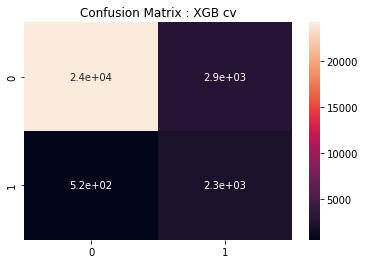

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
X_train , X_cv , y_train , y_cv = trainA.iloc[0:114233,:],trainA.iloc[114233:,:],target[0:114233],target[114233:]

#https://scikit-learn.org/stable/modules/preprocessing.html
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

clf = xgb.XGBClassifier( 
        base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=0.5, colsample_bytree=0.9871152273968631, eval_metric='auc',
              gamma=5.7286862437406345, learning_rate=0.1, max_delta_step=1, max_depth=5,
              min_child_weight=4, missing=None, n_estimators=100, n_jobs=1,
              nthread=-1, objective='binary:logistic', random_state=3,
              reg_alpha=47, reg_lambda=0.9511834927999878, scale_pos_weight=10.94848913235554,
              seed=None, silent=None, subsample=1,#tree_method = 'gpu_hist',
              verbosity=1
                        )
clf.fit(X_train,y_train, 
            eval_set = [(X_cv,y_cv)],
            verbose=50, eval_metric = 'auc', early_stopping_rounds=2000)
y_cv_pred = clf.predict(X_cv)
y_cv_pred_prob = clf.predict_proba(X_cv)
cf_matrix = confusion_matrix(y_cv, y_cv_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix : XGB cv')
print('='*100)
roc_xgb_cv = roc_auc_score(y_cv, clf.predict_proba(X_cv)[:, 1])
roc_xgb_train = roc_auc_score(y_train,clf.predict_proba(X_train)[:, 1])
print('AUC train:',roc_xgb_train)
print('AUC cv :',roc_xgb_cv)

print('='*100)

test1 = clf.predict_proba(testA[0:100000])[:,1]
test2_ = clf.predict_proba(testA[100000:150000])[:,1]
test3 = clf.predict_proba(testA[150000:200000])[:,1]
test4 = clf.predict_proba(testA[200000:300000])[:,1]
test5 = clf.predict_proba(testA[300000:400000])[:,1]
test6 = clf.predict_proba(testA[400000:500000])[:,1]
test7 = clf.predict_proba(testA[500000:])[:,1]
y_test = list(test1)+list(test2_)+list(test3)+list(test4)+list(test5)+list(test6)+list(test7)
Output = pd.DataFrame(np.column_stack((Trans,y_test)),columns=['TransactionID','isFraud'])
Output['TransactionID'] = [int(i) for i in Trans]
print(Output.head())
Output.to_csv('SubmissionXGB_hyp.csv',index = False)
files.download('SubmissionXGB_hyp.csv')

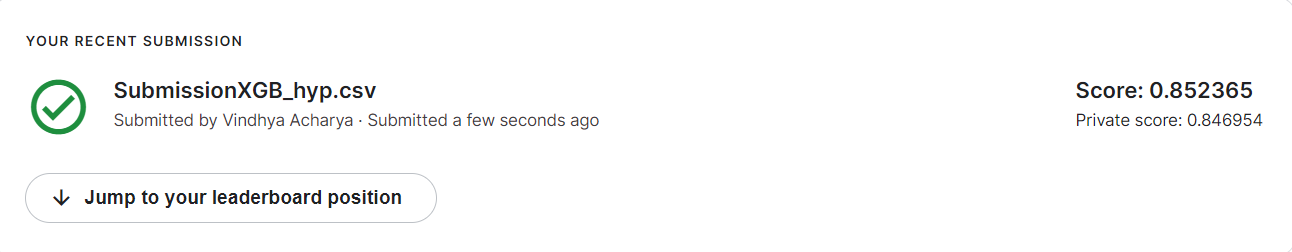

###Base Models

###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

Time series split

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit()
for train_index, cv_index in tscv.split(trainA):
  X_train, X_cv = trainA.iloc[train_index,:], trainA.iloc[cv_index,:]
  y_train, y_cv = target[train_index], target[cv_index]
  clf = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight='balanced', 
                         random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=-1, l1_ratio=None)
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_train)
  y_pred_proba = clf.predict_proba(X_train)[:,1]
  y_cv_pred = clf.predict(X_cv)
  y_cv_pred_prob = clf.predict_proba(X_cv)[:,1]
  roc_lr_cv = roc_auc_score(y_cv, clf.predict_proba(X_cv)[:, 1])
  roc_lr_train = roc_auc_score(y_train,y_pred_proba)
  print('AUC train:',roc_lr_train)
  print('AUC cv :',roc_lr_cv)
  print('='*100)



AUC train: 0.8171266010613728
AUC cv : 0.8048445495371016
AUC train: 0.8047675046486977
AUC cv : 0.545532913722454
AUC train: 0.7916691401993797
AUC cv : 0.6139175351686984
AUC train: 0.768492578267536
AUC cv : 0.709049144600632
AUC train: 0.749701286967672
AUC cv : 0.6897440162440771


In [ ]:
testA.shape,trainA.shape

((506691, 425), (144233, 425))

In [ ]:
test1 = clf.predict_proba(testA[0:100000])[:,1]
test2_ = clf.predict_proba(testA[100000:150000])[:,1]
test3 = clf.predict_proba(testA[150000:200000])[:,1]
test4 = clf.predict_proba(testA[200000:300000])[:,1]
test5 = clf.predict_proba(testA[300000:400000])[:,1]
test6 = clf.predict_proba(testA[400000:500000])[:,1]
test7 = clf.predict_proba(testA[500000:])[:,1]
y_test = list(test1)+list(test2_)+list(test3)+list(test4)+list(test5)+list(test6)+list(test7)
Output = pd.DataFrame(np.column_stack((Trans,y_test)),columns=['TransactionID','isFraud'])
Output['TransactionID'] = [int(i) for i in Trans]
Output.to_csv('SubmissionA.csv',index = False)
print(Output.head())
files.download('SubmissionA.csv')
#files.download('Submission2.csv')

   TransactionID   isFraud
0        3663549  0.415267
1        3663550  0.434859
2        3663551  0.445469
3        3663552  0.424403
4        3663553  0.422987


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

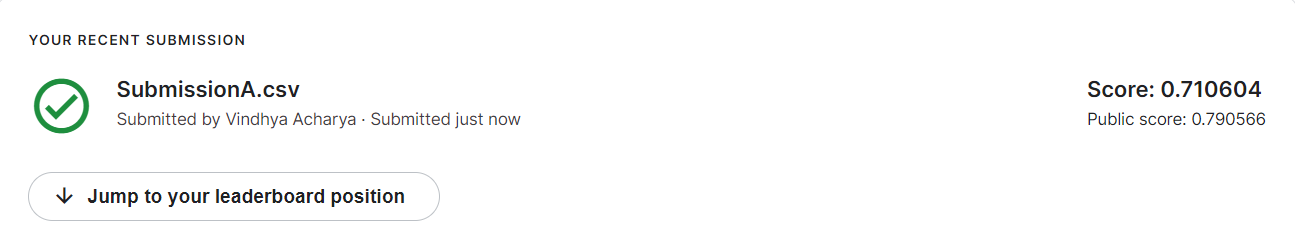

AUC train: 0.8094563296161188
AUC cv : 0.79095388149158


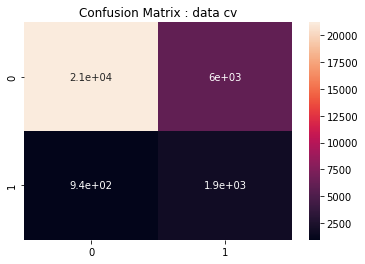

In [ ]:
X_train , X_cv , y_train , y_cv = trainA.iloc[0:114233,:],trainA.iloc[114233:,:],target[0:114233],target[114233:]
#https://scikit-learn.org/stable/modules/preprocessing.html
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

clf = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight='balanced', 
                         random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=-1, l1_ratio=None)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_train)
y_pred_proba = clf.predict_proba(X_train)[:,1]
y_cv_pred = clf.predict(X_cv)
y_cv_pred_prob = clf.predict_proba(X_cv)[:,1]

cf_matrix = confusion_matrix(y_cv, y_cv_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix : data cv')
print('='*100)
roc_lr_cv = roc_auc_score(y_cv, clf.predict_proba(X_cv)[:, 1])
roc_lr_train = roc_auc_score(y_train,y_pred_proba)
print('AUC train:',roc_lr_train)
print('AUC cv :',roc_lr_cv)
print('='*100)
test1 = clf.predict(testA[0:100000])
test2_ = clf.predict(testA[100000:150000])
test3 = clf.predict(testA[150000:200000])
test4 = clf.predict(testA[200000:300000])
test5 = clf.predict(testA[300000:400000])
test6 = clf.predict(testA[400000:500000])
test7 = clf.predict(testA[500000:])
y_test = list(test1)+list(test2_)+list(test3)+list(test4)+list(test5)+list(test6)+list(test7)
Output = pd.DataFrame(np.column_stack((Trans,y_test)),columns=['TransactionID','isFraud'])
Output.to_csv('SubmissionA.csv',index = False)
files.download('SubmissionA.csv')
#files.download('Submission2.csv')

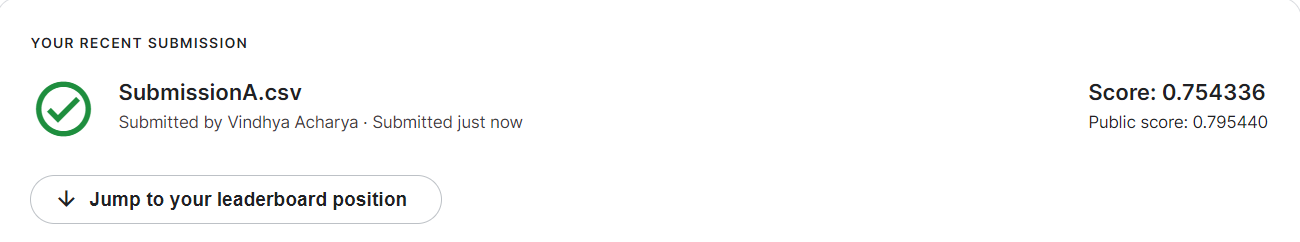

K Fold Validation

In [ ]:
#https://machinelearningmastery.com/out-of-fold-predictions-in-machine-learning/
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
scores = list()
kfold = KFold(n_splits=10, shuffle=True)

kfold = KFold(n_splits=10, shuffle=True)
# enumerate splits
for train_ix, test_ix in kfold.split(trainA):
  train_X=trainA.iloc[train_ix,:]
  test_X=trainA.iloc[test_ix,:]
  train_y=target[train_ix]
  test_y=target[test_ix]
  clf=LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight='balanced', 
                         random_state=None, solver='lbfgs', max_iter=100,
                          multi_class='auto', verbose=0, warm_start=False, n_jobs=-1, l1_ratio=None)
  clf.fit(train_X,train_y)
  roc_lr_cv=roc_auc_score(test_y, clf.predict_proba(test_X)[:, 1])
  scores.append(roc_lr_cv)
  print('> ', roc_lr_cv)

>  0.7682453182716262
>  0.7799657847081094
>  0.7664624748763641
>  0.771391743940885
>  0.7637714407554942
>  0.7785479480921565
>  0.7588629311151208
>  0.7714228042644286
>  0.7746353879104554
>  0.7801851407986568


In [ ]:
print('Mean AUC score:',np.mean(scores))

Mean AUC score: 0.7713490974733298


###svc

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


AUC cv : 0.5651988780927598
   TransactionID   isFraud
0        3663549  0.028373
1        3663550  0.028373
2        3663551  0.028373
3        3663552  0.028373
4        3663553  0.028373


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

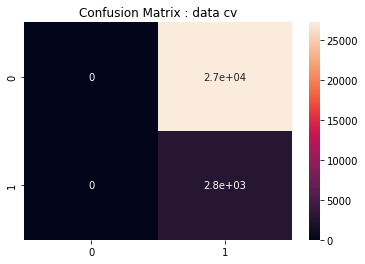

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_cv , y_train , y_cv = trainA.iloc[0:114233,:],trainA.iloc[114233:,:],target[0:114233],target[114233:]
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
#https://scikit-learn.org/stable/modules/preprocessing.html

clf = make_pipeline(StandardScaler(),SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=True,
                                           tol=0.001, cache_size=200, class_weight='balanced', verbose=False,
                                           max_iter=100, decision_function_shape='ovr', break_ties=False, random_state=None))
clf.fit(X_train, y_train)
y_cv_pred = clf.predict(X_cv)
y_cv_pred_prob = clf.predict_proba(X_cv)
y_pred_prob = clf.predict_proba(X_train)
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
import seaborn as sns
cf_matrix = confusion_matrix(y_cv, y_cv_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix : data cv')
print('='*100)
roc_svc_cv = roc_auc_score(y_cv, clf.predict_proba(X_cv)[:, 1])
#roc_svc_train = roc_auc_score(y_train,y_pred_proba)
#print('AUC train:',roc_svc_train)
print('AUC cv :',roc_svc_cv)


print('='*100)


test1 = clf.predict_proba(testA[0:100000])[:,1]
test2_ = clf.predict_proba(testA[100000:150000])[:,1]
test3 = clf.predict_proba(testA[150000:200000])[:,1]
test4 = clf.predict_proba(testA[200000:300000])[:,1]
test5 = clf.predict_proba(testA[300000:400000])[:,1]
test6 = clf.predict_proba(testA[400000:500000])[:,1]
test7 = clf.predict_proba(testA[500000:])[:,1]
y_test = list(test1)+list(test2_)+list(test3)+list(test4)+list(test5)+list(test6)+list(test7)
Output = pd.DataFrame(np.column_stack((Trans,y_test)),columns=['TransactionID','isFraud'])
Output['TransactionID'] = [int(i) for i in Trans]
print(Output.head())
Output.to_csv('SubmissionSVC.csv',index = False)
files.download('SubmissionSVC.csv')

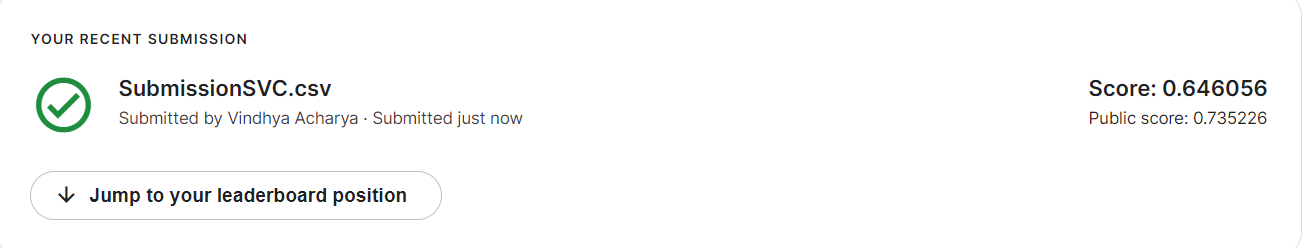

###Naive Bayes

(114233,)
AUC train: 0.6358237835566318
AUC cv : 0.6216042961759953
   TransactionID        isFraud
0        3663549   5.752510e-94
1        3663550   4.493282e-94
2        3663551  3.490107e-113
3        3663552   9.151810e-93
4        3663553   3.938884e-94


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

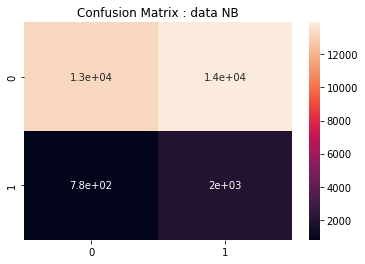

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#https://scikit-learn.org/stable/modules/preprocessing.html
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea


#75-25 split
X_train , X_cv , y_train , y_cv =  trainA.iloc[0:114233,:],trainA.iloc[114233:,:],target[0:114233],target[114233:]
clf = GaussianNB()
clf.fit(X_train, y_train)

print(y_train.shape)
y_cv_pred = clf.predict(X_cv)
y_cv_pred_prob = clf.predict_proba(X_cv)
cf_matrix = confusion_matrix(y_cv, y_cv_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix : data NB')
print('='*100)
roc_nb_cv = roc_auc_score(y_cv, clf.predict_proba(X_cv)[:, 1])
roc_nb_train = roc_auc_score(y_train,clf.predict_proba(X_train)[:,1])
print('AUC train:',roc_nb_train)
print('AUC cv :',roc_nb_cv)

print('='*100)

test1 = clf.predict_proba(testA[0:100000])[:,1]
test2_ = clf.predict_proba(testA[100000:150000])[:,1]
test3 = clf.predict_proba(testA[150000:200000])[:,1]
test4 = clf.predict_proba(testA[200000:300000])[:,1]
test5 = clf.predict_proba(testA[300000:400000])[:,1]
test6 = clf.predict_proba(testA[400000:500000])[:,1]
test7 = clf.predict_proba(testA[500000:])[:,1]
y_test = list(test1)+list(test2_)+list(test3)+list(test4)+list(test5)+list(test6)+list(test7)
Output = pd.DataFrame(np.column_stack((Trans,y_test)),columns=['TransactionID','isFraud'])
Output['TransactionID'] = [int(i) for i in Trans]
print(Output.head())
Output.to_csv('SubmissionNB.csv',index = False)
files.download('SubmissionNB.csv')

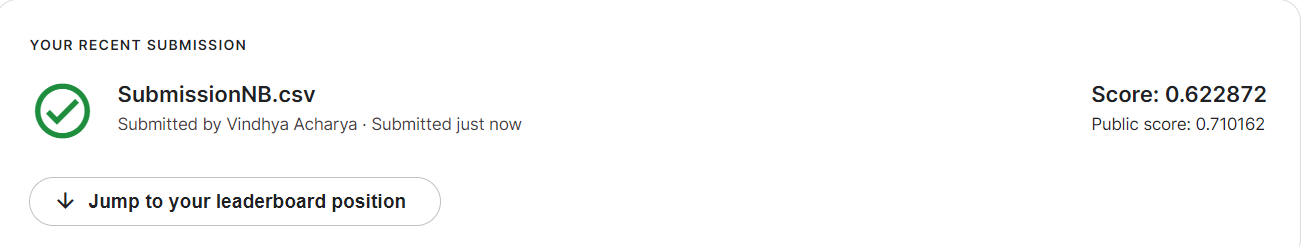

###Decision Tree

AUC train: 1.0
AUC cv : 0.6641137330131813
   TransactionID  isFraud
0        3663549      0.0
1        3663550      0.0
2        3663551      0.0
3        3663552      0.0
4        3663553      0.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

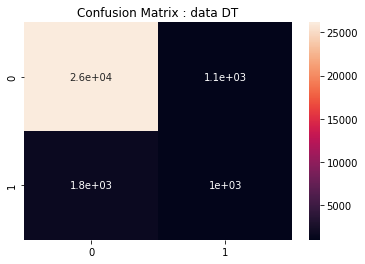

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_cv , y_train , y_cv = trainA.iloc[0:114233,:],trainA.iloc[114233:,:],target[0:114233],target[114233:]
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#https://scikit-learn.org/stable/modules/preprocessing.html


clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1,
                                            min_weight_fraction_leaf=0.0,max_features=None, random_state=42, max_leaf_nodes=None, 
                                            min_impurity_decrease=0.0, class_weight='balanced', ccp_alpha=0.0)
clf.fit(X_train, y_train)
y_cv_pred = clf.predict(X_cv)
y_cv_pred_prob = clf.predict_proba(X_cv)
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
import seaborn as sns
cf_matrix = confusion_matrix(y_cv, y_cv_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix : data DT')
print('='*100)
roc_dt_cv = roc_auc_score(y_cv, clf.predict_proba(X_cv)[:, 1])
roc_dt_train = roc_auc_score(y_train,clf.predict_proba(X_train)[:, 1])
print('AUC train:',roc_dt_train)
print('AUC cv :',roc_dt_cv)

print('='*100)

test1 = clf.predict_proba(testA[0:100000])[:,1]
test2_ = clf.predict_proba(testA[100000:150000])[:,1]
test3 = clf.predict_proba(testA[150000:200000])[:,1]
test4 = clf.predict_proba(testA[200000:300000])[:,1]
test5 = clf.predict_proba(testA[300000:400000])[:,1]
test6 = clf.predict_proba(testA[400000:500000])[:,1]
test7 = clf.predict_proba(testA[500000:])[:,1]
y_test = list(test1)+list(test2_)+list(test3)+list(test4)+list(test5)+list(test6)+list(test7)
Output = pd.DataFrame(np.column_stack((Trans,y_test)),columns=['TransactionID','isFraud'])
Output['TransactionID'] = [int(i) for i in Trans]
print(Output.head())
Output.to_csv('SubmissionDT.csv',index = False)
files.download('SubmissionDT.csv')

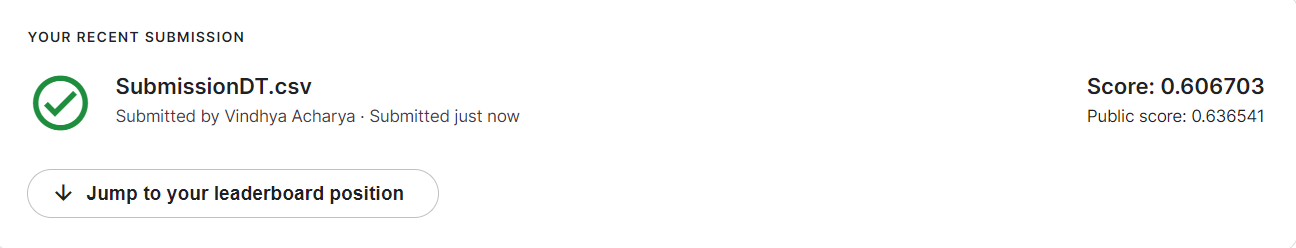

###Random Forest

AUC train: 0.749701286967672
AUC cv : 0.6897440162440771
   TransactionID  isFraud
0        3663549     0.02
1        3663550     0.04
2        3663551     0.08
3        3663552     0.01
4        3663553     0.04


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

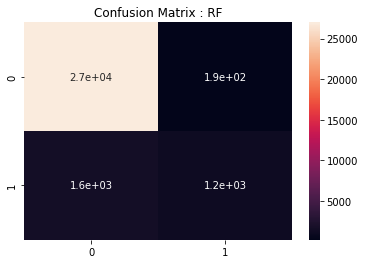

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_cv , y_train , y_cv = trainA.iloc[0:114233,:],trainA.iloc[114233:,:],target[0:114233],target[114233:]
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#https://scikit-learn.org/stable/modules/preprocessing.html

clf = RandomForestClassifier(n_estimators=100,class_weight='balanced',random_state=42,n_jobs=-1)
clf.fit(X_train, y_train)
y_cv_pred = clf.predict(X_cv)
y_cv_pred_prob = clf.predict_proba(X_cv)
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
import seaborn as sns
cf_matrix = confusion_matrix(y_cv, y_cv_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix : RF')
print('='*100)
roc_rf_cv = roc_auc_score(y_cv, clf.predict_proba(X_cv)[:, 1])
roc_rf_train = roc_auc_score(y_train,clf.predict_proba(X_train)[:, 1])
print('AUC train:',roc_lr_train)
print('AUC cv :',roc_lr_cv)

print('='*100)

test1 = clf.predict_proba(testA[0:100000])[:,1]
test2_ = clf.predict_proba(testA[100000:150000])[:,1]
test3 = clf.predict_proba(testA[150000:200000])[:,1]
test4 = clf.predict_proba(testA[200000:300000])[:,1]
test5 = clf.predict_proba(testA[300000:400000])[:,1]
test6 = clf.predict_proba(testA[400000:500000])[:,1]
test7 = clf.predict_proba(testA[500000:])[:,1]
y_test = list(test1)+list(test2_)+list(test3)+list(test4)+list(test5)+list(test6)+list(test7)
Output = pd.DataFrame(np.column_stack((Trans,y_test)),columns=['TransactionID','isFraud'])
Output['TransactionID'] = [int(i) for i in Trans]
print(Output.head())
Output.to_csv('SubmissionRF.csv',index = False)
files.download('SubmissionRF.csv')

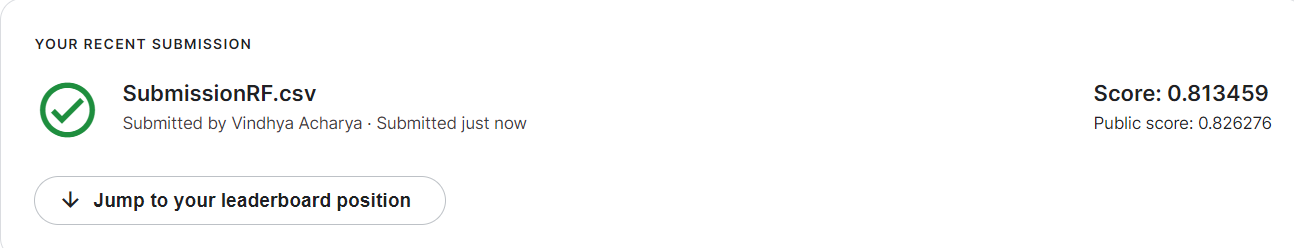

###XGBoost

In [ ]:
trainA.shape,testA.shape

((144233, 425), (506691, 425))

[0]	validation_0-auc:0.834503
Will train until validation_0-auc hasn't improved in 2000 rounds.
[50]	validation_0-auc:0.907775
[99]	validation_0-auc:0.919938
AUC train: 0.9547258457116112
AUC cv : 0.9199379032310129
   TransactionID   isFraud
0        3663549  0.153350
1        3663550  0.283447
2        3663551  0.238979
3        3663552  0.844676
4        3663553  0.683937


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

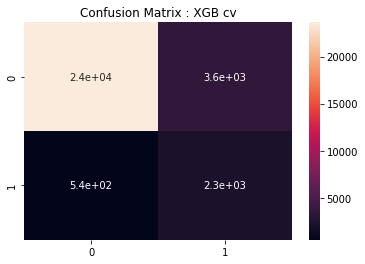

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import xgboost as xgb
#https://scikit-learn.org/stable/modules/preprocessing.html
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
#X_train , X_cv , y_train , y_cv = train_test_split(trainA,target,test_size = 0.2)
X_train , X_cv , y_train , y_cv = trainA.iloc[0:114233,:],trainA.iloc[114233:,:],target[0:114233],target[114233:]
clf = xgb.XGBClassifier( base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=3,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10.94848913235554,
              seed=None, silent=None, subsample=1,
              verbosity=1)
clf.fit(X_train,y_train, 
            eval_set = [(X_cv,y_cv)],
            verbose=50, early_stopping_rounds=2000)
y_cv_pred = clf.predict(X_cv)
y_cv_pred_proba = clf.predict_proba(X_cv)[:,1]
cf_matrix = confusion_matrix(y_cv, y_cv_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix : XGB cv')
print('='*100)
roc_xgb_cv = roc_auc_score(y_cv, clf.predict_proba(X_cv)[:, 1])
roc_xgb_train = roc_auc_score(y_train,clf.predict_proba(X_train)[:, 1])
print('AUC train:',roc_xgb_train)
print('AUC cv :',roc_xgb_cv)

print('='*100)

test1 = clf.predict_proba(testA[0:100000])[:,1]
test2_ = clf.predict_proba(testA[100000:150000])[:,1]
test3 = clf.predict_proba(testA[150000:200000])[:,1]
test4 = clf.predict_proba(testA[200000:300000])[:,1]
test5 = clf.predict_proba(testA[300000:400000])[:,1]
test6 = clf.predict_proba(testA[400000:500000])[:,1]
test7 = clf.predict_proba(testA[500000:])[:,1]
y_test = list(test1)+list(test2_)+list(test3)+list(test4)+list(test5)+list(test6)+list(test7)
Output = pd.DataFrame(np.column_stack((Trans,y_test)),columns=['TransactionID','isFraud'])
Output['TransactionID'] = [int(i) for i in Trans]
print(Output.head())
Output.to_csv('SubmissionXGB.csv',index = False)
files.download('SubmissionXGB.csv')

In [ ]:
#https://machinelearningmastery.com/out-of-fold-predictions-in-machine-learning/
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import xgboost as xgb
scores = list()
kfold = KFold(n_splits=10, shuffle=True)

kfold = KFold(n_splits=10, shuffle=True)
# enumerate splits
for train_ix, test_ix in kfold.split(trainA):
  train_X=trainA.iloc[train_ix,:]
  test_X=trainA.iloc[test_ix,:]
  train_y=target[train_ix]
  test_y=target[test_ix]
  clf=xgb.XGBClassifier()
  clf.fit(train_X,train_y)
  roc_lr_cv=roc_auc_score(test_y, clf.predict_proba(test_X)[:, 1])
  scores.append(roc_lr_cv)
  print('> ', roc_lr_cv)

Hyperopt

In [ ]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
import xgboost as xgb
from sklearn.metrics import accuracy_score
#https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning/notebook

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }


def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_cv, y_cv)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(testA)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }


trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

Hyper Parameter Tuning

{'colsample_bytree': 0.9871152273968631, 'gamma': 5.7286862437406345, 'max_depth': 12.0, 'min_child_weight': 4.0, 'reg_alpha': 47.0, 'reg_lambda': 0.9511834927999878}

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
estimator  = xgb.XGBClassifier( 
        base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9871152273968631, eval_metric='auc',
              gamma=5.7286862437406345, learning_rate=0.1, max_delta_step=0, max_depth=12.0,
              min_child_weight=4.0, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=3,
              reg_alpha=47.0, reg_lambda=0.9511834927999878, scale_pos_weight=10.94848913235554,
              seed=None, silent=None, subsample=1,tree_method = 'gpu_hist',
              verbosity=1
                        )
parameter = {'n_estimators':[10,50,100,500,1000]
              }

clf = GridSearchCV(estimator,parameter ,cv = 5 , scoring = 'roc_auc',n_jobs = -1,verbose=3)
clf.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [ ]:
trainA.shape,testA.shape

[0]	validation_0-auc:0.809024
Will train until validation_0-auc hasn't improved in 100 rounds.
[50]	validation_0-auc:0.914502
[99]	validation_0-auc:0.92294
AUC train: 0.9678956510498644
AUC cv : 0.922939722076176
   TransactionID   isFraud
0        3663549  0.159485
1        3663550  0.135085
2        3663551  0.109056
3        3663552  0.530873
4        3663553  0.530645


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

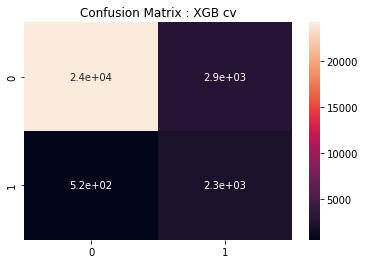

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
X_train , X_cv , y_train , y_cv = trainA.iloc[0:114233,:],trainA.iloc[114233:,:],target[0:114233],target[114233:]

#https://scikit-learn.org/stable/modules/preprocessing.html
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

clf = xgb.XGBClassifier( 
        base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=0.5, colsample_bytree=0.9871152273968631, eval_metric='auc',
              gamma=5.7286862437406345, learning_rate=0.1, max_delta_step=1, max_depth=5,
              min_child_weight=4, missing=None, n_estimators=100, n_jobs=1,
              nthread=-1, objective='binary:logistic', random_state=3,
              reg_alpha=47, reg_lambda=0.9511834927999878, scale_pos_weight=10.94848913235554,
              seed=None, silent=None, subsample=1,#tree_method = 'gpu_hist',
              verbosity=1
                        )
clf.fit(X_train,y_train, 
            eval_set = [(X_cv,y_cv)],
            verbose=50, eval_metric = 'auc', early_stopping_rounds=100)
y_cv_pred = clf.predict(X_cv)
y_cv_pred_prob = clf.predict_proba(X_cv)
cf_matrix = confusion_matrix(y_cv, y_cv_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix : XGB cv')
print('='*100)
roc_xgb_cv = roc_auc_score(y_cv, clf.predict_proba(X_cv)[:, 1])
roc_xgb_train = roc_auc_score(y_train,clf.predict_proba(X_train)[:, 1])
print('AUC train:',roc_xgb_train)
print('AUC cv :',roc_xgb_cv)

print('='*100)

test1 = clf.predict_proba(testA[0:100000])[:,1]
test2_ = clf.predict_proba(testA[100000:150000])[:,1]
test3 = clf.predict_proba(testA[150000:200000])[:,1]
test4 = clf.predict_proba(testA[200000:300000])[:,1]
test5 = clf.predict_proba(testA[300000:400000])[:,1]
test6 = clf.predict_proba(testA[400000:500000])[:,1]
test7 = clf.predict_proba(testA[500000:])[:,1]
y_test = list(test1)+list(test2_)+list(test3)+list(test4)+list(test5)+list(test6)+list(test7)
Output = pd.DataFrame(np.column_stack((Trans,y_test)),columns=['TransactionID','isFraud'])
Output['TransactionID'] = [int(i) for i in Trans]
print(Output.head())
Output.to_csv('SubmissionXGB_hyp.csv',index = False)
files.download('SubmissionXGB_hyp.csv')

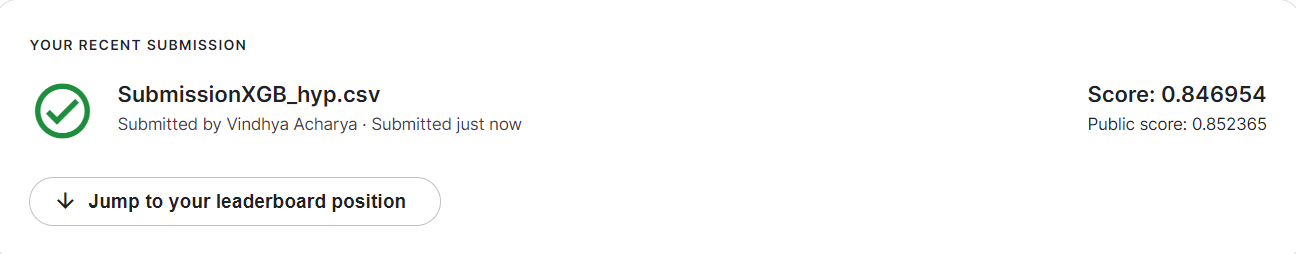

Feature Importance

###Outlier removal

TransactionAmt

In [ ]:
#function to find outliers
def outlier(feature):
  print(trainA[feature].describe())
  sns.set_theme(style="whitegrid")
  print('='*100)
  plt.title(feature+' Violin plot')
  sns.violinplot(x=trainA[feature])
  plt.show()
  print('='*100)
  print('0-100-10 :',np.percentile(trainA[feature],np.arange(0,100,10)))
  print('90-100-01 :',np.percentile(trainA[feature],np.arange(90,100,1)))
  print('99-100-0.1:',np.percentile(trainA[feature],np.arange(99,100,0.1)))
  print('99.9-100-0.01:',np.percentile(trainA[feature],np.arange(99.9,100,0.01)))
  print('='*100)
  plt.plot(trainA[feature])
  print('='*100)
  per99 = np.percentile(trainA[feature],99.9)
  index99 = trainA[feature][trainA[feature]>=per99].index
  print('Outliers:',len(index99))
  print(index99)
  return index99

count    144233.000000
mean          0.046286
std           0.055480
min           0.000000
25%           0.014003
50%           0.027642
75%           0.055424
max           1.000000
Name: TransactionAmt, dtype: float64


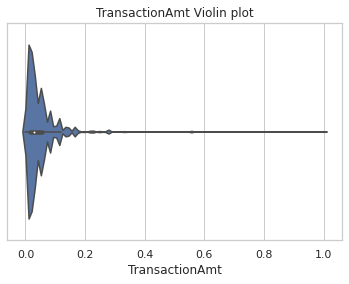

0-100-10 : [0.         0.00819503 0.01372969 0.01652953 0.02329325 0.02764219
 0.04153301 0.05542384 0.06080237 0.11098714]
90-100-01 : [0.11098714 0.11098714 0.11098714 0.11098714 0.11769728 0.13876879
 0.13876879 0.16655045 0.1943321  0.27767705]
99-100-0.1: [0.27767705 0.27767705 0.27767705 0.27767705 0.33324036 0.33324036
 0.41658531 0.48603944 0.55549357 0.55549357]
99.9-100-0.01: [0.55549357 0.55549357 0.55549357 0.55549357 0.55549357 0.55549357
 0.55549357 0.66662018 0.77774679 0.83331009]
Outliers: 356
Int64Index([   618,   4605,   4993,   6233,   6234,   6242,   6273,   6280,
              6281,   6282,
            ...
            126797, 129295, 129299, 129525, 129737, 131313, 137231, 137235,
            137236, 137240],
           dtype='int64', length=356)


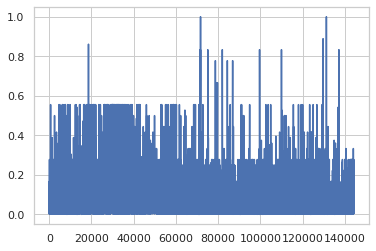

In [ ]:
drop = outlier('TransactionAmt')
try:
  trainB = trainA.drop(drop)
  targetB = target.drop(drop)
except KeyError as e:
  print('index already dropped')

count    144233.000000
mean       -418.413742
std         493.139660
min        -999.000000
25%        -999.000000
50%           0.190909
75%           0.488636
max           1.000000
Name: addr1, dtype: float64


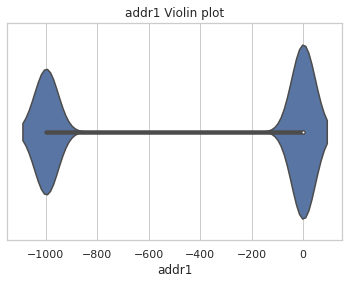

0-100-10 : [-9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02
 -9.99000000e+02  1.90909091e-01  3.47727273e-01  4.52272727e-01
  5.15909091e-01  6.52272727e-01]
90-100-01 : [0.65227273 0.74545455 0.775      0.775      0.775      0.82954545
 0.84545455 0.85454545 0.89090909 0.93636364]
99-100-0.1: [0.93636364 0.93636364 0.93636364 0.93636364 0.93636364 0.93636364
 0.93636364 0.93636364 0.99090909 0.99090909]
99.9-100-0.01: [0.99090909 0.99090909 0.99090909 0.99090909 0.99090909 0.99090909
 0.99090909 0.99090909 0.99090909 0.99090909]
Outliers: 300
Int64Index([   206,    208,    302,    601,    701,   1366,   3121,   3248,
              3252,   3310,
            ...
            141483, 142830, 142831, 142832, 143023, 143024, 143025, 143042,
            143044, 143045],
           dtype='int64', length=300)
index already dropped


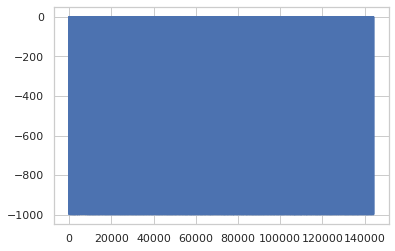

In [ ]:
drop = outlier('addr1')
try:
  trainB = trainB.drop(drop)
  targetB = targetB.drop(drop)
except KeyError as e:
  print('index already dropped')

count    144233.000000
mean       -738.614671
std         438.555532
min        -999.000000
25%        -999.000000
50%        -999.000000
75%           0.000000
max           1.000000
Name: dist2, dtype: float64


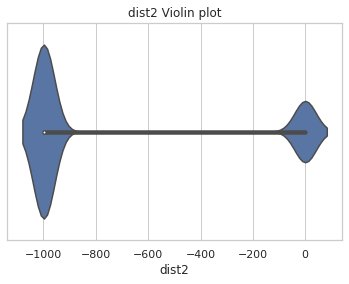

0-100-10 : [-9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02
 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02
  6.02254151e-04  8.68966704e-03]
90-100-01 : [0.00868967 0.01135679 0.01307752 0.01686312 0.01996042 0.02761765
 0.03759787 0.04843844 0.06814076 0.11907425]
99-100-0.1: [0.11907425 0.12690355 0.13826035 0.15162832 0.16269466 0.17306375
 0.18334337 0.19756552 0.21253446 0.24959133]
99.9-100-0.01: [0.24959133 0.30174082 0.32933969 0.37390539 0.41893542 0.47454736
 0.49204164 0.50622414 0.52813614 0.60079153]
Outliers: 146
Int64Index([   888,   1269,   3426,   4143,   5089,   5092,   5915,   8009,
              8371,   8374,
            ...
            120974, 124064, 124070, 128773, 128779, 129773, 132749, 132865,
            134106, 143371],
           dtype='int64', length=146)


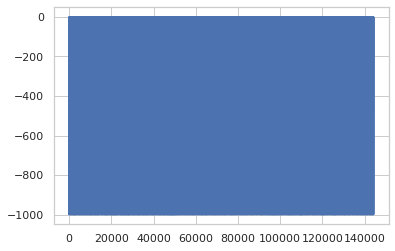

In [ ]:
drop = outlier('dist2')
try:
  trainB = trainB.drop(drop)
  targetB = targetB.drop(drop)
except KeyError as e:
  print('index already dropped')

count    144233.000000
mean       -479.996152
std         499.165278
min        -999.000000
25%        -999.000000
50%           0.000049
75%           0.026374
max           1.000000
Name: D8, dtype: float64


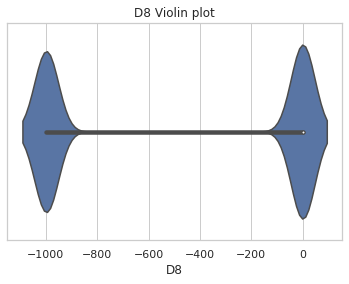

0-100-10 : [-9.99000000e+02 -9.99000000e+02 -9.99000000e+02 -9.99000000e+02
 -9.99000000e+02  4.87957660e-05  5.36755162e-04  1.15402440e-02
  5.27484352e-02  1.46461077e-01]
90-100-01 : [0.14646108 0.16156635 0.18242369 0.20498695 0.22951181 0.26801182
 0.3225657  0.3976139  0.47354918 0.52352405]
99-100-0.1: [0.52352405 0.53092444 0.54152021 0.55319981 0.56390096 0.58066024
 0.60487649 0.66523944 0.67217744 0.69432126]
99.9-100-0.01: [0.69432126 0.69773347 0.69935805 0.7008122  0.70146441 0.717732
 0.72293656 0.72911729 0.75570307 0.75869368]
Outliers: 145
Int64Index([ 18436,  33144,  33188,  67118,  76657,  76662,  76685,  76686,
             76730,  76733,
            ...
            139766, 140054, 140219, 140261, 140336, 140337, 142087, 142088,
            143214, 144136],
           dtype='int64', length=145)
index already dropped


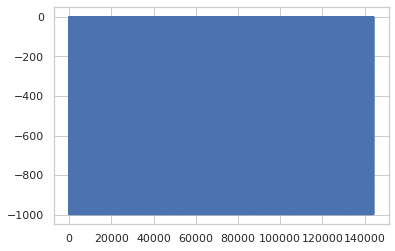

In [ ]:
drop = outlier('D8')
try:
  trainB = trainB.drop(drop)
  targetB = targetB.drop(drop)
except KeyError as e:
  print('index already dropped')

count    144233.000000
mean       -433.514713
std         495.126092
min        -999.000000
25%        -999.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: V166, dtype: float64


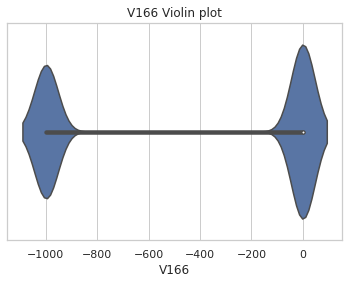

0-100-10 : [-9.9900000e+02 -9.9900000e+02 -9.9900000e+02 -9.9900000e+02
 -9.9900000e+02  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  1.9219681e-03]
90-100-01 : [0.00192197 0.00288295 0.00480492 0.0102536  0.0118201  0.01507765
 0.02157409 0.02609072 0.02946793 0.03687988]
99-100-0.1: [0.03687988 0.03785297 0.03881415 0.03977494 0.04275399 0.04465224
 0.04657081 0.04823179 0.05044186 0.05415145]
99.9-100-0.01: [0.05415145 0.05511244 0.05583317 0.05612147 0.05708245 0.05765904
 0.07687872 0.07928118 0.08648856 0.19293177]
Outliers: 146
Int64Index([  6907,   6918,  23097,  23099,  23100,  23103,  23105,  23107,
             23108,  23110,
            ...
            142721, 142723, 142762, 142775, 142782, 142890, 142925, 142942,
            142944, 144088],
           dtype='int64', length=146)
index already dropped


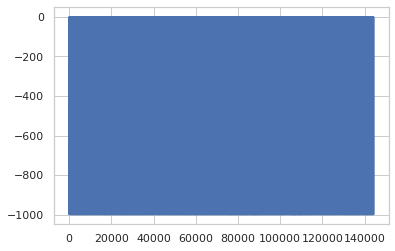

In [ ]:
drop = outlier('V166')
try:
  trainB = trainB.drop(drop)
  targetB = targetB.drop(drop)
except KeyError as e:
  print('index already dropped')

In [ ]:
drop = outlier('V309')
try:
  trainB = trainB.drop(drop)
  targetB = targetB.drop(drop)
except KeyError as e:
  print('index already dropped')

KeyError: ignored

count    144233.000000
mean         -1.507504
std          38.809277
min        -999.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: V313, dtype: float64


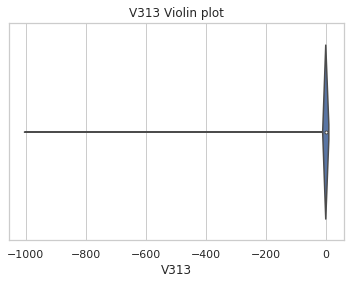

0-100-10 : [-9.99000000e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  4.50959385e-03]
90-100-01 : [0.00450959 0.00623633 0.00771294 0.00938967 0.01212121 0.01515152
 0.01889389 0.02673127 0.03030303 0.03922   ]
99-100-0.1: [0.03922    0.04545455 0.04545455 0.04853516 0.05829406 0.06060606
 0.06969697 0.09090909 0.12121212 0.18181818]
99.9-100-0.01: [0.18181818 0.19841818 0.23658182 0.27272727 0.28030303 0.3030303
 0.3030303  0.3030303  0.3030303  0.35081212]
Outliers: 169
Int64Index([  4993,   5368,   6246,   6277,   6314,   8131,   8133,   8309,
              8738,   8745,
            ...
            126752, 126834, 126858, 131440, 136152, 136800, 139116, 139779,
            139780, 140361],
           dtype='int64', length=169)
index already dropped


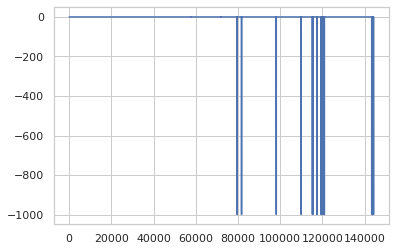

In [ ]:
drop = outlier('V313')
try:
  trainB = trainB.drop(drop)
  targetB = targetB.drop(drop)
except KeyError as e:
  print('index already dropped')

In [ ]:
drop = outlier('V319')
try:
  trainB = trainB.drop(drop)
  targetB = targetB.drop(drop)
except KeyError as e:
  print('index already dropped')

KeyError: ignored

count    144233.000000
mean       -129.537575
std         437.689578
min        -999.000000
25%           0.000000
50%           0.000000
75%           3.000000
max        1785.000000
Name: DeviceInfo, dtype: float64


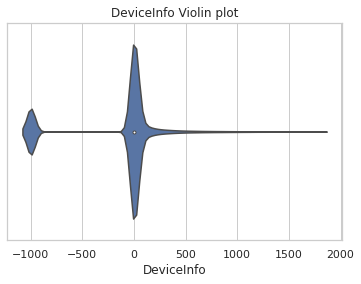

0-100-10 : [-999. -999.    0.    0.    0.    0.    1.    2.    5.  103.]
90-100-01 : [103.   126.   154.   189.   236.   298.   379.   498.   675.36 960.  ]
99-100-0.1: [ 960.     996.    1042.    1090.    1138.    1204.84  1277.    1352.304
 1496.536 1640.768]
99.9-100-0.01: [1640.768  1655.1912 1669.6144 1684.0376 1698.4608 1712.884  1727.3072
 1741.7304 1756.1536 1770.5768]
Outliers: 145
Int64Index([ 33367,  33677,  33769,  34398,  34594,  34824,  34878,  34912,
             36086,  36091,
            ...
            107704, 107998, 108030, 108374, 108466, 108765, 108772, 108805,
            109027, 109184],
           dtype='int64', length=145)


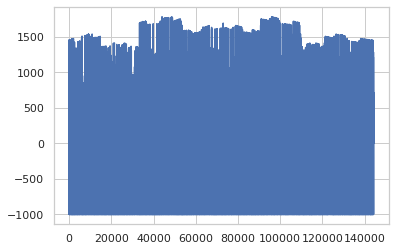

In [ ]:
drop = outlier('DeviceInfo')
try:
  trainB = trainB.drop(drop)
  targetB = targetB.drop(drop)
except KeyError as e:
  print('index already dropped')

In [ ]:
print(trainA.shape,trainB.shape,len(target),len(targetB))

(144233, 194) (143586, 194) 144233 143586


XGB on trainB data with outlier rows eliminated

[0]	validation_0-auc:0.697831
Will train until validation_0-auc hasn't improved in 100 rounds.
[50]	validation_0-auc:0.900172
[99]	validation_0-auc:0.89945
0.9048788583922956
   TransactionID   isFraud
0        3663549  0.059121
1        3663550  0.042051
2        3663551  0.022229
3        3663552  0.199016
4        3663553  0.108656


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

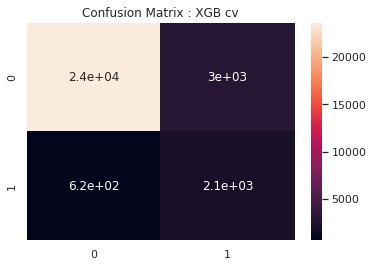

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
X_train , X_cv , y_train , y_cv = trainB.iloc[0:114233,:],trainB.iloc[114233:,:],targetB[0:114233],targetB[114233:]
#https://scikit-learn.org/stable/modules/preprocessing.html
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
clf = xgb.XGBClassifier( 
        base_score=0.5, booster='gbtree', colsample_bylevel=0.2,
              colsample_bynode=0.5, colsample_bytree=0.7, eval_metric='auc',
              gamma=0.9, learning_rate=0.9, max_delta_step=0.5, max_depth=2,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=3,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10.94848913235554,
              seed=None, silent=None, subsample=1,
              verbosity=1,tree_method = 'gpu_hist'
                        )
clf.fit(X_train,y_train, 
            eval_set = [(X_cv,y_cv)],
            verbose=50, early_stopping_rounds=100)
y_cv_pred = clf.predict(X_cv)
y_cv_pred_prob = clf.predict_proba(X_cv)
cf_matrix = confusion_matrix(y_cv, y_cv_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix : XGB cv')
print('='*100)
roc_lr_cv = roc_auc_score(y_cv, clf.predict_proba(X_cv)[:, 1])
print(roc_lr_cv)

print('='*100)

test1 = clf.predict_proba(testA[0:100000])[:,1]
test2_ = clf.predict_proba(testA[100000:150000])[:,1]
test3 = clf.predict_proba(testA[150000:200000])[:,1]
test4 = clf.predict_proba(testA[200000:300000])[:,1]
test5 = clf.predict_proba(testA[300000:400000])[:,1]
test6 = clf.predict_proba(testA[400000:500000])[:,1]
test7 = clf.predict_proba(testA[500000:])[:,1]
y_test = list(test1)+list(test2_)+list(test3)+list(test4)+list(test5)+list(test6)+list(test7)
Output = pd.DataFrame(np.column_stack((Trans,y_test)),columns=['TransactionID','isFraud'])
Output['TransactionID'] = [int(i) for i in Trans]
print(Output.head())
Output.to_csv('SubmissionXGB_hyp_trainB.csv',index = False)
files.download('SubmissionXGB_hyp_trainB.csv')

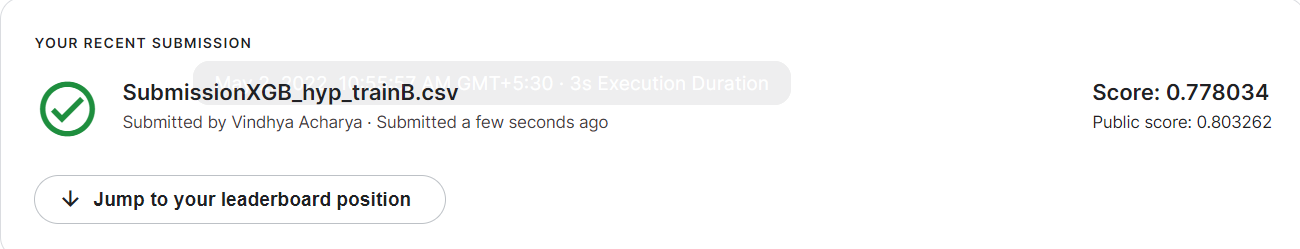

We can see that with outlier removal , auc score did not improve

###Custom Model

In [ ]:
import random
D1 , D2 , T1 , T2 = trainA.iloc[0:114233,:],trainA.iloc[114233:,:],target[0:114233],target[114233:]

k = 5 

#print(len(D1))
#for i in range(k):
sample = random.sample(list(np.arange(len(D1))),len(D1)//k)
D1.iloc[sample,:]
#np.arange(len(D1))
print(D1.shape,D2.shape,len(T1),len(T2))
T1.iloc[sample]

(114233, 194) (30000, 194) 114233 30000


90285     0
76024     0
46843     0
21609     0
94046     1
         ..
87857     0
24627     0
100741    0
71806     1
17968     0
Name: isFraud, Length: 22846, dtype: int64

In [ ]:
trainA.shape
144233/2

72116.5

In [ ]:
from sklearn.model_selection import train_test_split
import random
from sklearn.ensemble import AdaBoostClassifier

#split the data into 75:25 ratio
train , test , y_train , y_test = trainA.iloc[0:int(len(trainA)*.75)],trainA.iloc[int(len(trainA)*.75):,:],target[0:int(len(trainA)*.75)],target[int(len(trainA)*.75):]
#print(train.shape,test.shape,len(y_train),len(y_test))
#splitting train data into 50:50 ratio 
D1 , D2 , T1 , T2 = train.iloc[0:len(train)//2,:],train.iloc[len(train)//2:,:],y_train[0:len(train)//2],y_train[len(train)//2:]

#print(train.iloc[len(train)//2:,:].shape)
#print(D1.shape,D2.shape,len(T1),len(T2))


k = 5 

samples = []

for i in range(k):
  sample = random.sample(list(np.arange(len(D1))),len(D1)//k)
  #print(sample)
  samples.append(sample)

#print(samples[0])
k1 = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight='balanced', 
                         random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=-1, l1_ratio=None)
k1.fit(D1.iloc[samples[0],:],T1.iloc[samples[0]])
k2 = xgb.XGBClassifier( 
        base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9871152273968631, eval_metric='auc',
              gamma=5.7286862437406345, learning_rate=0.1, max_delta_step=0, max_depth=12,
              min_child_weight=4.0, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=3,
              reg_alpha=47.0, reg_lambda=0.9511834927999878, scale_pos_weight=10.94848913235554,
              seed=None, silent=None, subsample=1,#tree_method = 'gpu_hist',
              verbosity=1
                        )
k2.fit(D1.iloc[samples[1],:],T1.iloc[samples[1]])

k3 = AdaBoostClassifier(random_state = 3)
k3.fit(D1.iloc[samples[2],:],T1.iloc[samples[2]])

k4 = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=3,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=27.579586700866283,
              seed=None, silent=None, subsample=1,# tree_method='gpu_hist',
              verbosity=1)
k4.fit(D1.iloc[samples[3],:],T1.iloc[samples[3]])

k5 = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight='balanced', 
                         random_state=None, solver='saga', max_iter=1000, multi_class='auto', verbose=0, warm_start=False, n_jobs=-1, l1_ratio=None)
k5.fit(D1.iloc[samples[4],:],T1.iloc[samples[4]])


pred1 = k1.predict_proba(D2)[:,1]
pred2 = k2.predict_proba(D2)[:,1]
pred3 = k3.predict_proba(D2)[:,1]
pred4 = k4.predict_proba(D2)[:,1]
pred5 = k5.predict_proba(D2)[:,1]

D_final = pd.DataFrame(np.column_stack((pred1,pred2,pred3,pred4,pred5)),columns=('p1','p2','p3','p4','p5'))
print(D_final.shape,len(T2))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


(54087, 5) 54087


(36059, 5)
(36059, 5) 36059
0.9000902924906035


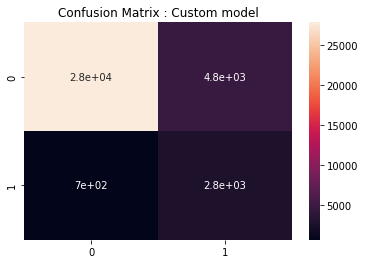

In [ ]:
# meta model 

clf = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight='balanced', 
                         random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=-1, l1_ratio=None)
clf.fit(D_final,T2)

pred1 = k1.predict_proba(test)[:,1]
pred2 = k2.predict_proba(test)[:,1]
pred3 = k3.predict_proba(test)[:,1]
pred4 = k4.predict_proba(test)[:,1]
pred5 = k5.predict_proba(test)[:,1]

test_final = pd.DataFrame(np.column_stack((pred1,pred2,pred3,pred4,pred5)),columns=('p1','p2','p3','p4','p5'))
print(test_final.shape)

p1 = clf.predict_proba(test_final)[:,1]
p2 = clf.predict_proba(test_final)[:,1]
p3 = clf.predict_proba(test_final)[:,1]
p4 = clf.predict_proba(test_final)[:,1]
p5 = clf.predict_proba(test_final)[:,1]

D_cv = pd.DataFrame(np.column_stack((p1,p2,p3,p4,p5)),columns=('p1','p2','p3','p4','p5'))
print(D_cv.shape,len(y_test))

y_pred = clf.predict(D_cv)
#print('Confusion Matrix')
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix : Custom model')
print('='*100)
roc_lr_cv = roc_auc_score(y_test, clf.predict_proba(D_cv)[:, 1])
print(roc_lr_cv)

Metamodel on test data

In [ ]:
pred1 = k1.predict_proba(testA)[:,1]
pred2 = k2.predict_proba(testA)[:,1]
pred3 = k3.predict_proba(testA)[:,1]
pred4 = k4.predict_proba(testA)[:,1]
pred5 = k5.predict_proba(testA)[:,1]

test_final = pd.DataFrame(np.column_stack((pred1,pred2,pred3,pred4,pred5)),columns=('p1','p2','p3','p4','p5'))
print(test_final.shape)

p1 = clf.predict_proba(test_final)[:,1]
p2 = clf.predict_proba(test_final)[:,1]
p3 = clf.predict_proba(test_final)[:,1]
p4 = clf.predict_proba(test_final)[:,1]
p5 = clf.predict_proba(test_final)[:,1]

D_cv = pd.DataFrame(np.column_stack((p1,p2,p3,p4,p5)),columns=('p1','p2','p3','p4','p5'))
print(D_cv.shape)

y_pred = clf.predict_proba(D_cv)[:,1]

Output = pd.DataFrame(np.column_stack((Trans,y_pred)),columns=['TransactionID','isFraud'])
Output['TransactionID'] = [int(i) for i in Trans]
print(Output.head())
Output.to_csv('SubmissionCustom.csv',index = False)
files.download('SubmissionCustom.csv')

(506691, 5)
(506691, 5)
   TransactionID   isFraud
0        3663549  0.036900
1        3663550  0.058931
2        3663551  0.036530
3        3663552  0.997964
4        3663553  0.991131


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

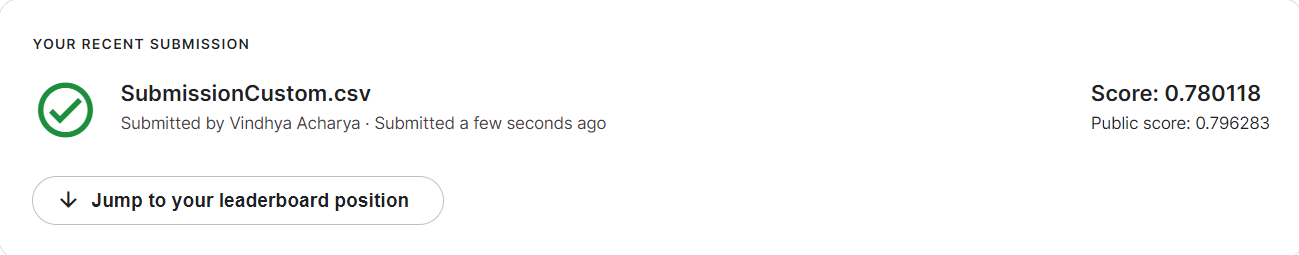

We can see that XGBoost gives better score than all other models

In [ ]:
trainA.shape

(144233, 425)

In [ ]:
trainA.shape,testA.shape
trainA.to_pickle('trainA_425.pkl')
testA.to_pickle('testA_425.pkl')
files.download('testA_425.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###pickle file

In [ ]:
trainA = pd.read_pickle('/content/drive/MyDrive/FraudData/trainScaled.pkl')
testA = pd.read_pickle('/content/drive/MyDrive/FraudData/testScaled.pkl')

###Feature Reduction

In [ ]:
data_temp = data
data_test = data_test

Dropping columns with 100% missing data

In [ ]:
l = data_temp.isna().sum()/len(data)*100
index = data_temp.value_counts().index
for i,j in enumerate(l):
  if j==100:
    print(l.index[i],j)

dist1 100.0
D11 100.0
M1 100.0
M2 100.0
M3 100.0
M5 100.0
M6 100.0
M7 100.0
M8 100.0
M9 100.0
V1 100.0
V2 100.0
V3 100.0
V4 100.0
V5 100.0
V6 100.0
V7 100.0
V8 100.0
V9 100.0
V10 100.0
V11 100.0


In [ ]:
from google.colab import files
data_temp.to_pickle('data_temp.pkl')
files.download('data_temp.pkl')
data_test.to_pickle('data_train.pkl')
#files.download('data_train.pkl')

In [ ]:
data_temp.drop(labels=['dist1','D11','M1','M2','M3','M5','M6','M7','M8','M9','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11'],inplace=True,axis =1)

In [ ]:
data_test.drop(labels=['dist1','D11','M1','M2','M3','M5','M6','M7','M8','M9','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11'],inplace=True,axis =1)

In [ ]:
trainA = data_temp
testA = data_test

[0]	validation_0-auc:0.800769
Will train until validation_0-auc hasn't improved in 100 rounds.
[50]	validation_0-auc:0.914531
[99]	validation_0-auc:0.923278
AUC train: 0.9693771625267532
AUC cv : 0.9234724689785153
   TransactionID   isFraud
0        3663549  0.208857
1        3663550  0.170982
2        3663551  0.132806
3        3663552  0.457190
4        3663553  0.441043


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

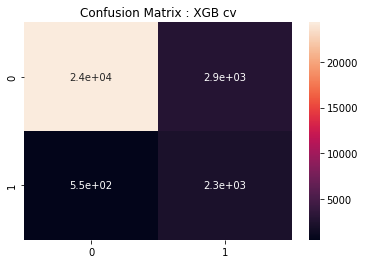

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
X_train , X_cv , y_train , y_cv = trainA.iloc[0:114233,:],trainA.iloc[114233:,:],target[0:114233],target[114233:]

#https://scikit-learn.org/stable/modules/preprocessing.html
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

clf = xgb.XGBClassifier( 
        base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=0.5, colsample_bytree=0.9871152273968631, eval_metric='auc',
              gamma=5.7286862437406345, learning_rate=0.1, max_delta_step=1, max_depth=5,
              min_child_weight=4, missing=None, n_estimators=100, n_jobs=1,
              nthread=-1, objective='binary:logistic', random_state=3,
              reg_alpha=47, reg_lambda=0.9511834927999878, scale_pos_weight=10.94848913235554,
              seed=None, silent=None, subsample=1,#tree_method = 'gpu_hist',
              verbosity=1
                        )
clf.fit(X_train,y_train, 
            eval_set = [(X_cv,y_cv)],
            verbose=50, eval_metric = 'auc', early_stopping_rounds=100)
y_cv_pred = clf.predict(X_cv)
y_cv_pred_prob = clf.predict_proba(X_cv)
cf_matrix = confusion_matrix(y_cv, y_cv_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix : XGB cv')
print('='*100)
roc_xgb_cv = roc_auc_score(y_cv, clf.predict_proba(X_cv)[:, 1])
roc_xgb_train = roc_auc_score(y_train,clf.predict_proba(X_train)[:, 1])
print('AUC train:',roc_xgb_train)
print('AUC cv :',roc_xgb_cv)

print('='*100)

test1 = clf.predict_proba(testA[0:100000])[:,1]
test2_ = clf.predict_proba(testA[100000:150000])[:,1]
test3 = clf.predict_proba(testA[150000:200000])[:,1]
test4 = clf.predict_proba(testA[200000:300000])[:,1]
test5 = clf.predict_proba(testA[300000:400000])[:,1]
test6 = clf.predict_proba(testA[400000:500000])[:,1]
test7 = clf.predict_proba(testA[500000:])[:,1]
y_test = list(test1)+list(test2_)+list(test3)+list(test4)+list(test5)+list(test6)+list(test7)
Output = pd.DataFrame(np.column_stack((Trans,y_test)),columns=['TransactionID','isFraud'])
Output['TransactionID'] = [int(i) for i in Trans]
print(Output.head())
Output.to_csv('SubmissionXGB_drop100missing.csv',index = False)
files.download('SubmissionXGB_drop100missing.csv')

dropping features with more 96.5% missing data features

In [ ]:
l = data_temp.isna().sum()/len(data)*100
index = data_temp.value_counts().index
for i,j in enumerate(l):
  if j>90:
    print(l.index[i],j)

id_07 96.42592194574058
id_08 96.42592194574058
id_21 96.42314865530079
id_22 96.41621542920136
id_23 96.41621542920136
id_24 96.70879757059757
id_25 96.44186836576928
id_26 96.42037536486102
id_27 96.41621542920136


In [ ]:
data_temp.drop(labels=['id_07','id_08','id_21','id_22','id_23','id_24','id_25','id_26','id_27'],inplace=True,axis = 1)

In [ ]:
data_test.drop(labels=['id_07','id_08','id_21','id_22','id_23','id_24','id_25','id_26','id_27'],inplace=True,axis = 1)


dropping transactionID and transactionDT feature because it is unique for all the transactions

In [ ]:
data_temp.drop(labels='TransactionID',inplace=True,axis=1)
TransactionDT = data_temp['TransactionDT']
data_temp.drop(labels='TransactionDT',inplace=True,axis=1)

In [ ]:
data_test.drop(labels='TransactionID',inplace=True,axis=1)
TransactionDT_test = data_test['TransactionDT']
data_test.drop(labels='TransactionDT',inplace=True,axis=1)

Handling Outliers

Replacing less frequest data points with -9999

In [ ]:
def outlier(data,feature,threshold):
  count = data[feature].value_counts()
  index = data[feature].value_counts().index
  j = 0
  for i in range(len(count)):
    if count.iloc[i]<threshold:
      #print(index[i])
      data[feature][data[feature]==index[i]]=-9999
  return data[feature]

In [ ]:
from tqdm import tqdm
feature = data_temp.columns
for i in tqdm(range(len(feature))):
  data_temp[feature[i]] = outlier(data_temp,feature[i],10)

  0%|          | 0/402 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
100%|██████████| 402/402 [18:48<00:00,  2.81s/it]


In [ ]:
feature = data_test.columns
for i in tqdm(range(len(feature))):
  data_test[feature[i]] = outlier(data_test,feature[i],10)

  0%|          | 0/401 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
100%|██████████| 401/401 [31:59<00:00,  4.79s/it]


####Reducing Correlated Features

In [ ]:
#https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
corr = data_temp.iloc[:,0:4].corr()
corr.style.background_gradient(cmap='coolwarm')

,isFraud,TransactionAmt,ProductCD,card1
isFraud,1.000000,-0.012486,-0.110005,0.015289
TransactionAmt,-0.012486,1.000000,0.327796,-0.045389
ProductCD,-0.110005,0.327796,1.000000,-0.079548
card1,0.015289,-0.045389,-0.079548,1.000000


In [ ]:
corr = data_temp.loc[:,'card1':'card6'].corr()
corr.style.background_gradient(cmap='coolwarm')

,card1,card2,card3,card4,card5,card6
card1,1.000000,0.127242,0.080932,-0.181231,0.040097,0.042200
card2,0.127242,1.000000,-0.007061,0.025374,-0.009816,-0.079208
card3,0.080932,-0.007061,1.000000,0.002374,0.000045,0.015967
card4,-0.181231,0.025374,0.002374,1.000000,-0.061674,-0.215622
card5,0.040097,-0.009816,0.000045,-0.061674,1.000000,0.012711
card6,0.042200,-0.079208,0.015967,-0.215622,0.012711,1.000000


In [ ]:
corr = data_temp.loc[:,'addr1':'R_emaildomain'].corr()
corr.style.background_gradient(cmap='coolwarm')

,addr1,addr2,dist2,P_emaildomain,R_emaildomain
addr1,1.000000,0.183156,0.015439,-0.003412,-0.002172
addr2,0.183156,1.000000,0.003262,0.000049,-0.000489
dist2,0.015439,0.003262,1.000000,0.010493,-0.003031
P_emaildomain,-0.003412,0.000049,0.010493,1.000000,0.204551
R_emaildomain,-0.002172,-0.000489,-0.003031,0.204551,1.000000


We can see that R_emaildomain and P_emaildomains are 70% correclated

In [ ]:
corr = data_temp.loc[:,'C1':'C14'].corr()
corr.style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
C1,1.000000,0.806192,-0.002672,0.828701,nan,0.831570,0.673463,0.779510,nan,0.719025,0.862706,0.702614,0.731841,0.809219
C2,0.806192,1.000000,-0.002517,0.731048,nan,0.732802,0.555343,0.683764,nan,0.617662,0.803531,0.633861,0.665043,0.711816
C3,-0.002672,-0.002517,1.000000,-0.002290,nan,-0.002270,-0.001867,-0.002278,nan,-0.002289,-0.002450,-0.002060,-0.002696,-0.002289
C4,0.828701,0.731048,-0.002290,1.000000,nan,0.980244,0.792326,0.801925,nan,0.806394,0.902786,0.699174,0.843197,0.929301
C5,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
C6,0.831570,0.732802,-0.002270,0.980244,nan,1.000000,0.788980,0.800160,nan,0.813523,0.899079,0.698291,0.837356,0.924272
C7,0.673463,0.555343,-0.001867,0.792326,nan,0.788980,1.000000,0.773072,nan,0.743445,0.722267,0.859915,0.671434,0.739486
C8,0.779510,0.683764,-0.002278,0.801925,nan,0.800160,0.773072,1.000000,nan,0.792528,0.820177,0.787917,0.713031,0.783957
C9,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
C10,0.719025,0.617662,-0.002289,0.806394,nan,0.813523,0.743445,0.792528,nan,1.000000,0.774708,0.693842,0.808601,0.803216



1.   We can see that C5 and C9 are having 0 in all data points , which can be removed from data

2. 80%-89% ---->
(c4,c7)
(c4,c12)
(c6,c7)
(c6,c12)
(c7,c4)
(c7,c6)
(c7,c14)
(c12,c14)

3. We can reduce auto correlated features later and check how it inpacts

dropping C5 and C9

In [ ]:
data_temp.drop(labels=['C5','C9'],inplace=True,axis=1)

In [ ]:
data_test.drop(labels=['C5','C9'],inplace=True,axis=1)

In [ ]:
corr = data_temp.loc[:,'D1':'M4'].corr()
corr.style.background_gradient(cmap='coolwarm')

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D12,D13,D14,D15,M4
D1,1.000000,0.893213,0.081109,0.222643,0.065815,0.226007,0.036458,0.023578,-0.009964,0.138318,0.202421,0.064258,0.047003,0.206511,-0.008714
D2,0.893213,1.000000,0.091755,0.255909,0.115276,0.258997,0.067533,0.059591,-0.023149,0.148616,0.264589,0.091039,0.060151,0.239091,-0.015404
D3,0.081109,0.091755,1.000000,0.052545,0.481911,0.019280,0.466592,0.130263,0.012414,0.032583,0.037556,0.093482,0.035006,0.062594,-0.009282
D4,0.222643,0.255909,0.052545,1.000000,0.115225,0.583076,0.072213,0.052174,-0.021415,0.310194,0.825064,0.085965,0.145739,0.490163,-0.004905
D5,0.065815,0.115276,0.481911,0.115225,1.000000,0.065359,0.877548,0.123985,-0.009527,0.078515,0.116310,0.062483,0.031044,0.117520,-0.002657
D6,0.226007,0.258997,0.019280,0.583076,0.065359,1.000000,0.056019,0.080756,-0.020915,0.354462,0.505120,0.118655,0.149827,0.523790,-0.003967
D7,0.036458,0.067533,0.466592,0.072213,0.877548,0.056019,1.000000,0.109750,0.000699,0.014373,0.064938,0.054242,0.030738,0.068625,-0.003302
D8,0.023578,0.059591,0.130263,0.052174,0.123985,0.080756,0.109750,1.000000,0.025870,0.158019,0.031828,0.290201,0.075531,0.105712,-0.021367
D9,-0.009964,-0.023149,0.012414,-0.021415,-0.009527,-0.020915,0.000699,0.025870,1.000000,-0.044465,-0.008073,-0.015030,-0.039659,-0.028778,0.013986
D10,0.138318,0.148616,0.032583,0.310194,0.078515,0.354462,0.014373,0.158019,-0.044465,1.000000,-0.001547,0.207026,0.195438,0.359459,0.002792


we can see that (d1,d2) , (d4,12) , (d6,d12) are highly correlated in nature

In [ ]:
data_temp.loc[:,'V12':'V339'].isna().sum()

V12     75052
V13     75052
V14     75052
V15     75052
V16     75052
        ...  
V335    62192
V336    62192
V337    62192
V338    62192
V339    62192
Length: 328, dtype: int64

There is a pattern of missing datapoints in V features 
we can split the data into parts to analyze better 
V35 - V52
V53-V94
V95-V137
V138-V166
V167-V216
V127-V278
V279-V321
V322-V339

Finding Columns with Zero mean i e columns having only 0s

In [ ]:
data_temp.loc[:,'V12':'V339'].mean().sort_values()[0:30]

V203   -1562.618960
V264   -1498.536410
V160   -1422.190638
V307   -1394.228621
V204   -1383.577511
V265   -1349.196276
V159   -1265.015813
V263   -1215.753757
V202   -1183.946004
V308   -1160.208970
V306    -960.683475
V274    -919.752095
V212    -867.525347
V275    -865.694142
V213    -849.033361
V273    -817.639244
V211    -800.714598
V310    -761.643223
V317    -703.302779
V318    -657.119835
V267    -630.825920
V316    -613.716418
V314    -608.021572
V150    -575.272589
V312    -570.528969
V207    -564.281890
V209    -556.430220
V315    -546.867755
V268    -520.882281
V127    -520.869980
dtype: float64

we can see that there are 14 columns with 0 values , we can remove those columns

In [ ]:
data_temp.drop(labels=['V12','V13','V69','V90','V36','V53','V54','V29','V49','V91','V35','V76','V75','V70','V48','V30'],inplace=True,axis=1)

In [ ]:
data_test.drop(labels=['V12','V13','V69','V90','V36','V53','V54','V29','V49','V91','V35','V76','V75','V70','V48','V30'],inplace=True,axis=1)

In [ ]:
corr = data_temp.loc[:,'V14':'V34'].corr()
corr.style.background_gradient(cmap='coolwarm')

,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V31,V32,V33,V34
V14,1.000000,-0.000737,-0.001047,-0.000745,-0.000436,-0.000707,-0.001023,0.000487,-0.000572,0.000037,-0.000245,-0.000027,-0.000751,-0.000562,-0.000221,-0.000453,-0.000784,-0.000112,-0.000800
V15,-0.000737,1.000000,0.642300,-0.000517,-0.000692,0.999999,0.642300,0.386969,0.162106,-0.000371,-0.000613,0.506803,0.380960,-0.000112,-0.000044,0.716935,0.512487,0.506791,0.380955
V16,-0.001047,0.642300,1.000000,-0.000622,-0.000989,0.642304,0.999999,0.310585,0.609436,-0.000538,0.053089,0.338969,0.727284,-0.000160,-0.000063,0.575741,0.823708,0.338948,0.727279
V17,-0.000745,-0.000517,-0.000622,1.000000,0.797359,-0.000508,-0.000615,-0.000235,-0.000416,0.240621,0.191862,-0.000346,-0.000530,-0.000209,-0.000086,-0.000435,-0.000537,-0.000371,-0.000544
V18,-0.000436,-0.000692,-0.000989,0.797359,1.000000,-0.000685,-0.000983,-0.000282,-0.000689,0.302158,0.240902,-0.000409,-0.000910,-0.000186,-0.000078,-0.000612,-0.000890,-0.000429,-0.000922
V19,-0.000707,0.999999,0.642304,-0.000508,-0.000685,1.000000,0.642306,0.386970,0.162113,-0.000366,-0.000607,0.506805,0.380966,-0.000108,-0.000042,0.716924,0.512487,0.506788,0.380959
V20,-0.001023,0.642300,0.999999,-0.000615,-0.000983,0.642306,1.000000,0.310585,0.609437,-0.000533,0.053094,0.338970,0.727285,-0.000156,-0.000061,0.575732,0.823705,0.338946,0.727279
V21,0.000487,0.386969,0.310585,-0.000235,-0.000282,0.386970,0.310585,1.000000,0.139506,-0.000197,-0.000276,0.654542,0.122519,-0.000161,-0.000026,0.153851,0.119761,0.654538,0.122515
V22,-0.000572,0.162106,0.609436,-0.000416,-0.000689,0.162113,0.609437,0.139506,1.000000,-0.000385,-0.000905,0.091184,0.516578,-0.000196,-0.000082,0.129066,0.555832,0.091180,0.516582
V23,0.000037,-0.000371,-0.000538,0.240621,0.302158,-0.000366,-0.000533,-0.000197,-0.000385,1.000000,0.797468,-0.000339,-0.000465,-0.000163,-0.000072,-0.000225,-0.000463,-0.000352,-0.000473


Pairs : (V15,V16,V33,V34;V17,V18;V19,V20;V23,V24;V25,V26;V27,V28;V31,V32;)

In [ ]:
# Dropping V16,V33,V34,V18,V20,V24,V26,V28,V32
data_temp.drop(labels = ['V16','V33','V34','V18','V20','V24','V26','V28','V32'],axis = 1,inplace =True)
data_test.drop(labels = ['V16','V33','V34','V18','V20','V24','V26','V28','V32'],axis = 1,inplace =True)

In [ ]:
#function to find correlation between a range of columns
def Corr(data,C1,C2):
  V_data = data.loc[:,C1:C2].columns
  for i in range(len(V_data)-1):
    j=i+1
    corr = data_temp.loc[:,V_data[i]:V_data[j]].corr()
    corr.style.background_gradient(cmap='coolwarm')
    print(corr)  

In [ ]:
Corr(data_temp,'V15','V339')

          V15       V17
V15  1.000000 -0.000517
V17 -0.000517  1.000000
          V17       V19
V17  1.000000 -0.000508
V19 -0.000508  1.000000
         V19      V21
V19  1.00000  0.38697
V21  0.38697  1.00000
          V21       V22
V21  1.000000  0.139506
V22  0.139506  1.000000
          V22       V23
V22  1.000000 -0.000385
V23 -0.000385  1.000000
          V23       V25
V23  1.000000 -0.000339
V25 -0.000339  1.000000
          V25       V27
V25  1.000000 -0.000096
V27 -0.000096  1.000000
          V27       V31
V27  1.000000 -0.000134
V31 -0.000134  1.000000
          V31       V37
V31  1.000000 -0.000409
V37 -0.000409  1.000000
          V37       V38
V37  1.000000  0.549564
V38  0.549564  1.000000
          V38       V39
V38  1.000000 -0.000753
V39 -0.000753  1.000000
          V39       V40
V39  1.000000  0.576688
V40  0.576688  1.000000
          V40       V41
V40  1.000000  0.000144
V41  0.000144  1.000000
          V41       V42
V41  1.000000 -0.000143
V42 -0.000143  1.00000

1. We can see that every (odd,even) pair of features are correlated
2. one of the correlated features deleted 
3. Lets drop columns with More than 95% correlation

V272
V278
V295
V299
V301
V308
V318
V321
V324
V330
V333

In [ ]:
data_temp.drop(labels=['V97','V103','V106','V109','V110','V112','V115','V116','V118','V128','V133','V145','V149','V151','V154','V156','V158','V163','V178',
                       'V179','V193','V204','V213','V219','V222','V225','V232','V233','V237','V249','V251','V254','V256','V272','V278','V295','V299','V301','V308','V318','V321','V324','V330','V333'],inplace=True,axis=1)

In [ ]:
data_test.drop(labels=['V97','V103','V106','V109','V110','V112','V115','V116','V118','V128','V133','V145','V149','V151','V154','V156','V158','V163','V178',
                       'V179','V193','V204','V213','V219','V222','V225','V232','V233','V237','V249','V251','V254','V256','V272','V278','V295','V299','V301','V308','V318','V321','V324','V330','V333'],inplace=True,axis=1)

In [ ]:
corr = data_temp.loc[:,'V14':'V39'].corr()
corr.style.background_gradient(cmap='coolwarm')

,V14,V15,V17,V19,V21,V22,V23,V25,V27,V31,V37,V38,V39
V14,1.000000,-0.000737,-0.000745,-0.000707,0.000487,-0.000572,0.000037,-0.000027,-0.000562,-0.000453,-0.001264,-0.001937,-0.000161
V15,-0.000737,1.000000,-0.000517,0.999999,0.386969,0.162106,-0.000371,0.506803,-0.000112,0.716935,-0.000500,-0.000715,-0.000203
V17,-0.000745,-0.000517,1.000000,-0.000508,-0.000235,-0.000416,0.240621,-0.000346,-0.000209,-0.000435,-0.000578,-0.000786,-0.001027
V19,-0.000707,0.999999,-0.000508,1.000000,0.386970,0.162113,-0.000366,0.506805,-0.000108,0.716924,-0.000491,-0.000703,-0.000199
V21,0.000487,0.386969,-0.000235,0.386970,1.000000,0.139506,-0.000197,0.654542,-0.000161,0.153851,-0.000200,-0.000287,-0.000079
V22,-0.000572,0.162106,-0.000416,0.162113,0.139506,1.000000,-0.000385,0.091184,-0.000196,0.129066,-0.000427,-0.000612,-0.000173
V23,0.000037,-0.000371,0.240621,-0.000366,-0.000197,-0.000385,1.000000,-0.000339,-0.000163,-0.000225,-0.000279,-0.000400,-0.000239
V25,-0.000027,0.506803,-0.000346,0.506805,0.654542,0.091184,-0.000339,1.000000,-0.000096,0.100510,-0.000294,-0.000418,-0.000117
V27,-0.000562,-0.000112,-0.000209,-0.000108,-0.000161,-0.000196,-0.000163,-0.000096,1.000000,-0.000134,0.000267,0.000384,0.000109
V31,-0.000453,0.716935,-0.000435,0.716924,0.153851,0.129066,-0.000225,0.100510,-0.000134,1.000000,-0.000409,-0.000587,-0.000167


pairs : V25,V31 ; V37,V38 ;

Removing V features with more than 0.75 correlation coefficient

In [ ]:
#Dropping V15 because its highly correlated with V33
data_temp.drop(labels=['V31','V38'],axis=1,inplace=True)

In [ ]:
data_test.drop(labels=['V31','V38'],axis=1,inplace=True)

In [ ]:
corr = data_temp.loc[:,'V37':'V52'].corr()
corr.style.background_gradient(cmap='coolwarm')

,V37,V39,V40,V41,V42,V43,V44,V45,V46,V47,V50,V51,V52
V37,1.000000,-0.000635,-0.000589,-0.001493,-0.000542,-0.000631,0.531823,0.466155,0.142052,-0.001294,-0.000207,0.142032,0.142221
V39,-0.000635,1.000000,0.576688,-0.000105,-0.000137,-0.000123,-0.000751,-0.000767,-0.000375,-0.000393,-0.000074,-0.000384,-0.000380
V40,-0.000589,0.576688,1.000000,0.000144,-0.000114,-0.000145,-0.000597,-0.000868,-0.000320,-0.000308,-0.000057,-0.000327,-0.000374
V41,-0.001493,-0.000105,0.000144,1.000000,-0.000143,-0.000176,-0.002249,-0.002172,-0.000194,0.001603,0.000514,-0.000247,-0.000225
V42,-0.000542,-0.000137,-0.000114,-0.000143,1.000000,0.471129,-0.000462,-0.000428,-0.000290,-0.000295,-0.000078,-0.000298,-0.000330
V43,-0.000631,-0.000123,-0.000145,-0.000176,0.471129,1.000000,-0.000475,-0.000539,-0.000279,-0.000401,-0.000077,-0.000288,-0.000393
V44,0.531823,-0.000751,-0.000597,-0.002249,-0.000462,-0.000475,1.000000,0.696315,0.105664,-0.001614,-0.000273,0.105635,0.105772
V45,0.466155,-0.000767,-0.000868,-0.002172,-0.000428,-0.000539,0.696315,1.000000,-0.001284,-0.001806,-0.000272,-0.001312,-0.001319
V46,0.142052,-0.000375,-0.000320,-0.000194,-0.000290,-0.000279,0.105664,-0.001284,1.000000,0.332136,-0.000079,0.999997,0.555261
V47,-0.001294,-0.000393,-0.000308,0.001603,-0.000295,-0.000401,-0.001614,-0.001806,0.332136,1.000000,-0.000067,0.332134,0.332016


Pairs: V39,V40 ; V44,V45 ; V47,V52 ; V51,V52

In [ ]:
data_temp.drop(labels=['V40','V45','V52'],axis=1,inplace=True)
data_test.drop(labels=['V40','V45','V52'],axis=1,inplace=True)

In [ ]:
corr = data_temp.loc[:,'V55':'V94'].corr()
corr.style.background_gradient(cmap='coolwarm')

,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V71,V72,V73,V74,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V92,V93,V94
V55,1.000000,0.118779,-0.000373,-0.000522,-0.000900,-0.000722,-0.000363,-0.000516,-0.000813,-0.020485,-0.000579,-0.000529,-0.000425,-0.000183,-0.000356,-0.000511,-0.000559,-0.000415,0.043281,-0.001231,-0.004153,-0.000598,-0.000553,-0.000252,-0.003106,-0.000684,-0.016112,-0.000380,-0.000326,-0.000531,0.000904,-0.000249,-0.002122,-0.004124
V56,0.118779,1.000000,-0.000438,0.461189,-0.000913,-0.001134,-0.000420,0.461198,-0.000726,-0.107777,-0.001466,-0.000272,-0.000548,-0.000346,-0.000406,0.461206,-0.000328,-0.000530,-0.001096,0.256286,-0.300461,-0.000787,-0.001087,-0.000519,-0.332264,-0.000635,-0.268815,-0.000860,-0.000776,-0.001618,0.002092,-0.000514,-0.335274,-0.009353
V57,-0.000373,-0.000438,1.000000,-0.000423,-0.000493,-0.000481,0.999997,-0.000423,-0.000316,-0.028867,-0.000001,0.576956,0.288409,-0.000000,0.999994,-0.000423,0.576953,0.308337,-0.000250,-0.000230,0.001640,-0.000362,-0.000339,-0.000190,0.001851,-0.000260,0.001970,-0.000259,-0.000221,-0.000009,0.000011,-0.000190,0.001784,-0.000050
V58,-0.000522,0.461189,-0.000423,1.000000,-0.000399,-0.000814,-0.000417,0.999999,-0.000256,-0.038653,-0.000477,-0.000239,-0.000350,-0.000102,-0.000413,0.999998,-0.000256,-0.000340,-0.000361,-0.001847,-0.208701,-0.000419,-0.000634,-0.000269,-0.232155,-0.000290,-0.155842,-0.000392,-0.000338,-0.000522,0.000636,-0.000267,-0.235249,-0.002823
V59,-0.000900,-0.000913,-0.000493,-0.000399,1.000000,0.705968,-0.000482,-0.000392,-0.000443,-0.041836,-0.000757,-0.000569,-0.000434,-0.000216,-0.000473,-0.000386,-0.000604,-0.000461,-0.000704,-0.000700,-0.000699,0.258544,0.195608,-0.000317,0.001396,-0.000389,-0.021822,-0.000542,-0.000476,-0.000890,0.001311,-0.000313,0.002875,-0.005833
V60,-0.000722,-0.001134,-0.000481,-0.000814,0.705968,1.000000,-0.000472,-0.000809,-0.000328,-0.039413,-0.000527,-0.000523,-0.000567,-0.000178,-0.000464,-0.000804,-0.000552,-0.000589,-0.000544,-0.000559,-0.000112,0.308625,0.233570,-0.000257,0.001670,-0.000293,-0.012103,-0.000462,-0.000416,-0.000682,0.001072,-0.000255,0.002890,-0.004803
V61,-0.000363,-0.000420,0.999997,-0.000417,-0.000482,-0.000472,1.000000,-0.000414,-0.000309,-0.028945,0.000027,0.576957,0.288414,0.000006,0.999996,-0.000414,0.576946,0.308337,-0.000240,-0.000220,0.000653,-0.000353,-0.000330,-0.000183,0.001796,-0.000254,0.001883,-0.000248,-0.000211,-0.000041,-0.000006,-0.000183,0.001719,-0.001667
V62,-0.000516,0.461198,-0.000423,0.999999,-0.000392,-0.000809,-0.000414,1.000000,-0.000252,-0.038693,-0.000460,-0.000238,-0.000346,-0.000099,-0.000410,0.999998,-0.000259,-0.000340,-0.000355,-0.001841,-0.209313,-0.000413,-0.000628,-0.000264,-0.232189,-0.000286,-0.155893,-0.000385,-0.000332,-0.000542,0.000625,-0.000263,-0.235283,-0.003826
V63,-0.000813,-0.000726,-0.000316,-0.000256,-0.000443,-0.000328,-0.000309,-0.000252,1.000000,-0.145310,-0.000345,-0.000229,-0.000215,-0.000152,-0.000302,-0.000248,-0.000254,-0.000233,-0.000643,-0.000630,-0.018897,-0.000330,-0.000301,-0.000253,-0.019746,0.453940,-0.143296,-0.000346,-0.000297,-0.000387,0.000813,-0.000251,-0.019016,-0.003737
V64,-0.020485,-0.107777,-0.028867,-0.038653,-0.041836,-0.039413,-0.028945,-0.038693,-0.145310,1.000000,0.105230,-0.013658,-0.045363,0.001256,-0.028758,-0.038590,-0.013751,-0.043021,-0.000011,-0.093974,0.155160,-0.011600,-0.012243,0.004713,0.150155,-0.106562,0.595301,-0.001027,-0.006523,0.082987,-0.020470,0.004832,0.233193,-0.005121


Pairs : V57,V58 ,V61,V62,V73,V74,V94 ; 
V59,V60  ;
V66,V67  ;
V89,V68  ;
V88,V65  ;
V80,V81  ; 
V82,V83  ;  
V86,V87  ; 


In [ ]:
data_temp.drop(labels=['V58','V61','V62','V73','V74','V94','V60','V67','V68','V65','V81','V83'],axis=1,inplace=True)
data_test.drop(labels=['V58','V61','V62','V73','V74','V94','V60','V67','V68','V65','V81','V83'],axis=1,inplace=True)

In [ ]:
corr = data_temp.loc[:,'V95':'V137'].corr()
corr.style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,V95,V96,V98,V99,V100,V101,V102,V104,V105,V107,V108,V111,V113,V114,V117,V119,V120,V121,V122,V123,V124,V125,V126,V127,V129,V130,V131,V132,V134,V135,V136,V137
V95,1.000000,0.948444,-0.001849,-0.011845,-0.009062,0.977736,0.959882,0.020173,0.073796,nan,-0.000987,-0.000818,-0.000818,-0.000840,-0.000362,-0.000362,-0.000705,-0.000705,-0.000705,-0.001325,-0.003775,-0.003078,0.430175,0.397812,-0.015985,-0.168602,-0.101224,0.483566,0.354294,-0.065455,-0.435486,-0.265161
V96,0.948444,1.000000,-0.002058,0.002048,-0.009581,0.942150,0.933940,0.019442,0.210030,nan,-0.001005,-0.000832,-0.000832,-0.000856,-0.000369,-0.000369,-0.000718,-0.000718,-0.000718,-0.001306,-0.003877,-0.003124,0.434609,0.408295,0.004881,-0.129516,-0.059142,0.469501,0.304239,-0.029409,-0.394960,-0.218817
V98,-0.001849,-0.002058,1.000000,0.024620,0.236029,-0.001729,-0.001769,-0.000278,-0.000653,nan,-0.000105,-0.000087,-0.000087,-0.000091,-0.000041,-0.000041,-0.000078,-0.000078,-0.000078,-0.000110,-0.000114,-0.000105,0.015123,0.012759,0.086163,0.060297,0.051434,0.000601,0.000301,0.003867,0.003699,0.003892
V99,-0.011845,0.002048,0.024620,1.000000,-0.002915,-0.011771,-0.011776,-0.000253,-0.003272,nan,-0.000203,-0.000168,-0.000168,-0.000176,-0.000079,-0.000079,-0.000150,-0.000150,-0.000150,-0.000168,-0.000251,-0.000171,0.001354,0.088392,0.041264,0.197037,0.171549,-0.009228,-0.006581,-0.001865,0.002157,0.005425
V100,-0.009062,-0.009581,0.236029,-0.002915,1.000000,-0.009006,-0.008998,-0.000314,-0.002097,nan,-0.000081,-0.000067,-0.000067,-0.000070,-0.000032,-0.000032,-0.000060,-0.000060,-0.000060,-0.000143,-0.000171,-0.000123,0.025776,0.034261,0.098995,0.087758,0.113905,-0.002505,-0.002340,-0.002013,0.001645,-0.000143
V101,0.977736,0.942150,-0.001729,-0.011771,-0.009006,1.000000,0.965611,0.021138,0.070875,nan,0.014545,0.017845,0.017845,-0.000834,-0.000358,-0.000357,-0.000687,-0.000687,-0.000687,0.017343,0.013934,0.015601,0.425967,0.393215,-0.015796,-0.168459,-0.101246,0.480992,0.353799,-0.069814,-0.439257,-0.271671
V102,0.959882,0.933940,-0.001769,-0.011776,-0.008998,0.965611,1.000000,0.020488,0.019373,nan,0.014300,0.017554,0.017554,-0.000843,-0.000361,-0.000361,-0.000695,-0.000694,-0.000694,0.017057,0.013679,0.015314,0.426081,0.397942,-0.020701,-0.166731,-0.101808,0.481872,0.408118,-0.085335,-0.448688,-0.290279
V104,0.020173,0.019442,-0.000278,-0.000253,-0.000314,0.021138,0.020488,1.000000,0.117698,nan,-0.000016,-0.000013,-0.000013,-0.000013,-0.000006,-0.000006,-0.000182,-0.000182,-0.000182,-0.000140,-0.000083,-0.000103,0.013638,0.012596,-0.000767,-0.001857,-0.001493,0.009544,0.008338,0.047635,0.047369,0.048740
V105,0.073796,0.210030,-0.000653,-0.003272,-0.002097,0.070875,0.019373,0.117698,1.000000,nan,-0.000289,-0.000239,-0.000239,-0.000250,-0.000112,-0.000112,-0.000241,-0.000240,-0.000241,-0.000338,-0.000833,-0.000686,0.085333,0.121131,0.055566,0.137859,0.103666,0.036647,-0.175449,0.197528,0.248597,0.245296
V107,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


Checking of there are any correlated Features left

We Can see that 95, 96, 101 , 102 , 126 ,127, 132 , 134 are correlated 
v111 , v113 and v117, v119 are correlated 

In [ ]:
corr = data_temp.loc[:,['V95','V96','V101','V102','V126','V127','V132','V134']].corr()
corr.style.background_gradient(cmap='coolwarm')

,V95,V96,V101,V102,V126,V127,V132,V134
V95,1.000000,0.948444,0.977736,0.959882,0.430175,0.397812,0.483566,0.354294
V96,0.948444,1.000000,0.942150,0.933940,0.434609,0.408295,0.469501,0.304239
V101,0.977736,0.942150,1.000000,0.965611,0.425967,0.393215,0.480992,0.353799
V102,0.959882,0.933940,0.965611,1.000000,0.426081,0.397942,0.481872,0.408118
V126,0.430175,0.434609,0.425967,0.426081,1.000000,0.905924,0.849374,0.662264
V127,0.397812,0.408295,0.393215,0.397942,0.905924,1.000000,0.781429,0.614698
V132,0.483566,0.469501,0.480992,0.481872,0.849374,0.781429,1.000000,0.782393
V134,0.354294,0.304239,0.353799,0.408118,0.662264,0.614698,0.782393,1.000000


Lets keep only 95 and drop remaining

In [ ]:
data_temp.drop(labels=['V96','V101','V102','V126','V132','V134'],axis=1,inplace=True)
data_test.drop(labels=['V96','V101','V102','V126','V132','V134'],axis=1,inplace=True)

In [ ]:
corr = data_temp.loc[:,['V111','V113','V117','V119']].corr()
corr.style.background_gradient(cmap='coolwarm')

,V111,V113,V117,V119
V111,1.000000,1.000000,0.235612,0.235612
V113,1.000000,1.000000,0.235612,0.235612
V117,0.235612,0.235612,1.000000,1.000000
V119,0.235612,0.235612,1.000000,1.000000


In [ ]:
#Dropping V113 , V119
data_temp.drop(labels=['V113','V119'],axis=1,inplace=True)
data_test.drop(labels=['V113','V119'],axis=1,inplace=True)

In [ ]:
data_temp.drop(labels=['V107'],inplace=True,axis=1) #dropping V107 because it has NAN
data_test.drop(labels=['V107'],inplace=True,axis=1) #dropping V107 because it has NAN

In [ ]:
corr = data_temp.loc[:,'V138':'V166'].corr()
corr.style.background_gradient(cmap='coolwarm')

,V138,V139,V140,V141,V142,V143,V144,V146,V147,V148,V150,V152,V153,V155,V157,V159,V160,V161,V162,V164,V165,V166
V138,1.000000,0.282065,0.220935,-0.000939,-0.000720,-0.002741,-0.000039,-0.000665,-0.000693,-0.000479,-0.004768,0.000608,-0.000390,-0.000605,-0.000705,-0.015093,-0.016060,-0.071717,-0.041214,0.065484,0.025123,0.029659
V139,0.282065,1.000000,0.658354,-0.000606,-0.000331,-0.002479,-0.001065,0.316340,0.268584,0.339606,0.019258,0.253510,0.282105,0.289785,0.289751,-0.008232,-0.008507,-0.008874,-0.006077,0.068590,0.024001,-0.021270
V140,0.220935,0.658354,1.000000,-0.000616,-0.000622,-0.002290,-0.000956,0.275601,0.233397,0.295934,0.016530,0.235608,0.262326,0.252482,0.252436,-0.007337,-0.008409,-0.013069,-0.008811,0.061649,0.027579,-0.025414
V141,-0.000939,-0.000606,-0.000616,1.000000,-0.000662,-0.000758,-0.000216,-0.000344,-0.000356,-0.000126,-0.001415,0.000181,-0.000116,-0.000145,-0.000142,-0.002532,-0.002699,-0.001131,-0.001637,-0.000348,0.000869,0.009376
V142,-0.000720,-0.000331,-0.000622,-0.000662,1.000000,-0.000850,0.000083,-0.000142,-0.000193,-0.000140,-0.001579,0.000202,-0.000129,-0.000161,-0.000196,0.001748,0.018725,-0.004650,0.113706,0.007940,0.007607,0.000042
V143,-0.002741,-0.002479,-0.002290,-0.000758,-0.000850,1.000000,-0.008128,-0.002205,-0.002625,-0.001654,-0.027603,0.003210,-0.001390,-0.002091,-0.002063,-0.052126,-0.121537,-0.002942,-0.007037,0.635798,0.246920,-0.054061
V144,-0.000039,-0.001065,-0.000956,-0.000216,0.000083,-0.008128,1.000000,-0.001485,-0.001658,-0.001516,0.005328,0.001380,-0.001242,-0.001502,-0.001503,-0.021371,-0.019086,0.000260,0.000554,0.009708,-0.000946,0.077310
V146,-0.000665,0.316340,0.275601,-0.000344,-0.000142,-0.002205,-0.001485,1.000000,0.656964,0.829316,0.050801,0.583455,0.650530,0.767328,0.767317,-0.007095,-0.007410,-0.000590,-0.001214,-0.002125,0.002079,0.044944
V147,-0.000693,0.268584,0.233397,-0.000356,-0.000193,-0.002625,-0.001658,0.656964,1.000000,0.645314,0.059986,0.524683,0.519741,0.576101,0.576104,-0.008449,-0.008917,-0.001429,0.006271,-0.003054,0.002081,0.048960
V148,-0.000479,0.339606,0.295934,-0.000126,-0.000140,-0.001654,-0.001516,0.829316,0.645314,1.000000,0.060877,0.661822,0.738210,0.853961,0.853961,-0.005310,-0.005565,-0.000488,-0.001139,-0.002059,0.001360,0.046197


we got following pair of correlated features
V139,V140 ;
V141,V142 ; 
V143 , V1V164 , V165 ;
V144 , V150 , V152 ,V159 , V160 ;
V146, V147 ;
V148 , V153,V155,V157 
V161 , V162 ;


In [ ]:
corr = data_temp.loc[:,['V144','V150','V159','V164','V143','V153','V155','V148']].corr()
corr.style.background_gradient(cmap='coolwarm')

,V144,V150,V159,V164,V143,V153,V155,V148
V144,1.000000,0.005328,-0.021371,0.009708,-0.008128,-0.001242,-0.001502,-0.001516
V150,0.005328,1.000000,0.556729,-0.106023,-0.027603,0.048390,0.050735,0.060877
V159,-0.021371,0.556729,1.000000,-0.161539,-0.052126,-0.004495,-0.006712,-0.005310
V164,0.009708,-0.106023,-0.161539,1.000000,0.635798,-0.000632,-0.002462,-0.002059
V143,-0.008128,-0.027603,-0.052126,0.635798,1.000000,-0.001390,-0.002091,-0.001654
V153,-0.001242,0.048390,-0.004495,-0.000632,-0.001390,1.000000,0.700619,0.738210
V155,-0.001502,0.050735,-0.006712,-0.002462,-0.002091,0.700619,1.000000,0.853961
V148,-0.001516,0.060877,-0.005310,-0.002059,-0.001654,0.738210,0.853961,1.000000


In [ ]:
#Dropping V113 , V119
data_temp.drop(labels=['V140','V142','V164','V165','V150','V152','V159','V160','V147','V153','V155','V157','V162'],axis=1,inplace=True)
data_test.drop(labels=['V140','V142','V164','V165','V150','V152','V159','V160','V147','V153','V155','V157','V162'],axis=1,inplace=True)

In [ ]:
corr = data_temp.loc[:,'V167':'V216'].corr()
corr.style.background_gradient(cmap='coolwarm')

,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V205,V206,V207,V208,V209,V210,V211,V212,V214,V215,V216
V167,1.000000,0.822927,-0.000803,0.005498,0.000928,0.027782,0.006968,-0.001716,-0.009823,0.095554,0.950673,0.025806,-0.012044,0.017642,0.048228,-0.001188,-0.003308,0.084045,0.027626,-0.002162,-0.001798,0.078784,0.010602,-0.002198,-0.000352,-0.001409,0.080359,-0.001156,-0.001592,0.087075,0.004885,0.004193,0.244795,0.209067,-0.010208,-0.015228,-0.042647,-0.023825,-0.090293,-0.039876,0.302656,0.197226,-0.059855,-0.246617,-0.144712
V168,0.822927,1.000000,-0.000909,-0.001157,0.016922,0.181580,0.086523,-0.001807,-0.009323,0.138845,0.800095,0.125828,-0.011700,0.150325,0.161689,-0.001376,-0.003542,0.163070,0.333906,-0.002340,0.006364,0.130647,0.054924,0.027661,0.000487,-0.001556,0.213938,-0.001139,-0.001811,0.106742,-0.001532,0.019439,0.278206,0.253279,0.082066,-0.001205,0.067037,-0.027930,-0.096155,-0.043057,0.303397,0.133996,-0.040472,-0.241597,-0.107461
V169,-0.000803,-0.000909,1.000000,0.029051,-0.001442,-0.000197,-0.000101,-0.000799,-0.000340,-0.000796,-0.000794,-0.000225,-0.000118,-0.000164,-0.000175,-0.000177,-0.000161,-0.000384,-0.000812,0.131337,0.051013,-0.000454,-0.000062,-0.000302,-0.000089,-0.000130,-0.000169,-0.000079,-0.000170,-0.000468,0.113268,-0.000519,0.020190,0.016963,-0.005766,-0.005092,-0.005263,-0.005216,-0.005204,-0.005215,0.026166,0.019631,-0.001911,-0.001710,-0.001823
V170,0.005498,-0.001157,0.029051,1.000000,0.597935,-0.000431,-0.000193,-0.000398,-0.000123,0.271504,0.167054,-0.000696,-0.000519,-0.000512,-0.000606,-0.000933,-0.000963,0.026277,0.008848,0.415649,0.319606,0.234145,-0.000205,-0.000526,-0.000369,-0.000663,-0.000562,-0.000790,-0.000723,0.256746,0.787073,0.750550,0.069719,0.060263,-0.006509,-0.005823,-0.007141,-0.006934,-0.007200,-0.007044,0.087709,0.067231,-0.005522,-0.004824,-0.005293
V171,0.000928,0.016922,-0.001442,0.597935,1.000000,-0.000465,-0.000210,-0.000453,-0.000421,0.250732,0.160504,-0.001192,0.051787,0.009319,0.009217,-0.000931,0.068029,0.024252,0.010953,0.250192,0.372713,0.227662,-0.000300,-0.000878,-0.000501,0.089958,-0.000656,-0.000818,0.078050,0.249858,0.528018,0.756571,0.067130,0.063250,-0.006861,-0.006108,-0.007933,-0.007563,-0.007838,-0.007709,0.083163,0.068703,-0.002618,0.001745,0.001592
V172,0.027782,0.181580,-0.000197,-0.000431,-0.000465,1.000000,0.217559,-0.000281,-0.000108,0.315487,-0.002412,0.029760,-0.000910,-0.002927,0.074408,-0.000224,-0.000327,0.327495,0.274669,-0.000265,-0.000181,0.211563,0.210020,-0.004588,0.000660,-0.000132,0.383720,-0.000045,-0.000201,0.215019,-0.000490,-0.000529,0.053424,0.045514,0.096424,0.024161,0.080575,-0.005162,-0.024290,-0.005264,0.037006,0.016160,0.000107,-0.048623,-0.005300
V173,0.006968,0.086523,-0.000101,-0.000193,-0.000210,0.217559,1.000000,-0.000136,-0.000043,0.030620,-0.000953,-0.001299,-0.000330,-0.001221,-0.000804,-0.000101,-0.000150,0.154114,0.130630,-0.000114,-0.000078,0.103619,-0.002140,-0.002115,0.000315,-0.000064,0.119919,-0.000018,-0.000104,-0.001694,-0.000221,-0.000241,0.024787,0.021166,0.044790,0.042212,0.037518,-0.003230,-0.012726,-0.003280,0.028747,-0.002899,0.004023,-0.032855,-0.009928
V174,-0.001716,-0.001807,-0.000799,-0.000398,-0.000453,-0.000281,-0.000136,1.000000,-0.001016,-0.000160,-0.001698,-0.000324,-0.000086,-0.000305,-0.000310,-0.000127,-0.000166,-0.000135,-0.000648,-0.000178,-0.000142,-0.000156,-0.000041,-0.000219,-0.000034,-0.000113,-0.000180,-0.000085,-0.000152,-0.000139,-0.000229,-0.000237,-0.003893,-0.005916,0.007905,-0.004231,0.007839,0.012125,0.011150,0.012259,-0.003935,-0.003444,-0.001621,-0.001344,-0.001536
V175,-0.009823,-0.009323,-0.000340,-0.000123,-0.000421,-0.000108,-0.000043,-0.001016,1.000000,-0.000059,-0.009814,-0.000953,0.000101,-0.001388,-0.001342,-0.000043,-0.000058,-0.000058,-0.000901,-0.000112,-0.000077,-0.000063,-0.000016,-0.000588,-0.000015,-0.000254,-0.000080,-0.00003

Correlated Pairs 
1. V167,V177,V202,V2111,V212,V168
2. V180,V182,
3. V190,V191.V192,V199,V196

In [ ]:
corr = data_temp.loc[:,['V167','V177','V202','V211','V212','V168','V180','V182','V190','V191','V192','V199','V196']].corr()
corr.style.background_gradient(cmap='coolwarm')

,V167,V177,V202,V211,V212,V168,V180,V182,V190,V191,V192,V199,V196
V167,1.000000,0.950673,0.244795,0.302656,0.197226,0.822927,0.025806,0.017642,0.078784,0.010602,-0.002198,0.087075,0.080359
V177,0.950673,1.000000,0.250832,0.313657,0.203449,0.800095,0.008530,0.013958,0.070046,-0.000612,-0.001648,0.077144,0.000598
V202,0.244795,0.250832,1.000000,0.753319,0.546414,0.278206,0.035636,0.036040,0.054973,0.016095,0.003497,0.049136,0.063859
V211,0.302656,0.313657,0.753319,1.000000,0.719026,0.303397,0.014836,0.008275,0.046264,-0.006316,-0.004374,0.038372,0.047852
V212,0.197226,0.203449,0.546414,0.719026,1.000000,0.133996,-0.196332,-0.333031,0.005846,0.016172,0.012556,0.033214,-0.008696
V168,0.822927,0.800095,0.278206,0.303397,0.133996,1.000000,0.125828,0.150325,0.130647,0.054924,0.027661,0.106742,0.213938
V180,0.025806,0.008530,0.035636,0.014836,-0.196332,0.125828,1.000000,0.426441,0.049628,-0.002502,-0.005886,0.055167,0.059930
V182,0.017642,0.013958,0.036040,0.008275,-0.333031,0.150325,0.426441,1.000000,0.011910,-0.001757,0.013306,0.013636,0.021607
V190,0.078784,0.070046,0.054973,0.046264,0.005846,0.130647,0.049628,0.011910,1.000000,0.253549,-0.003708,0.626699,0.478866
V191,0.010602,-0.000612,0.016095,-0.006316,0.016172,0.054924,-0.002502,-0.001757,0.253549,1.000000,-0.002159,0.280030,0.261994


In [ ]:
data_temp.drop(labels=['V177','V202','V211','V212','V168','V180','V182','V190','V191','V199','V196'],inplace=True,axis=1)
data_test.drop(labels=['V177','V202','V211','V212','V168','V180','V182','V190','V191','V199','V196'],inplace=True,axis=1)

In [ ]:
corr = data_temp.loc[:,'V227':'V277'].corr()
corr.style.background_gradient(cmap='coolwarm')

,V227,V228,V229,V230,V231,V234,V235,V236,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V250,V252,V253,V255,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V273,V274,V275,V276,V277
V227,1.000000,-0.000419,0.071574,-0.000909,-0.001030,0.017704,-0.000257,-0.000603,0.116596,0.089326,-0.000161,-0.000093,-0.000334,0.013212,-0.000404,0.596924,-0.000389,-0.000284,-0.000506,0.245111,-0.000393,0.200408,0.743431,-0.000543,-0.000917,0.514123,-0.000340,-0.000650,-0.000434,0.011347,0.034330,0.023504,0.029230,0.057904,0.040571,0.125258,0.084209,0.098565,-0.005240,-0.005988,-0.005882,0.000241,0.017527
V228,-0.000419,1.000000,0.355529,0.509882,0.225957,-0.000709,0.072563,0.028929,0.054681,0.048613,0.114509,0.264782,0.280980,0.101825,0.207607,0.052588,0.808998,0.253997,0.078915,0.066709,0.208269,0.040689,0.039301,0.606823,0.358097,0.517738,-0.000718,-0.001329,-0.001049,0.043096,0.042955,0.042519,-0.006144,-0.003743,-0.004806,-0.001283,-0.005361,-0.005557,0.052796,0.050654,0.052156,0.000375,-0.000141
V229,0.071574,0.355529,1.000000,0.699014,0.119099,0.011736,-0.001077,0.137706,-0.001004,-0.001211,0.125768,0.096914,0.075489,0.570912,0.078468,0.062695,0.324431,0.110877,0.238792,-0.000799,0.194632,0.535987,0.070134,0.233780,0.609833,0.262214,-0.001439,0.449200,0.370310,0.066161,0.085453,0.089921,0.048806,0.063692,0.069363,0.249114,-0.001692,-0.001593,0.052000,-0.051629,0.035984,0.007233,0.010210
V230,-0.000909,0.509882,0.699014,1.000000,0.166318,-0.005349,-0.001026,0.109241,-0.000959,-0.001160,0.077346,0.179334,0.151008,0.552668,0.139780,-0.001998,0.467159,0.171371,0.254529,-0.000835,0.254100,0.400662,-0.001092,0.326007,0.716595,0.274501,-0.001346,0.361253,0.368062,0.051144,0.067672,0.069812,0.043273,0.047424,0.051291,0.223592,-0.007476,-0.007861,0.044537,-0.044725,0.025035,-0.003106,-0.007312
V231,-0.001030,0.225957,0.119099,0.166318,1.000000,-0.001844,0.008225,0.039502,-0.000814,-0.000901,-0.000508,-0.000438,-0.001185,-0.001773,-0.001467,-0.001479,0.208288,-0.000749,-0.000964,-0.000326,-0.000926,-0.001861,-0.000892,0.302047,0.236233,0.214974,-0.001656,-0.002690,-0.001575,0.139728,0.123794,0.131579,-0.014016,-0.035754,-0.024456,-0.013566,-0.011435,-0.012028,0.175388,0.159994,0.169141,-0.019694,-0.081063
V234,0.017704,-0.000709,0.011736,-0.005349,-0.001844,1.000000,0.132691,0.269318,0.055662,0.051173,-0.000702,-0.000405,-0.001641,0.041013,0.041170,0.033504,0.040268,0.108584,0.070866,0.043580,0.081933,0.031487,0.035971,0.026340,-0.005744,0.029954,-0.000132,-0.006300,-0.004800,0.020593,0.019130,0.022625,0.003136,0.019000,0.016450,0.022524,-0.003259,-0.001590,-0.001694,-0.008429,-0.002794,0.048542,0.036587
V235,-0.000257,0.072563,-0.001077,-0.001026,0.008225,0.132691,1.000000,0.312642,0.522895,0.467196,-0.000094,-0.000068,0.176644,0.107773,0.218625,0.272755,0.164625,0.479904,0.375823,0.571983,0.437948,0.198996,0.339216,0.115027,0.020581,0.147238,-0.000108,-0.000536,-0.000232,0.019474,0.010070,0.020786,-0.002090,-0.002715,-0.002393,-0.000999,-0.001971,-0.002099,-0.001573,-0.001743,-0.001748,0.047495,0.043728
V236,-0.000603,0.028929,0.137706,0.109241,0.039502,0.269318,0.312642,1.000000,0.234650,0.382204,-0.000397,-0.000269,0.071196,0.286120,0.124237,0.110901,0.066543,0.216943,0.288453,0.233421,0.195322,0.269349,0.138069,0.046198,0.138160,0.059592,-0.000585,0.175913,0.019637,0.042126,0.046758,0.053172,0.020281,0.040957,0.047566,0.110677,-0.005170,-0.005471,0.008639,-0.022354,0.005643,0.077050,0.117517
V238,0.116596,0.054681,-0.001004,-0.000959,-0.000814,0.055662,0.522895,0.234650,1.000000,0.704616,-0.000114,-0.000066,0.150633,0.075741,0.199883,0.286920,0.126887,0.520098,0.378836,0.523159,0.367211,0.182195,0.365949,0.083179,0.014032,0.176463,-0.000329,-0.000389,-0.000289,0.018200,0.009279,0.016837,-0.003036,-0.003688,-0.003348,-0.000628,0.010634,0.009768,0.000625,0.000075,0.000348,0.059595,0.054162
V239,0.089326,0.048613,-0.001211,-0.001160,-0.000901,0.051173,0.467196,0.382204,0.704616,1.000000,-0.000129,-0.000075,0.134

In [ ]:
corr = data_temp.loc[:,['V234','V236','V273','V231','V242','V244','V248','V253','V266','V269','V275']].corr()
corr.style.background_gradient(cmap='coolwarm')

,V234,V236,V273,V231,V242,V244,V248,V253,V266,V269,V275
V234,1.000000,0.269318,-0.001694,-0.001844,-0.001641,0.041170,0.070866,0.031487,0.003136,0.022524,-0.002794
V236,0.269318,1.000000,0.008639,0.039502,0.071196,0.124237,0.288453,0.269349,0.020281,0.110677,0.005643
V273,-0.001694,0.008639,1.000000,0.175388,0.011494,0.025035,-0.006157,-0.009254,0.272576,-0.002524,0.955562
V231,-0.001844,0.039502,0.175388,1.000000,-0.001185,-0.001467,-0.000964,-0.001861,-0.014016,-0.013566,0.169141
V242,-0.001641,0.071196,0.011494,-0.001185,1.000000,0.740752,0.159343,0.134690,0.005573,0.037641,0.012361
V244,0.041170,0.124237,0.025035,-0.001467,0.740752,1.000000,0.189459,0.175731,0.006763,0.046832,0.024683
V248,0.070866,0.288453,-0.006157,-0.000964,0.159343,0.189459,1.000000,0.492131,0.019958,0.104354,-0.008434
V253,0.031487,0.269349,-0.009254,-0.001861,0.134690,0.175731,0.492131,1.000000,0.057191,0.273702,-0.023166
V266,0.003136,0.020281,0.272576,-0.014016,0.005573,0.006763,0.019958,0.057191,1.000000,0.200758,0.264264
V269,0.022524,0.110677,-0.002524,-0.013566,0.037641,0.046832,0.104354,0.273702,0.200758,1.000000,-0.017122


Correlated Features : V234,V236; V273,V231,V275; V242,V244 ; V248,V253 ; V266,V269 
Dropping v236 , v231,V275 , V242,V248,V266

In [ ]:
data_temp.drop(labels=['V236','V231','V275','V242','V248','V266'],axis=1,inplace=True)

In [ ]:
data_test.drop(labels=['V236','V231','V275','V242','V248','V266'],axis=1,inplace=True)

In [ ]:
corr = data_temp.loc[:,'V279':'V320'].corr()
corr.style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V296,V297,V298,V300,V302,V303,V304,V305,V306,V307,V309,V310,V311,V312,V313,V314,V315,V316,V317,V319,V320
V279,1.000000,0.947877,0.019737,0.049568,0.093114,-0.001653,-0.013629,-0.000791,-0.012272,-0.001825,-0.002010,0.107659,0.080213,0.091840,0.979408,0.938129,0.048463,-0.883398,0.065974,-0.000723,-0.002129,0.005436,-0.002990,nan,0.289008,0.234237,-0.023443,-0.091010,-0.017289,-0.056513,-0.026712,-0.052696,-0.027251,0.370440,0.222295,-0.073147,-0.318779
V280,0.947877,1.000000,0.005401,0.030694,0.139478,-0.001760,-0.014103,-0.000831,-0.012557,-0.001906,-0.002107,0.160830,0.160326,0.185105,0.934216,0.937582,0.145976,-0.877934,0.195494,-0.000720,-0.002166,0.004835,-0.003092,nan,0.300900,0.245972,-0.018574,-0.079657,-0.016123,-0.043319,-0.027964,-0.054752,-0.028548,0.371222,0.156918,-0.045528,-0.278853
V281,0.019737,0.005401,1.000000,0.616882,0.201935,-0.000382,-0.000239,-0.000199,-0.000310,-0.000751,-0.000572,0.082180,-0.000768,0.046648,0.005956,-0.001209,-0.000330,0.001753,-0.000271,-0.000052,0.097325,0.081845,0.105954,nan,0.029362,0.023706,0.000554,-0.005619,-0.004656,-0.005734,-0.005814,-0.005830,-0.005839,0.038502,0.027835,-0.001447,-0.001324
V282,0.049568,0.030694,0.616882,1.000000,0.374792,-0.000338,-0.000218,-0.000187,-0.000242,-0.000691,-0.000493,0.050346,-0.000863,0.028360,0.006909,-0.001888,-0.000715,-0.076082,-0.000674,-0.001755,0.059876,0.050340,0.065212,nan,0.042858,0.037544,-0.002089,-0.006557,-0.005044,-0.006530,-0.006818,-0.006923,-0.006882,0.056266,0.042182,-0.040244,-0.032828
V283,0.093114,0.139478,0.201935,0.374792,1.000000,-0.000290,-0.000363,-0.000221,-0.000216,-0.000586,-0.000535,0.414159,0.409428,0.597014,0.082888,0.125214,-0.000897,-0.031850,-0.000770,-0.000984,-0.001242,-0.001265,-0.001398,nan,0.070144,0.061974,-0.006772,-0.008524,-0.005725,-0.007937,-0.007882,-0.008404,-0.008119,0.092000,0.071384,-0.025854,-0.021341
V284,-0.001653,-0.001760,-0.000382,-0.000338,-0.000290,1.000000,-0.001084,0.273418,-0.001226,0.192243,-0.000277,-0.000309,-0.000321,-0.000273,-0.001536,-0.001600,-0.000514,0.001603,-0.000439,-0.000046,-0.000231,-0.000168,-0.000191,nan,0.003790,0.001555,0.022012,0.014434,0.004427,0.014553,0.003294,0.005794,0.002997,-0.004400,0.001223,-0.001303,-0.001035
V285,-0.013629,-0.014103,-0.000239,-0.000218,-0.000363,-0.001084,1.000000,-0.000621,-0.003161,-0.000334,-0.000236,-0.000379,-0.000571,-0.000479,-0.013478,-0.013310,-0.004232,0.014576,-0.003414,-0.000083,-0.000246,-0.000366,-0.000204,nan,-0.001557,0.037645,0.008899,0.056650,-0.001767,0.037816,-0.004930,-0.005622,-0.005168,-0.009604,-0.006133,-0.001928,0.000656
V286,-0.000791,-0.000831,-0.000199,-0.000187,-0.000221,0.273418,-0.000621,1.000000,-0.000770,-0.000253,-0.000214,-0.000204,-0.000274,-0.000223,-0.000734,-0.000770,-0.000270,0.001362,-0.000211,-0.000044,-0.000127,-0.000148,-0.000110,nan,-0.002273,-0.003332,0.012571,0.004544,0.004765,0.010067,0.000439,0.000004,0.000289,-0.002684,0.000325,-0.001098,-0.001016
V287,-0.012272,-0.012557,-0.000310,-0.000242,-0.000216,-0.001226,-0.003161,-0.000770,1.000000,-0.000658,-0.000446,-0.000178,-0.000203,-0.000247,-0.012157,-0.011959,-0.002686,0.012308,-0.002465,-0.000013,-0.000191,-0.000167,-0.000181,nan,-0.008564,0.005458,0.000659,0.018259,-0.003886,0.016390,-0.003868,-0.004304,-0.004106,-0.007717,-0.004668,-0.000446,0.002293
V288,-0.001825,-0.001906,-0.000751,-0.000691,-0.000586,0.192243,-0.000334,-0.000253,-0.000658,1.000000,0.332647,-0.000232,-0.000273,-0.000305,-0.001766,-0.001791,-0.000410,-0.007849,-0.000411,-0.000199,-0.000258,-0.000214,-0.000260,nan,0.003155,-0.000012,0.009600,0.011470,0.001321,0.014413,0.018698,0.012923,0.017991,-0.005268,-0.004916,0.005187,0.004354


In [ ]:
#selecting all correlated features 
corr = data_temp.loc[:,['V279','V293','V306','V316','V298','V294','V280','V307','V317','V296']].corr()
corr.style.background_gradient(cmap='coolwarm')

,V279,V293,V306,V316,V298,V294,V280,V307,V317,V296
V279,1.000000,0.979408,0.289008,0.370440,0.065974,0.938129,0.947877,0.234237,0.222295,0.048463
V293,0.979408,1.000000,0.285771,0.366071,0.054556,0.936892,0.934216,0.231334,0.224959,0.036615
V306,0.289008,0.285771,1.000000,0.737559,0.059301,0.295469,0.300900,0.757081,0.503148,0.050226
V316,0.370440,0.366071,0.737559,1.000000,0.032541,0.379108,0.371222,0.586662,0.677997,0.020000
V298,0.065974,0.054556,0.059301,0.032541,1.000000,0.023469,0.195494,0.064392,-0.329525,0.672052
V294,0.938129,0.936892,0.295469,0.379108,0.023469,1.000000,0.937582,0.241313,0.289912,0.004760
V280,0.947877,0.934216,0.300900,0.371222,0.195494,0.937582,1.000000,0.245972,0.156918,0.145976
V307,0.234237,0.231334,0.757081,0.586662,0.064392,0.241313,0.245972,1.000000,0.494627,0.076128
V317,0.222295,0.224959,0.503148,0.677997,-0.329525,0.289912,0.156918,0.494627,1.000000,-0.276172
V296,0.048463,0.036615,0.050226,0.020000,0.672052,0.004760,0.145976,0.076128,-0.276172,1.000000


In [ ]:
data_temp.drop(labels=['V293','V306','V316','V280','V307','V317','V206'],inplace=True,axis=1)

In [ ]:
data_test.drop(labels=['V293','V306','V316','V280','V307','V317','V206'],inplace=True,axis=1)

In [ ]:
corr = data_temp.loc[:,'V322':'V339'].corr()
corr.style.background_gradient(cmap='coolwarm')

,V322,V323,V325,V326,V327,V328,V329,V331,V332,V334,V335,V336,V337,V338,V339
V322,1.000000,0.948320,-0.002396,-0.013399,-0.009339,0.020143,0.072126,0.781127,0.624947,-0.021072,-0.193330,-0.127015,-0.117674,-0.595245,-0.422947
V323,0.948320,1.000000,-0.002565,-0.005650,-0.009889,0.019427,0.213330,0.787810,0.640014,0.009423,-0.152397,-0.076242,-0.041972,-0.534032,-0.341631
V325,-0.002396,-0.002565,1.000000,-0.001193,0.072045,-0.000077,-0.000798,0.005519,0.002072,0.084453,0.025299,0.040637,-0.000674,0.000516,0.000073
V326,-0.013399,-0.005650,-0.001193,1.000000,-0.003125,-0.000276,-0.003785,0.004185,0.139156,0.064000,0.217778,0.205773,-0.000569,0.005253,0.011285
V327,-0.009339,-0.009889,0.072045,-0.003125,1.000000,-0.000307,-0.002274,0.049514,0.058718,0.158450,0.105946,0.143404,-0.002437,0.002966,0.000803
V328,0.020143,0.019427,-0.000077,-0.000276,-0.000307,1.000000,0.121576,0.025616,0.020570,-0.001105,-0.002122,-0.001891,0.090420,0.067198,0.080696
V329,0.072126,0.213330,-0.000798,-0.003785,-0.002274,0.121576,1.000000,0.161053,0.187521,0.089390,0.162712,0.137754,0.371970,0.347336,0.395167
V331,0.781127,0.787810,0.005519,0.004185,0.049514,0.025616,0.161053,1.000000,0.730134,0.172663,-0.047369,0.036222,0.121364,-0.348944,-0.154058
V332,0.624947,0.640014,0.002072,0.139156,0.058718,0.020570,0.187521,0.730134,1.000000,0.160166,0.405301,0.276023,0.086363,-0.202382,-0.079565
V334,-0.021072,0.009423,0.084453,0.064000,0.158450,-0.001105,0.089390,0.172663,0.160166,1.000000,0.301531,0.438480,0.061682,0.066964,0.077472


V322, V323 , V329,V331, V332 ;
V326 , V327,V328 ;
V334 , V336 , V335 ;
V337,V338,V339



In [ ]:
data_temp.drop(labels=['V323','V329','V331','V332','V327','V328','V336','V335','V338','V339'],inplace=True,axis=1)
data_test.drop(labels=['V323','V329','V331','V332','V327','V328','V336','V335','V338','V339'],inplace=True,axis=1)

In [ ]:
corr = data_temp.loc[:,'V95':'V105'].corr()
corr.style.background_gradient(cmap='coolwarm')

,V95,V98,V99,V100,V104,V105
V95,1.000000,-0.001849,-0.011845,-0.009062,0.020173,0.073796
V98,-0.001849,1.000000,0.024620,0.236029,-0.000278,-0.000653
V99,-0.011845,0.024620,1.000000,-0.002915,-0.000253,-0.003272
V100,-0.009062,0.236029,-0.002915,1.000000,-0.000314,-0.002097
V104,0.020173,-0.000278,-0.000253,-0.000314,1.000000,0.117698
V105,0.073796,-0.000653,-0.003272,-0.002097,0.117698,1.000000


Pairs: V95,V105 ; V99, V100 , V104 , V105 

In [ ]:
data_temp.drop(labels=['V99','V100','V104','V105'],inplace=True,axis=1)
data_test.drop(labels=['V99','V100','V104','V105'],inplace=True,axis=1)

In [ ]:
corr = data_temp.loc[:,['V305' , 'V19' ,'V57' , 'V89' , 'V88',
                        'V123', 'V44','V46','V51','V55','V79','V86','V87','V95','V98','V120','V121','V122','V135','V136'
                        ,'V137','V143','V167','V175','V181','V183','V322','V325','V334']].corr()
corr.style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,V305,V19,V57,V89,V88,V123,V44,V46,V51,V55,V79,V86,V87,V95,V98,V120,V121,V122,V135,V136,V137,V143,V167,V175,V181,V183,V322,V325,V334
V305,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
V19,nan,1.000000,0.093428,0.000859,-0.000733,-0.000135,-0.000685,-0.000222,-0.000231,-0.000299,-0.019494,-0.000442,-0.000382,-0.001635,-0.000219,-0.000185,-0.000185,-0.000185,0.010358,0.009081,0.010041,0.412189,-0.001586,-0.000114,-0.001559,-0.000301,0.429657,-0.016910,0.054766
V57,nan,0.093428,1.000000,0.000011,-0.000009,-0.000139,-0.000332,-0.000113,-0.000112,-0.000373,0.001640,-0.000259,-0.000221,-0.000004,0.000000,-0.000102,-0.000102,-0.000102,-0.001288,-0.001066,-0.001209,nan,0.000193,0.001504,0.000326,0.000038,nan,nan,nan
V89,nan,0.000859,0.000011,1.000000,0.005562,0.000796,0.000384,0.000121,0.000039,0.000904,-0.137535,0.001819,0.001577,0.003240,0.001080,0.000773,0.000773,0.000773,-0.009636,-0.036286,-0.012434,0.020031,0.002374,0.000764,-0.001958,0.000875,0.024126,0.006034,-0.006228
V88,nan,-0.000733,-0.000009,0.005562,1.000000,-0.000742,-0.002116,-0.000223,-0.000237,-0.000531,0.131088,-0.001422,-0.001146,-0.003054,-0.000994,-0.000737,-0.000736,-0.000737,-0.009824,-0.010088,-0.009812,-0.020753,-0.002201,-0.000582,0.007135,-0.000786,-0.022770,-0.005656,-0.021482
V123,nan,-0.000135,-0.000139,0.000796,-0.000742,1.000000,-0.001104,-0.000165,-0.000174,-0.000187,-0.004396,-0.000572,-0.000475,-0.001325,-0.000110,0.125515,0.125515,0.125515,-0.001395,-0.000851,-0.001075,-0.195142,-0.001171,-0.000085,-0.000046,-0.000187,-0.195393,-0.005282,-0.026349
V44,nan,-0.000685,-0.000332,0.000384,-0.002116,-0.001104,1.000000,0.105664,0.105635,-0.000534,-0.005196,0.414912,0.300046,-0.001007,0.003394,-0.000489,-0.000489,-0.000489,-0.005049,-0.005049,-0.005054,-0.002721,0.122022,0.014112,0.008003,-0.000188,-0.001284,0.070900,-0.041808
V46,nan,-0.000222,-0.000113,0.000121,-0.000223,-0.000165,0.105664,1.000000,0.999997,-0.000316,-0.026111,-0.000624,-0.000636,-0.000149,0.001100,-0.000156,-0.000156,-0.000156,-0.001575,-0.001574,-0.001576,0.021938,-0.000673,0.004937,0.002820,-0.000057,-0.002518,0.076212,-0.078837
V51,nan,-0.000231,-0.000112,0.000039,-0.000237,-0.000174,0.105635,0.999997,1.000000,-0.000322,-0.024756,-0.000640,-0.000650,-0.000046,0.000862,-0.000164,-0.000164,-0.000164,-0.001679,-0.001681,-0.001681,nan,-0.000639,0.005098,0.002616,-0.000007,nan,nan,nan
V55,nan,-0.000299,-0.000373,0.000904,-0.000531,-0.000187,-0.000534,-0.000316,-0.000322,1.000000,-0.004153,-0.000380,-0.000326,-0.002349,-0.000190,-0.000150,-0.000150,-0.000150,-0.002174,-0.000825,-0.001523,0.054856,-0.002319,-0.012886,0.003477,-0.000394,0.058631,0.004000,-0.008355


In [ ]:
data_temp.drop(labels = ['V305' , 'V57' , 'V51' , 'V79' ,'V87' , 'V143','V167','V322','V325','V121','V122'], axis = 1, inplace =True)
data_test.drop(labels = ['V305' , 'V57' , 'V51' , 'V79' ,'V87' , 'V143','V167','V322','V325','V121','V122'], axis = 1, inplace =True)

In [ ]:
corr = data_temp.loc[:,'V124':'V137'].corr()
corr.style.background_gradient(cmap='coolwarm')

,V124,V125,V127,V129,V130,V131,V135,V136,V137
V124,1.000000,0.948649,0.024284,-0.000642,0.006742,-0.000715,-0.001272,0.000340,-0.000460
V125,0.948649,1.000000,0.026351,-0.000579,-0.000538,-0.000538,-0.001318,-0.000008,-0.000621
V127,0.024284,0.026351,1.000000,0.232921,0.331922,0.277769,0.338884,0.162533,0.255987
V129,-0.000642,-0.000579,0.232921,1.000000,0.546017,0.699673,0.032835,0.042626,0.041215
V130,0.006742,-0.000538,0.331922,0.546017,1.000000,0.729359,0.065959,0.192837,0.133964
V131,-0.000715,-0.000538,0.277769,0.699673,0.729359,1.000000,0.043348,0.107011,0.082580
V135,-0.001272,-0.001318,0.338884,0.032835,0.065959,0.043348,1.000000,0.834681,0.917943
V136,0.000340,-0.000008,0.162533,0.042626,0.192837,0.107011,0.834681,1.000000,0.921645
V137,-0.000460,-0.000621,0.255987,0.041215,0.133964,0.082580,0.917943,0.921645,1.000000


Droppin V125 , V136 , V137 , V131

In [ ]:
data_temp.drop(labels = ['V125','V136','V137','V131'], axis = 1, inplace =True)
data_test.drop(labels = ['V125','V136','V137','V131'], axis = 1, inplace =True)

In [ ]:
corr = data_temp.loc[:,'V181':'V201'].corr()
corr.style.background_gradient(cmap='coolwarm')

,V181,V183,V184,V185,V186,V187,V188,V189,V192,V194,V195,V197,V198,V200,V201
V181,1.000000,0.233371,0.061096,0.526793,-0.001842,-0.002339,-0.000459,0.147861,0.165957,-0.001561,0.634610,0.068650,0.501738,-0.000387,0.050065
V183,0.233371,1.000000,-0.000948,0.140360,0.193753,0.088886,-0.000444,0.039241,0.064639,-0.000245,0.185217,-0.000734,0.120458,-0.000615,0.009370
V184,0.061096,-0.000948,1.000000,0.398381,-0.000601,-0.000940,0.063097,-0.000857,-0.000441,-0.001158,-0.001034,0.528846,0.151082,-0.000633,-0.000694
V185,0.526793,0.140360,0.398381,1.000000,-0.000957,-0.001541,0.043878,0.156005,0.087164,-0.001919,0.548598,0.258133,0.503781,-0.000777,0.065970
V186,-0.001842,0.193753,-0.000601,-0.000957,1.000000,0.235406,0.039425,0.046901,-0.004438,0.000553,-0.000626,-0.000488,-0.000749,0.024815,0.023072
V187,-0.002339,0.088886,-0.000940,-0.001541,0.235406,1.000000,0.020008,0.023681,0.165870,0.002194,0.028314,-0.000401,0.043252,0.011633,0.010252
V188,-0.000459,-0.000444,0.063097,0.043878,0.039425,0.020008,1.000000,0.624405,-0.000387,-0.000693,-0.000521,0.070109,0.050328,0.479213,0.420881
V189,0.147861,0.039241,-0.000857,0.156005,0.046901,0.023681,0.624405,1.000000,-0.000875,-0.000887,0.204976,-0.000915,0.178090,0.321023,0.434677
V192,0.165957,0.064639,-0.000441,0.087164,-0.004438,0.165870,-0.000387,-0.000875,1.000000,0.000043,0.114346,-0.000414,0.073976,-0.000523,-0.000856
V194,-0.001561,-0.000245,-0.001158,-0.001919,0.000553,0.002194,-0.000693,-0.000887,0.000043,1.000000,0.198509,-0.001745,-0.001461,-0.000437,-0.000574


V183 , V185,V186,V192,'V189','V200','V201','V195','V197','V198',

In [ ]:
data_temp.drop(labels = ['V183','V185','V186','V192','V189','V200','V201','V195','V197','V198'], axis = 1, inplace =True)
data_test.drop(labels = ['V183','V185','V186','V192','V189','V200','V201','V195','V197','V198'], axis = 1, inplace =True)

In [ ]:
corr = data_temp.loc[:,'V300':'V326'].corr()
corr.style.background_gradient(cmap='coolwarm')

,V300,V302,V303,V304,V309,V310,V311,V312,V313,V314,V315,V319,V320,V326
V300,1.000000,-0.000075,-0.000092,-0.000066,-0.001334,-0.001768,-0.001143,-0.001550,-0.001484,-0.001614,-0.001541,0.022501,0.017937,-0.000229
V302,-0.000075,1.000000,0.547639,0.877838,0.001789,-0.002383,0.000115,0.000506,-0.003743,-0.001815,-0.001568,-0.001868,-0.001518,0.003472
V303,-0.000092,0.547639,1.000000,0.560239,-0.003769,0.018490,-0.003167,0.009969,-0.004463,0.004136,-0.004828,-0.002240,0.013382,-0.000434
V304,-0.000066,0.877838,0.560239,1.000000,-0.000405,-0.002224,0.000557,0.000767,-0.003705,-0.001630,-0.001388,-0.001732,-0.001215,0.006520
V309,-0.001334,0.001789,-0.003769,-0.000405,1.000000,0.583310,0.805116,0.720984,0.579763,0.572452,0.580509,0.041523,0.049618,0.066696
V310,-0.001768,-0.002383,0.018490,-0.002224,0.583310,1.000000,0.477538,0.777499,0.713135,0.771477,0.731850,0.058162,0.137278,0.219058
V311,-0.001143,0.000115,-0.003167,0.000557,0.805116,0.477538,1.000000,0.586815,0.483077,0.480434,0.484346,0.030009,0.033660,0.008363
V312,-0.001550,0.000506,0.009969,0.000767,0.720984,0.777499,0.586815,1.000000,0.666594,0.695546,0.680337,0.040181,0.088289,0.209236
V313,-0.001484,-0.003743,-0.004463,-0.003705,0.579763,0.713135,0.483077,0.666594,1.000000,0.886264,0.957012,0.026339,0.043702,0.007918
V314,-0.001614,-0.001815,0.004136,-0.001630,0.572452,0.771477,0.480434,0.695546,0.886264,1.000000,0.918348,0.032920,0.064114,0.093236


In [ ]:
data_temp.drop(labels = ['V303','V304','V310','V311','V312','V314','V315','V320'], axis = 1, inplace =True)
data_test.drop(labels = ['V303','V304','V310','V311','V312','V314','V315','V320'], axis = 1, inplace =True)

In [ ]:
corr = data_temp.loc[:,'V294':'V298'].corr()
corr.style.background_gradient(cmap='coolwarm')

,V294,V296,V297,V298
V294,1.000000,0.004760,-0.859047,0.023469
V296,0.004760,1.000000,-0.085254,0.672052
V297,-0.859047,-0.085254,1.000000,-0.080091
V298,0.023469,0.672052,-0.080091,1.000000


In [ ]:
data_temp.drop(labels = ['V296','V297','V298'], axis = 1, inplace =True)
data_test.drop(labels = ['V296','V297','V298'], axis = 1, inplace =True)

we can see that some features are having pattern of nan , lets check those features

In [ ]:
print(data_temp.shape,data_test.shape)

(144233, 218) (506691, 217)


In [ ]:
data_temp.columns[100:187]

Index(['V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V181', 'V184',
       'V187', 'V188', 'V194', 'V203', 'V205', 'V207', 'V208', 'V209', 'V210',
       'V214', 'V215', 'V216', 'V217', 'V218', 'V220', 'V221', 'V223', 'V224',
       'V226', 'V227', 'V228', 'V229', 'V230', 'V234', 'V235', 'V238', 'V239',
       'V240', 'V241', 'V243', 'V244', 'V245', 'V246', 'V247', 'V250', 'V252',
       'V253', 'V255', 'V257', 'V258', 'V259', 'V260', 'V261', 'V262', 'V263',
       'V264', 'V265', 'V267', 'V268', 'V269', 'V270', 'V271', 'V273', 'V274',
       'V276', 'V277', 'V279', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286',
       'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V294', 'V300', 'V302',
       'V309', 'V313', 'V319', 'V326', 'V334', 'V337'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
target = data['isFraud']
trainA = data_temp.copy()
trainA.drop(labels='isFraud',axis=1,inplace = True)
testA = data_test

####Scaling Numeric Values

In [ ]:
categorical = ['id_12','id_15','id_16','id_23','id_27','id_28','id_29','id_33','id_34','id_35','id_36','id_37',
 'id_38','ProductCD','card4','card6','M4','DeviceType','DeviceInfo','id_30','P_emaildomain','R_emaildomain','id_31']
#print(data_temp.columns)

numeric = []
for i in range(len(data_temp.columns)):
  if data_temp.columns[i] not in categorical:
    numeric.append(data_temp.columns[i])

In [ ]:
def scale(data,feature):
  l = []
  max = data[feature].max()
  min = data[feature].min()
  for i in range(len(data)):
    if data[feature][i] != np.nan and data[feature][i] != -9999:
      l.append((data[feature][i]-min)/(max-min))
    #if data[feature][i] == np.nan:
     # l.append(np.nan)
  return l 

Scaling Numeric Features

In [ ]:
from tqdm import tqdm
for i in tqdm(range(1,len(numeric))):
  data_temp[numeric[i]]=scale(data_temp,numeric[i])

100%|██████████| 196/196 [10:25<00:00,  3.19s/it]


In [ ]:
for i in tqdm(range(1,len(numeric))):
  data_test[numeric[i]]=scale(data_test,numeric[i])

100%|██████████| 196/196 [35:25<00:00, 10.84s/it]


In [ ]:
data_test

,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,31.950,4,0.540814,0.022,0.378788,0.0,0.919708,1.0,0.159091,0.836957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,49.000,4,0.188032,0.022,0.378788,0.0,0.919708,1.0,0.452273,0.836957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,171.000,4,0.199759,0.948,0.378788,0.0,0.919708,1.0,0.845455,0.836957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,284.950,4,0.574155,0.520,0.378788,0.0,0.481752,1.0,0.238636,0.836957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,67.950,4,0.978213,0.704,0.378788,1.0,0.124088,1.0,0.372727,0.836957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,94.679,0,0.737583,0.550,0.643939,1.0,0.905109,1.0,0.418182,0.543478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506687,12.173,0,0.123764,0.616,0.643939,1.0,0.905109,1.0,NaN,NaN,...,0.0,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,40.0
506688,49.000,4,0.900207,0.780,0.378788,0.0,0.919708,1.0,0.515909,0.836957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506689,202.000,4,0.897908,0.832,0.378788,1.0,0.905109,1.0,0.175000,0.836957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from google.colab import files
data_temp.to_pickle('trainScaled.pkl')
data_test.to_pickle('testScaled.pkl')
files.download('trainScaled.pkl')
files.download('testScaled.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Reading train and test pickle file which are standardized and stored locally

In [ ]:
!pip install fsspec

     |████████████████████████████████| 134 kB 5.2 MB/s 


###Feature Engineering

We know that TransactionDT is date related feature and its in seconds

TransactionDay

In [ ]:
# transaction seconds // (60 sec * 60 mins * 24 )  gives transction day
TransactionDT = data['TransactionDT']
TransactionDT_test = data_test['TransactionDT']
TransDay = TransactionDT//(60*60*24)
TransDay_test = TransactionDT_test//(60*60*24)

In [ ]:
trainA['TransDay'] = TransDay
testA['TransDay'] = TransDay_test

TransDay1

In [ ]:
data['TransDay'] = TransDay

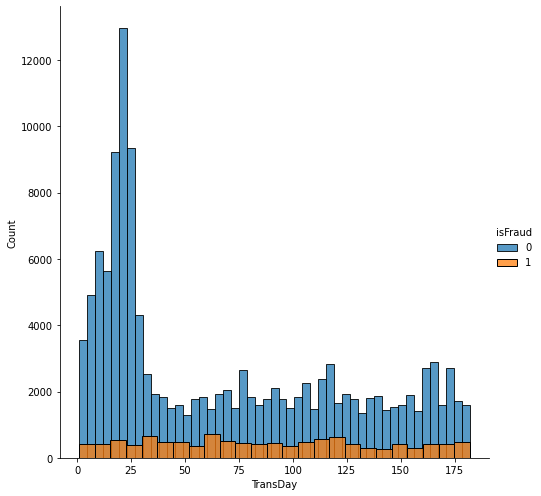

In [ ]:
sns.FacetGrid(data,hue='isFraud',height = 7).map(sns.histplot,'TransDay').add_legend()

Fraudulent transactions are not having much variation when it comes to date

Transaction Hour

In [ ]:
TransactionHr = TransactionDT//(60*60)
TransactionHr_test = TransactionDT_test//(60*60)

In [ ]:
hr = 0
TransactionHr24 = []
TransactionHr24_test = []
for i in range(len(TransactionHr)):
  TransactionHr24.append(hr)
  hr+=1
  if hr%24==0:
    hr = 0
hr = 0
for i in range(len(TransactionHr_test)):
  TransactionHr24_test.append(hr)
  hr+=1
  if hr%24==0:
    hr = 0
TransactionHr24
data['TransHr'] = TransactionHr24
trainA['TransHr'] = TransactionHr24
testA['TransHr'] = TransactionHr24_test

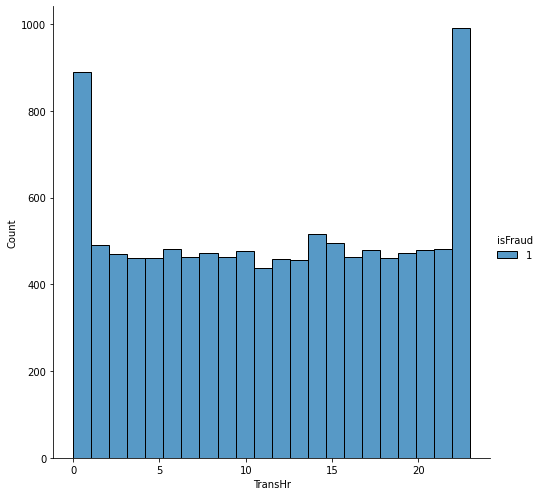

In [ ]:
sns.FacetGrid(data[data['isFraud']==1],hue='isFraud',height = 7).map(sns.histplot,'TransHr').add_legend()

We can see that the Fraudulent Transactions are more at 0th and 23rd hour

Transaction Week

In [ ]:
TransWeek = []
TransWeek_test = []
w = 0
cnt = 0
for i in range(len(TransDay)):
  TransWeek.append(w)
  cnt+=1
  if cnt%7==0:
    w+=1
w = 0
cnt = 0
for i in range(len(TransDay_test)):
  TransWeek_test.append(w)
  cnt+=1
  if cnt%7==0:
    w+=1
  
data['TransWeek'] = TransWeek
trainA['TransWeek'] = TransWeek
testA['TransWeek'] = TransWeek_test

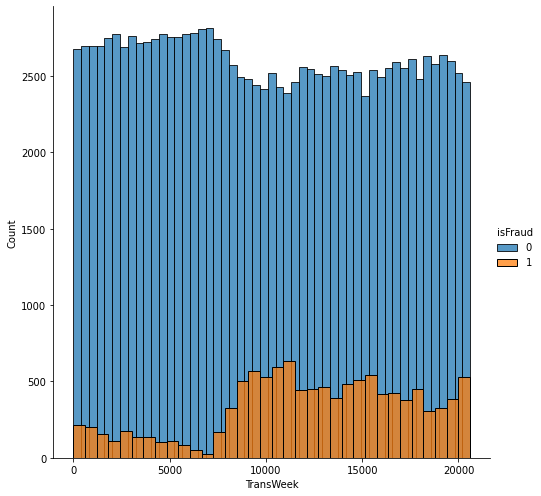

In [ ]:
sns.FacetGrid(data,hue='isFraud',height = 7).map(sns.histplot,'TransWeek').add_legend()

We can observe that in starting weeks there is a dip in the Fraudulent transaction where as its more in next half of the graph , ie next 3 months approximately

TransactionAmt is split into Cents and Dollars 

In [ ]:
Amt = data['TransactionAmt']
Amt_test = data_test['TransactionAmt']
cents = []
dollars = []
for i in range(len(Amt)):
  f = np.floor(Amt[i])
  if f==0:
    cent = 0
  else:
    cent = Amt[i]%np.floor(Amt[i])
  cents.append(np.round(cent,4))
  dollar = np.round(Amt[i])
  dollars.append(dollar)

data['TransactionDollar'] = dollars
data['TransactionCent'] = cents

trainA['TransactionDollar'] = dollars
trainA['TransactionCent'] = cents

cents = []
dollars = []
for i in range(len(Amt_test)):
  f = np.floor(Amt_test[i])
  if f==0:
    cent = 0
  else:
    cent = Amt_test[i]%np.floor(Amt_test[i])
  cents.append(np.round(cent,4))
  dollar = np.round(Amt_test[i])
  dollars.append(dollar)

testA['TransactionDollar'] = dollars
testA['TransactionCent'] = cents

In [ ]:
#dropping TransactionAmt 
data.drop(labels=['TransactionAmt'],inplace=True,axis=1)

In [ ]:
trainA.drop(labels=['TransactionAmt'],inplace=True,axis=1)
testA.drop(labels=['TransactionAmt'],inplace=True,axis=1)

Transforming D features

In [ ]:
for i in range(1,16):
  trainA['D'+str(i)+'n'] = abs(data['D'+str(i)]-trainA['TransDay']).fillna(-999)
  testA['D'+str(i)+'n'] = abs(data_test['D'+str(i)]-testA['TransDay']).fillna(-999)


emaildomain

Train data 

In [ ]:
P_domain = data['P_emaildomain'].str.split('.')
R_domain = data['R_emaildomain'].str.split('.')

P_domain_last = []
P_domain_first = []
R_domain_last = []
R_domain_first = []
for i in range(len(P_domain)):
  if type(P_domain[i])!=float:
    P_domain_last.append(P_domain[i][-1])
    P_domain_first.append(P_domain[i][0])
  else:
    P_domain_last.append(np.nan)
    P_domain_first.append(np.nan)
  if type(R_domain[i])!=float:
    R_domain_last.append(R_domain[i][-1])
    R_domain_first.append(R_domain[i][0])
  else:
    R_domain_last.append(np.nan)
    R_domain_first.append(np.nan)

trainA['P_domain_first'] = P_domain_first
trainA['P_domain_last'] = P_domain_last
trainA['R_domain_first'] = R_domain_first
trainA['R_domain_last'] = R_domain_last

test data

In [ ]:
P_domain = data_test['P_emaildomain'].str.split('.')
R_domain = data_test['R_emaildomain'].str.split('.')

P_domain_last = []
P_domain_first = []
R_domain_last = []
R_domain_first = []
for i in range(len(P_domain)):
  if type(P_domain[i])!=float:
    P_domain_last.append(P_domain[i][-1])
    P_domain_first.append(P_domain[i][0])
  else:
    P_domain_last.append(np.nan)
    P_domain_first.append(np.nan)
  if type(R_domain[i])!=float:
    R_domain_last.append(R_domain[i][-1])
    R_domain_first.append(R_domain[i][0])
  else:
    R_domain_last.append(np.nan)
    R_domain_first.append(np.nan)

testA['P_domain_first'] = P_domain_first
testA['P_domain_last'] = P_domain_last
testA['R_domain_first'] = R_domain_first
testA['R_domain_last'] = R_domain_last

id features Feature Engineering

In [ ]:
#train
id_30 = data['id_30'].str.split()
os_train = []
version_train = []
for i in id_30:
  if type(i)==float:
    os_train.append(i)
    version_train.append(i)
  else:
    os_train.append(i[0])
    version_train.append(i[-1])
trainA['os'] = os_train
trainA['version'] = version_train

#test
id_30 = data_test['id-30'].str.split()
os_test = []
version_test = []
for i in id_30:
  if type(i)==float:
    os_test.append(i)
    version_test.append(i)
  else:
    os_test.append(i[0])
    version_test.append(i[-1])

testA['os'] = os_test
testA['version'] = version_test

In [ ]:
def version_split(data):
  version_1 = []
  for i in data['version'].str.split('[._]',1):
    if type(i)!=float:
      version_1.append(i[0])
    else:
      version_1.append(i)
  return version_1

trainA['version1'] = version_split(trainA)
testA['version1'] = version_split(testA)

seperating length and width of screen size

In [ ]:
data['id_33'].str.split('x')
def length_width(data):
  length = []
  width = []
  for i in data['id_33'].str.split('x'):
    if type(i)!=float:
      length.append(int(i[0]))
      width.append(int(i[1]))
    else:
      length.append(i)
      width.append(i)
  return length,width


trainA['screen_length'],trainA['screen_width'] = length_width(data)
testA['screen_length'],testA['screen_width'] = length_width(data_test)


In [ ]:
trainA.loc[:,'P_domain_first':'screen_width']

,P_domain_first,P_domain_last,R_domain_first,R_domain_last,os,version,version1,screen_length,screen_width
0,gmail,com,NaN,NaN,Android,7.0,7,2220.0,1080.0
1,anonymous,com,NaN,NaN,iOS,11.1.2,11,1334.0,750.0
2,gmail,com,gmail,com,NaN,NaN,NaN,NaN,NaN
3,hotmail,com,hotmail,com,NaN,NaN,NaN,NaN,NaN
4,aol,com,NaN,NaN,Mac,10_11_6,10,1280.0,800.0
...,...,...,...,...,...,...,...,...,...
144228,yahoo,fr,yahoo,fr,NaN,NaN,NaN,NaN,NaN
144229,gmail,com,gmail,com,Android,7.1.1,7,855.0,480.0
144230,gmail,com,gmail,com,NaN,NaN,NaN,NaN,NaN
144231,gmail,com,anonymous,com,Mac,10_9_5,10,2560.0,1600.0


In [ ]:
def cat_num(data,column):
  data[column].replace(data[column].value_counts().index,np.arange(len(data[column].value_counts())),inplace=True)

#cat_num(trainA,'P_domain_first')
for i in trainA.loc[:,'P_domain_first':].columns:
  cat_num(trainA,i)
  cat_num(testA,i)

In [ ]:
trainA.loc[:,'P_domain_first':] = trainA.loc[:,'P_domain_first':].fillna(-999)
testA.loc[:,'P_domain_first':] = testA.loc[:,'P_domain_first':].fillna(-999)

In [ ]:
trainA.shape,testA.shape

((144233, 222), (506691, 222))

In [ ]:
trainA.shape,testA.shape
trainA.to_pickle('trainA_FE28.pkl')
testA.to_pickle('testA_FE28.pkl')
files.download('trainA_FE28.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('testA_FE28.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
trainA.shape,testA.shape

((144233, 222), (506691, 222))

We can observe that most of the transactions are having 0 cents and there are having more Fraudulent transactions

In [ ]:
target = data['isFraud']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
X_train , X_cv , y_train , y_cv = trainA.iloc[0:114233,:],trainA.iloc[114233:,:],target[0:114233],target[114233:]
#https://scikit-learn.org/stable/modules/preprocessing.html
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
clf = xgb.XGBClassifier( 
        base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=0.5, colsample_bytree=0.9871152273968631, eval_metric='auc',
              gamma=5.7286862437406345, learning_rate=0.1, max_delta_step=1, max_depth=5,
              min_child_weight=4, missing=None, n_estimators=100, n_jobs=1,
              nthread=-1, objective='binary:logistic', random_state=3,
              reg_alpha=47, reg_lambda=0.9511834927999878, scale_pos_weight=10.94848913235554,
              seed=None, silent=None, subsample=1,
              #,tree_method = 'gpu_hist',
              verbosity=1
                        )
clf.fit(X_train,y_train, 
            eval_set = [(X_cv,y_cv)],
            verbose=50, eval_metric = 'auc', early_stopping_rounds=2000)
y_cv_pred = clf.predict(X_cv)
y_cv_pred_prob = clf.predict_proba(X_cv)
cf_matrix = confusion_matrix(y_cv, y_cv_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix : XGB cv')
print('='*100)
roc_xgb_cv = roc_auc_score(y_cv, clf.predict_proba(X_cv)[:, 1])
roc_xgb_train = roc_auc_score(y_train,clf.predict_proba(X_train)[:, 1])
print('AUC train:',roc_xgb_train)
print('AUC cv :',roc_xgb_cv)
print('='*100)
test1 = clf.predict_proba(testA[0:100000])[:,1]
test2_ = clf.predict_proba(testA[100000:150000])[:,1]
test3 = clf.predict_proba(testA[150000:200000])[:,1]
test4 = clf.predict_proba(testA[200000:300000])[:,1]
test5 = clf.predict_proba(testA[300000:400000])[:,1]
test6 = clf.predict_proba(testA[400000:500000])[:,1]
test7 = clf.predict_proba(testA[500000:])[:,1]
y_test = list(test1)+list(test2_)+list(test3)+list(test4)+list(test5)+list(test6)+list(test7)
Output = pd.DataFrame(np.column_stack((Trans,y_test)),columns=['TransactionID','isFraud'])
Output['TransactionID']=[int(i) for i in Trans]
print(Output.head())
Output.to_csv('SubmissionXGB_222.csv',index = False)
files.download('SubmissionXGB_222.csv')

NameError: ignored

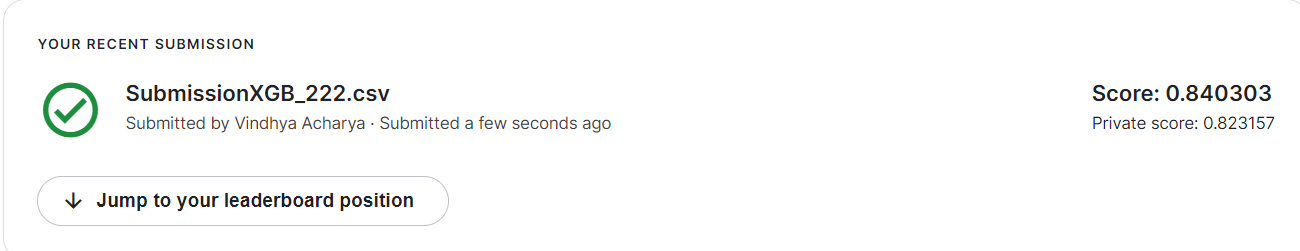

Feature Importance

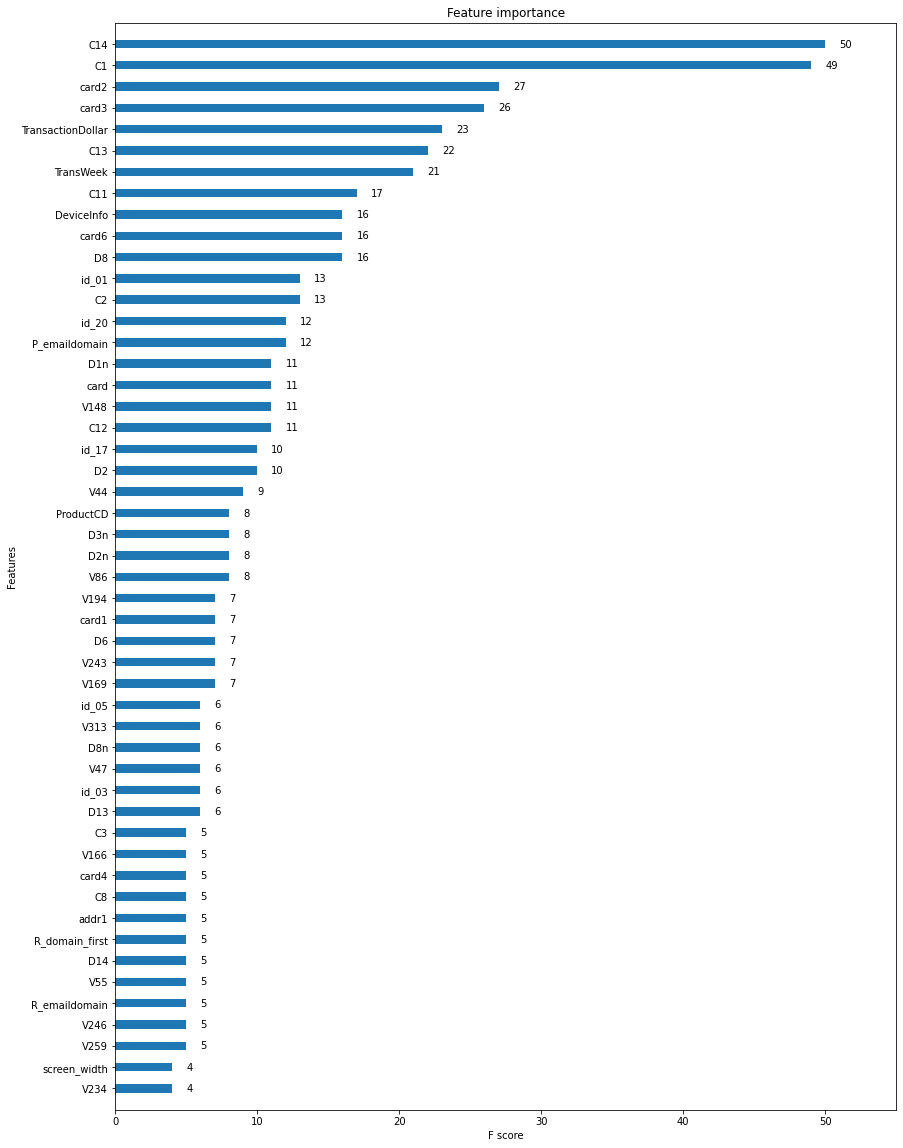

In [ ]:
#https://medium.com/@mr.priyankmishra/a-realistic-approach-to-ieee-cis-fraud-detection-25faea54137
plt.rcParams["figure.figsize"] = (14, 20)
xgb.plot_importance(clf,max_num_features=50, grid=False, height=0.4)
plt.show()

In [ ]:
card = trainA.loc[:,['V243','C2','C1','V260','C13','C14','V138','C11','V187','V86','D10','V291','id_15','V173','id_20','V130']]
card['idFraud'] = target
corr = card.corr()
corr.style.background_gradient(cmap='coolwarm')

,V243,C2,C1,V260,C13,C14,V138,C11,V187,V86,D10,V291,id_15,V173,id_20,V130,idFraud
V243,1.000000,-0.061913,-0.063327,1.000000,-0.063978,-0.089376,0.194650,-0.070785,0.408220,-0.119498,-0.187967,-0.001224,0.291679,0.408268,0.347390,0.040934,-0.003057
C2,-0.061913,1.000000,0.995925,-0.061915,0.986927,0.970542,-0.082468,0.994857,0.014741,0.075867,-0.079557,0.000250,0.012276,0.014716,0.012680,0.000982,0.040319
C1,-0.063327,0.995925,1.000000,-0.063328,0.983980,0.975822,-0.071196,0.996471,0.014397,0.066028,-0.082876,0.000409,0.011673,0.014369,0.012060,0.001457,0.034436
V260,1.000000,-0.061915,-0.063328,1.000000,-0.063980,-0.089378,0.194671,-0.070787,0.408241,-0.119514,-0.187981,-0.001224,0.291703,0.408289,0.347411,0.040935,-0.003055
C13,-0.063978,0.986927,0.983980,-0.063980,1.000000,0.966220,-0.065691,0.988350,0.016010,0.073070,-0.084126,0.000490,0.012155,0.015988,0.007308,0.001856,0.013125
C14,-0.089376,0.970542,0.975822,-0.089378,0.966220,1.000000,-0.049463,0.987512,0.016179,0.047873,-0.092670,0.000454,0.012549,0.016136,0.012827,0.002159,0.014549
V138,0.194650,-0.082468,-0.071196,0.194671,-0.065691,-0.049463,1.000000,-0.068255,0.042579,-0.819607,-0.818314,0.004124,-0.021794,0.042540,-0.045522,0.024084,-0.143788
C11,-0.070785,0.994857,0.996471,-0.070787,0.988350,0.987512,-0.068255,1.000000,0.014835,0.063595,-0.086721,0.000315,0.012031,0.014804,0.012321,0.001794,0.029325
V187,0.408220,0.014741,0.014397,0.408241,0.016010,0.016179,0.042579,0.014835,1.000000,0.033815,-0.015967,-0.000670,0.836021,1.000000,0.670808,0.061739,0.012053
V86,-0.119498,0.075867,0.066028,-0.119514,0.073070,0.047873,-0.819607,0.063595,0.033815,1.000000,0.845762,-0.003815,0.016450,0.033849,0.036345,-0.013005,0.108309


We can see that V243,V257,V258 and V244 are highly correlated

In [ ]:
data[['V243','V257','V258','V244','C2']].isna().sum()

V243    13964
V257    13964
V258    13964
V244    13964
C2          0
dtype: int64

In [ ]:
#Dropping V257,V258,V244
trainA.drop(labels=['V257','V258','V244'],axis=1,inplace = True)
testA.drop(labels=['V257','V258','V244'],axis=1,inplace = True)

Card Features Correlation with Fraud data

In [ ]:
card = trainA.loc[:,['TransDay','card1','card2','card3','card4','card5','card6']]
card['idFraud'] = target
corr = card.corr()
corr.style.background_gradient(cmap='coolwarm')

,TransDay,card1,card2,card3,card4,card5,card6,idFraud
TransDay,1.000000,0.029715,-0.021851,-0.038821,-0.038341,-0.011642,-0.037938,0.089593
card1,0.029715,1.000000,-0.017064,0.003156,-0.000414,0.008729,0.004648,-0.034573
card2,-0.021851,-0.017064,1.000000,0.435755,0.423832,0.319698,0.443180,-0.054923
card3,-0.038821,0.003156,0.435755,1.000000,0.966608,0.423205,0.982889,0.001755
card4,-0.038341,-0.000414,0.423832,0.966608,1.000000,0.410810,0.949950,0.000046
card5,-0.011642,0.008729,0.319698,0.423205,0.410810,1.000000,0.430936,0.002673
card6,-0.037938,0.004648,0.443180,0.982889,0.949950,0.430936,1.000000,0.000857
idFraud,0.089593,-0.034573,-0.054923,0.001755,0.000046,0.002673,0.000857,1.000000


combining card1 , card2 , card3 ,card5b intoo card

In [ ]:
import math as m
card = trainA['card1']+trainA['card2']+trainA['card3']+trainA['card5']
card = pd.DataFrame([m.cos(i) for i in card])

In [ ]:
card['target'] = target
corr = card.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,target
0,1.000000,0.048022
target,0.048022,1.000000


In [ ]:
trainA['card'] = card.iloc[:,0]
#trainA.drop(labels=['card1','card2','card3','card5'],inplace=True,axis=1)

In [ ]:
import math as m
card = testA['card1']+testA['card2']+testA['card3']+testA['card5']
card = pd.DataFrame([m.cos(i) for i in card])
testA['card'] = card.iloc[:,0]
#testA.drop(labels=['card1','card2','card3','card5'],inplace=True,axis=1)

In [ ]:
print(testA.shape,trainA.shape)

(506691, 220) (144233, 220)


C features Correlation with target

In [ ]:
c = trainA.loc[:,'C1':'C14']
c['idFraud'] = target
corr = c.corr()
corr.style.background_gradient(cmap='coolwarm')

,C1,C2,C3,C4,C6,C7,C8,C10,C11,C12,C13,C14,idFraud
C1,1.000000,0.995925,-0.007908,0.985547,0.984381,0.936466,0.984576,0.974005,0.996471,0.938256,0.983980,0.975822,0.034436
C2,0.995925,1.000000,-0.008548,0.982093,0.980771,0.943229,0.985835,0.979986,0.994857,0.944675,0.986927,0.970542,0.040319
C3,-0.007908,-0.008548,1.000000,-0.008429,-0.008865,-0.006810,-0.007247,-0.007655,-0.008205,-0.006839,-0.006731,-0.007766,-0.021697
C4,0.985547,0.982093,-0.008429,1.000000,0.999936,0.882899,0.955632,0.947097,0.994356,0.882400,0.975312,0.998315,0.023192
C6,0.984381,0.980771,-0.008865,0.999936,1.000000,0.879118,0.953220,0.944463,0.993517,0.878621,0.973384,0.998632,0.023176
C7,0.936466,0.943229,-0.006810,0.882899,0.879118,1.000000,0.980857,0.983374,0.925490,0.999454,0.950422,0.859377,0.024719
C8,0.984576,0.985835,-0.007247,0.955632,0.953220,0.980857,1.000000,0.996702,0.980420,0.980922,0.987931,0.940367,0.027660
C10,0.974005,0.979986,-0.007655,0.947097,0.944463,0.983374,0.996702,1.000000,0.972859,0.982057,0.989171,0.931486,0.021927
C11,0.996471,0.994857,-0.008205,0.994356,0.993517,0.925490,0.980420,0.972859,1.000000,0.925985,0.988350,0.987512,0.029325
C12,0.938256,0.944675,-0.006839,0.882400,0.878621,0.999454,0.980922,0.982057,0.925985,1.000000,0.949071,0.858431,0.029909


In [ ]:
trainA

In [ ]:
c = trainA.loc[:,'id_01':'id_37']
c['idFraud'] = target
corr = c.corr()
corr.style.background_gradient(cmap='coolwarm')

,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,idFraud
id_01,1.000000,0.058426,0.060730,0.060731,0.058327,0.058470,0.052327,0.052328,0.056216,0.044711,-0.258300,0.220918,0.055238,0.322186,0.083040,-0.133861,0.083125,0.084068,0.056366,0.056351,0.220199,0.055942,0.220260,0.206986,0.221046,0.056751,0.056119,0.056499,-0.120099
id_02,0.058426,1.000000,0.142288,0.142288,0.665529,0.665528,0.160340,0.160340,0.981567,0.000473,-0.055840,0.172045,0.982595,0.454726,0.826587,0.104184,0.822136,0.817241,0.981581,0.981581,0.166160,0.920365,0.166209,0.156540,0.156485,0.982664,0.982652,0.982675,0.028718
id_03,0.060730,0.142288,1.000000,1.000000,0.123469,0.123488,0.885495,0.885497,0.140355,0.300728,-0.058161,0.074901,0.136296,0.314565,0.103018,-0.009176,0.101876,0.100451,0.143051,0.143103,0.068842,0.114937,0.069025,0.056146,0.069542,0.140209,0.140142,0.141055,0.098683
id_04,0.060731,0.142288,1.000000,1.000000,0.123469,0.123488,0.885495,0.885497,0.140355,0.300730,-0.058161,0.074901,0.136296,0.314565,0.103018,-0.009176,0.101876,0.100451,0.143051,0.143103,0.068842,0.114937,0.069025,0.056146,0.069542,0.140209,0.140142,0.141055,0.098680
id_05,0.058327,0.665529,0.123469,0.123469,1.000000,1.000000,0.132523,0.132525,0.654895,-0.005109,-0.054836,0.088932,0.654054,0.300602,0.798722,0.155848,0.794406,0.789872,0.654982,0.654988,0.087749,0.676039,0.087797,0.085802,0.079814,0.654070,0.654128,0.654183,0.028357
id_06,0.058470,0.665528,0.123488,0.123488,1.000000,1.000000,0.132531,0.132533,0.654894,-0.005119,-0.054861,0.088936,0.654054,0.300634,0.798722,0.155441,0.794408,0.789871,0.654982,0.654988,0.087755,0.676040,0.087803,0.085810,0.079823,0.654070,0.654128,0.654183,0.028339
id_09,0.052327,0.160340,0.885495,0.885495,0.132523,0.132531,1.000000,1.000000,0.157832,0.296582,-0.043083,0.100104,0.154524,0.288225,0.104408,0.009506,0.103316,0.102115,0.161205,0.161270,0.095467,0.134998,0.095727,0.082559,0.093842,0.158059,0.157913,0.158740,0.100502
id_10,0.052328,0.160340,0.885497,0.885497,0.132525,0.132533,1.000000,1.000000,0.157832,0.296583,-0.043083,0.100102,0.154524,0.288225,0.104411,0.009504,0.103318,0.102117,0.161205,0.161270,0.095465,0.134998,0.095726,0.082557,0.093841,0.158059,0.157913,0.158740,0.100502
id_11,0.056216,0.981567,0.140355,0.140355,0.654895,0.654894,0.157832,0.157832,1.000000,-0.000667,-0.055125,0.169665,0.998886,0.447839,0.813379,0.102485,0.809000,0.804184,0.999994,0.999994,0.163879,0.905373,0.163927,0.154392,0.164338,0.998895,0.998898,0.998897,0.026986
id_12,0.044711,0.000473,0.300728,0.300730,-0.005109,-0.005119,0.296582,0.296583,-0.000667,1.000000,-0.087567,0.324425,-0.001616,0.087937,-0.038127,0.051368,-0.036922,-0.036992,0.000265,0.000289,0.336705,-0.034070,0.337135,0.319204,0.340593,0.000705,-0.000422,-0.000385,-0.028771


In [ ]:
c = trainA.loc[:,'DeviceType':'card']
c['idFraud'] = target
corr = c.corr()
corr.style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,DeviceType,DeviceInfo,TransDay,TransHr,TransWeek,TransactionDollar,TransactionCent,D1n,D2n,D3n,D4n,D5n,D6n,D7n,D8n,D9n,D10n,D11n,D12n,D13n,D14n,D15n,P_domain_first,P_domain_last,R_domain_first,R_domain_last,os,version,version1,screen_length,screen_width,card,idFraud
DeviceType,1.000000,0.304822,-0.000858,0.000652,0.002387,-0.004864,0.018206,-0.005696,-0.003309,0.002440,0.023142,0.003848,0.025171,0.007589,0.152619,0.158224,0.022248,nan,0.025627,0.134416,0.134462,0.019105,0.004666,0.004826,-0.000106,-0.000028,0.168585,0.168549,0.168584,0.158809,0.158812,-0.004696,0.027165
DeviceInfo,0.304822,1.000000,-0.056726,0.001299,-0.063230,0.099206,-0.197705,-0.055597,-0.087033,-0.116621,-0.200197,-0.123135,-0.214719,-0.133523,0.130887,0.128305,-0.215262,nan,-0.228526,-0.191084,-0.151575,-0.217410,0.036250,0.035739,-0.052383,-0.052945,0.317128,0.317490,0.317104,0.292795,0.292741,0.006612,-0.031503
TransDay,-0.000858,-0.056726,1.000000,0.000048,0.971685,-0.102241,0.178858,0.487742,0.150742,0.202733,0.204072,0.148745,0.261866,0.208938,0.030753,0.089011,0.288528,nan,0.233167,0.280656,0.226499,0.227580,-0.117529,-0.116624,0.166273,0.166971,-0.211669,-0.211562,-0.211678,-0.170770,-0.170636,0.001636,0.089593
TransHr,0.000652,0.001299,0.000048,1.000000,0.000063,-0.003087,0.004779,0.001896,0.000713,0.005404,0.004968,0.003027,0.008958,0.006595,0.000845,0.001090,0.006484,nan,0.003597,0.003683,0.003213,0.006785,-0.003122,-0.003089,0.000397,0.000413,-0.000860,-0.000861,-0.000847,-0.000087,-0.000070,0.002788,0.005109
TransWeek,0.002387,-0.063230,0.971685,0.000063,1.000000,-0.109124,0.200379,0.477378,0.153456,0.205845,0.229277,0.163187,0.284077,0.217467,0.019636,0.079074,0.314605,nan,0.261019,0.303340,0.246412,0.252191,-0.107205,-0.106156,0.222110,0.222889,-0.236831,-0.236682,-0.236842,-0.195603,-0.195475,0.000345,0.101662
TransactionDollar,-0.004864,0.099206,-0.102241,-0.003087,-0.109124,1.000000,-0.286931,-0.032605,-0.094521,-0.161369,-0.256718,-0.142848,-0.292619,-0.173171,0.086992,0.064488,-0.282752,nan,-0.341792,-0.317413,-0.233390,-0.268934,0.084069,0.082944,0.046571,0.045426,0.323226,0.322776,0.323213,0.301790,0.301677,0.055867,0.015364
TransactionCent,0.018206,-0.197705,0.178858,0.004779,0.200379,-0.286931,1.000000,0.079577,0.128459,0.325125,0.671906,0.407971,0.640433,0.358854,-0.090068,-0.058388,0.638493,nan,0.751150,0.692167,0.532791,0.631837,0.150994,0.152998,0.150147,0.151934,-0.741476,-0.741363,-0.741474,-0.698715,-0.698721,-0.056683,0.123240
D1n,-0.005696,-0.055597,0.487742,0.001896,0.477378,-0.032605,0.079577,1.000000,0.376716,0.202789,0.146587,0.146207,0.195882,0.187195,0.045325,0.067669,0.186840,nan,0.130708,0.157710,0.138152,0.199620,-0.150898,-0.150543,0.102666,0.102941,-0.092544,-0.092559,-0.092493,-0.072137,-0.071878,0.002384,0.020799
D2n,-0.003309,-0.087033,0.150742,0.000713,0.153456,-0.094521,0.128459,0.376716,1.000000,0.663788,0.177999,0.383138,0.273127,0.471380,0.177993,0.207857,0.260755,nan,0.166154,0.225052,0.180852,0.257257,-0.275824,-0.275477,0.090576,0.090826,-0.151753,-0.152085,-0.151691,-0.140433,-0.140081,-0.009056,-0.056932
D3n,0.002440,-0.116621,0.202733,0.005404,0.205845,-0.161369,0.325125,0.202789,0.663788,1.000000,0.398781,0.612346,0.456892,0.659369,0.166648,0.209419,0.455913,nan,0.405682,0.446728,0.351849,0.429487,-0.070763,-0.069745,0.107889,0.108711,-0.391750,-0.392151,-0.391761,-0.365603,-0.365422,-0.027746,0.017894


In [ ]:
trainA.drop(labels=['D11n'],axis=1,inplace=True)
testA.drop(labels=['D11n'],axis=1,inplace=True)

[0]	validation_0-auc:0.816491
Will train until validation_0-auc hasn't improved in 2000 rounds.
[50]	validation_0-auc:0.918832
[99]	validation_0-auc:0.925304
AUC train: 0.9681586480390034
AUC cv : 0.9253043244509467
   TransactionID   isFraud
0        3663549  0.299370
1        3663550  0.222843
2        3663551  0.195011
3        3663552  0.523084
4        3663553  0.308639


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

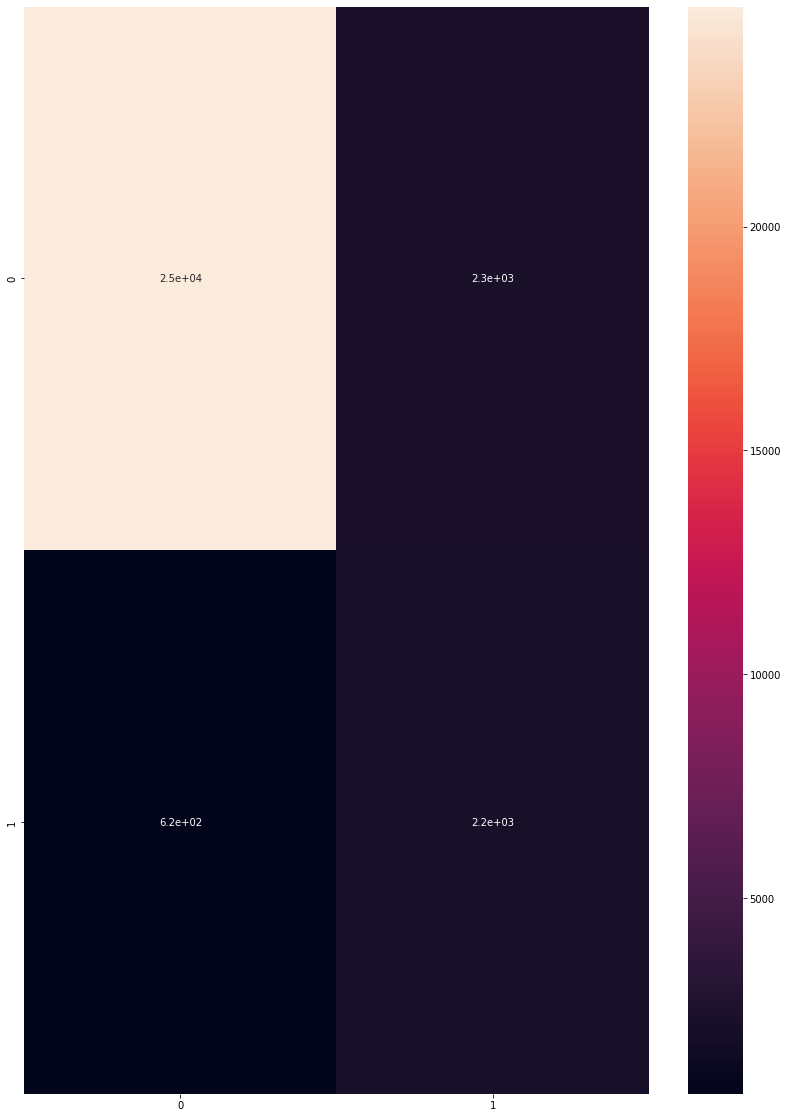

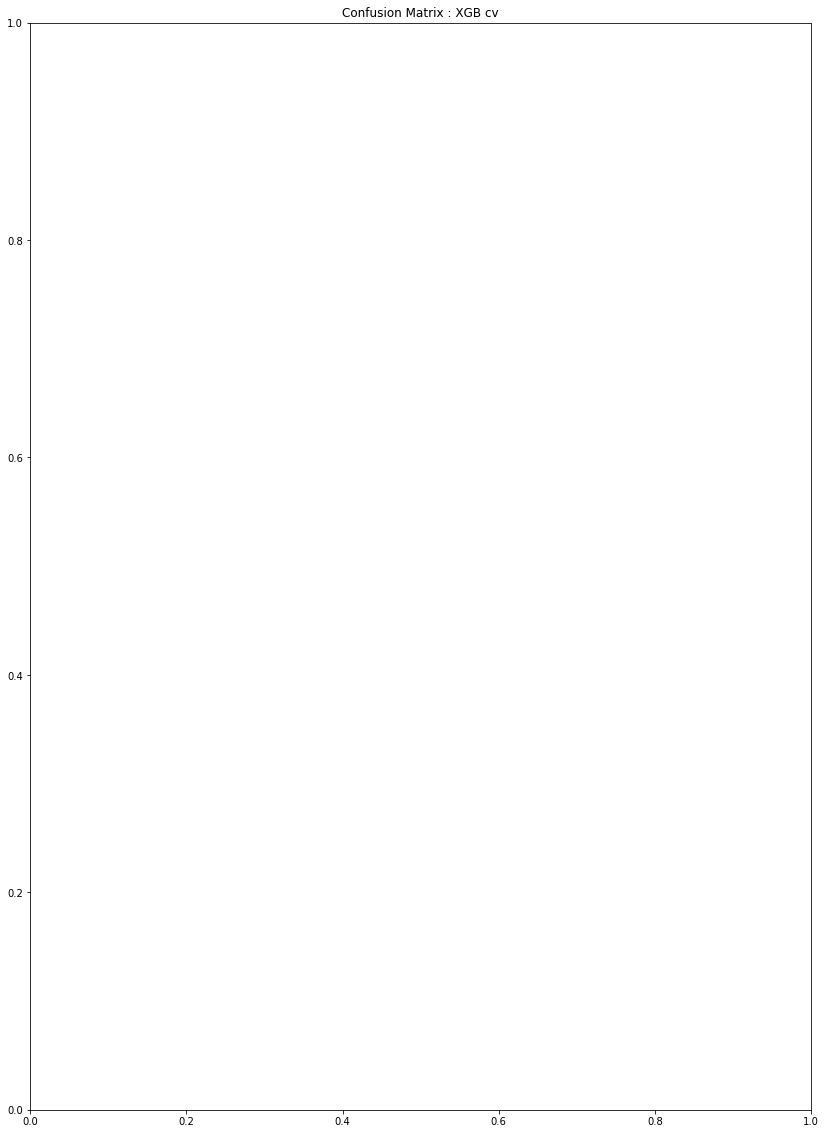

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
X_train , X_cv , y_train , y_cv = trainA.iloc[0:114233,:],trainA.iloc[114233:,:],target[0:114233],target[114233:]
#https://scikit-learn.org/stable/modules/preprocessing.html
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
clf = xgb.XGBClassifier( 
        base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=0.5, colsample_bytree=0.9871152273968631, eval_metric='auc',
              gamma=5.7286862437406345, learning_rate=0.1, max_delta_step=1, max_depth=5,
              min_child_weight=4, missing=None, n_estimators=100, n_jobs=1,
              nthread=-1, objective='binary:logistic', random_state=3,
              reg_alpha=47, reg_lambda=0.9511834927999878, scale_pos_weight=10.94848913235554,
              seed=None, silent=None, subsample=1,
              #,tree_method = 'gpu_hist',
              verbosity=1
                        )
clf.fit(X_train,y_train, 
            eval_set = [(X_cv,y_cv)],
            verbose=50, eval_metric = 'auc', early_stopping_rounds=2000)
y_cv_pred = clf.predict(X_cv)
y_cv_pred_prob = clf.predict_proba(X_cv)
cf_matrix = confusion_matrix(y_cv, y_cv_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix : XGB cv')
print('='*100)
roc_xgb_cv = roc_auc_score(y_cv, clf.predict_proba(X_cv)[:, 1])
roc_xgb_train = roc_auc_score(y_train,clf.predict_proba(X_train)[:, 1])
print('AUC train:',roc_xgb_train)
print('AUC cv :',roc_xgb_cv)

print('='*100)

test1 = clf.predict_proba(testA[0:100000])[:,1]
test2_ = clf.predict_proba(testA[100000:150000])[:,1]
test3 = clf.predict_proba(testA[150000:200000])[:,1]
test4 = clf.predict_proba(testA[200000:300000])[:,1]
test5 = clf.predict_proba(testA[300000:400000])[:,1]
test6 = clf.predict_proba(testA[400000:500000])[:,1]
test7 = clf.predict_proba(testA[500000:])[:,1]
y_test = list(test1)+list(test2_)+list(test3)+list(test4)+list(test5)+list(test6)+list(test7)
Output = pd.DataFrame(np.column_stack((Trans,y_test)),columns=['TransactionID','isFraud'])
Output['TransactionID']=[int(i) for i in Trans]
print(Output.head())
Output.to_csv('SubmissionXGB_hyp_1.csv',index = False)
files.download('SubmissionXGB_hyp_1.csv')

Feature Importance

removing features with 0 importance

In [ ]:
zero_imp = [j for i,j in zip(clf.feature_importances_,trainA.columns) if i == 0]

In [ ]:
print(zero_imp)

['M4', 'V19', 'V22', 'V27', 'V41', 'V50', 'V84', 'V85', 'V88', 'V89', 'V92', 'V95', 'V98', 'V108', 'V111', 'V114', 'V117', 'V120', 'V124', 'V129', 'V228', 'V230', 'V260', 'id_10', 'id_29']


In [ ]:
trainA.drop(labels=zero_imp,axis=1,inplace=True)
testA.drop(labels=zero_imp,axis=1,inplace=True)

In [ ]:
trainA['card4']

SetA : top 125 important features

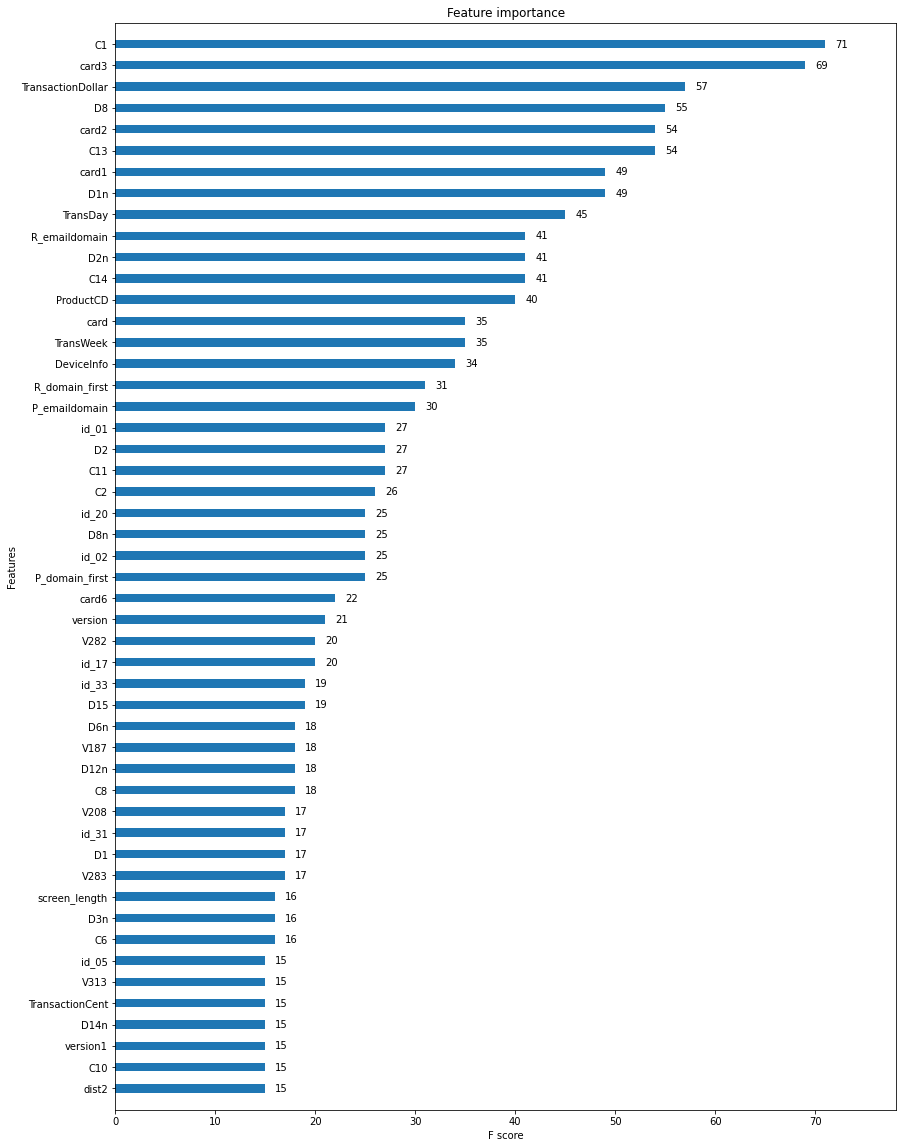

In [ ]:
plt.rcParams["figure.figsize"] = (14, 20)
xgb.plot_importance(clf,max_num_features=50, grid=False, height=0.4)
plt.show()

In [ ]:
trainA.shape,testA.shape

((144233, 194), (506691, 194))

Model with Feature set 1

[0]	validation_0-auc:0.796924
Will train until validation_0-auc hasn't improved in 2000 rounds.
[50]	validation_0-auc:0.916589
[99]	validation_0-auc:0.924524
AUC train: 0.9662848151098371
AUC cv : 0.9245768756142008
   TransactionID   isFraud
0        3663549  0.237702
1        3663550  0.107974
2        3663551  0.223173
3        3663552  0.610066
4        3663553  0.358801


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

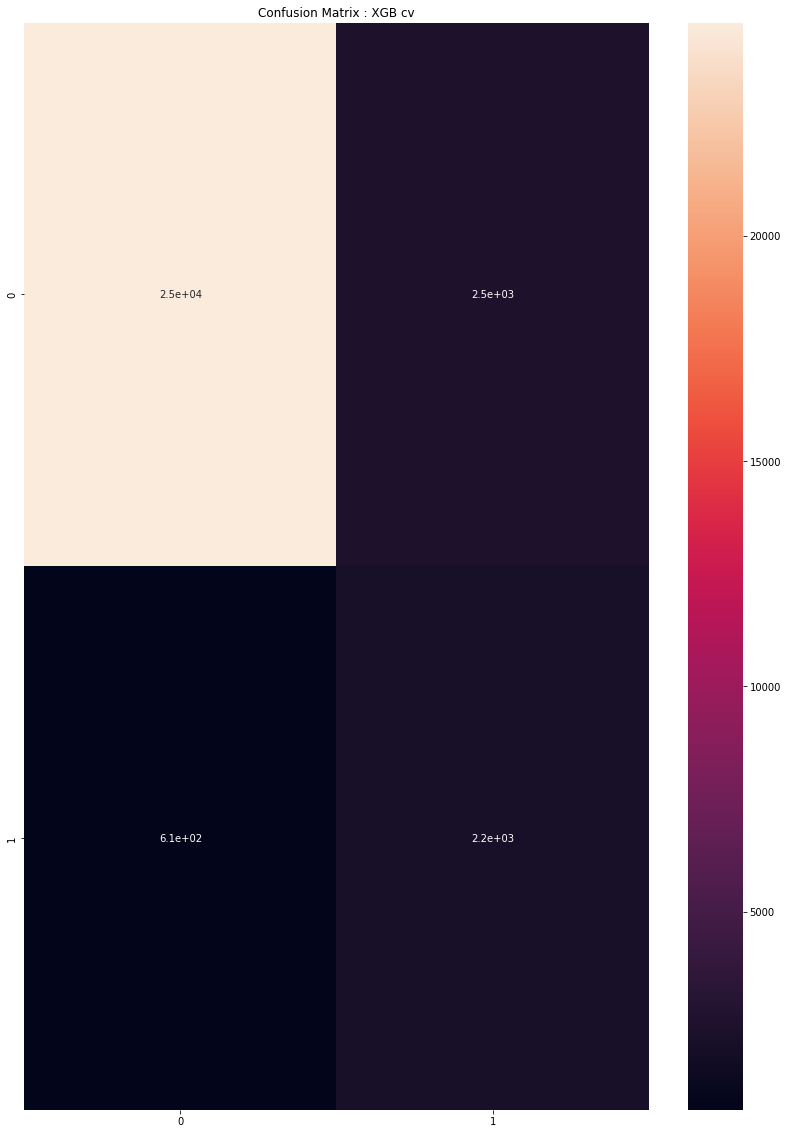

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
X_train , X_cv , y_train , y_cv = trainA.iloc[0:114233,:],trainA.iloc[114233:,:],target[0:114233],target[114233:]
#https://scikit-learn.org/stable/modules/preprocessing.html
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

clf = xgb.XGBClassifier(
    base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=0.5, colsample_bytree=0.9871152273968631, eval_metric='auc',
              gamma=5.7286862437406345, learning_rate=0.1, max_delta_step=1, max_depth=5,
              min_child_weight=4, missing=None, n_estimators=100, n_jobs=1,
              nthread=-1, objective='binary:logistic', random_state=3,
              reg_alpha=47, reg_lambda=0.9511834927999878, scale_pos_weight=10.94848913235554,
              seed=None, silent=None, subsample=1,
              #,tree_method = 'gpu_hist',
              verbosity=1 
                        )
clf.fit(X_train,y_train, 
            eval_set = [(X_cv,y_cv)],
            verbose=50, eval_metric = 'auc', early_stopping_rounds=2000)
y_cv_pred = clf.predict(X_cv)
y_cv_pred_prob = clf.predict_proba(X_cv)
cf_matrix = confusion_matrix(y_cv, y_cv_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix : XGB cv')
print('='*100)
roc_xgb_cv = roc_auc_score(y_cv, clf.predict_proba(X_cv)[:, 1])
roc_xgb_train = roc_auc_score(y_train,clf.predict_proba(X_train)[:, 1])
print('AUC train:',roc_xgb_train)
print('AUC cv :',roc_xgb_cv)
print('='*100)
test1 = clf.predict_proba(testA[0:100000])[:,1]
test2_ = clf.predict_proba(testA[100000:150000])[:,1]
test3 = clf.predict_proba(testA[150000:200000])[:,1]
test4 = clf.predict_proba(testA[200000:300000])[:,1]
test5 = clf.predict_proba(testA[300000:400000])[:,1]
test6 = clf.predict_proba(testA[400000:500000])[:,1]
test7 = clf.predict_proba(testA[500000:])[:,1]
y_test = list(test1)+list(test2_)+list(test3)+list(test4)+list(test5)+list(test6)+list(test7)
Output = pd.DataFrame(np.column_stack((Trans,y_test)),columns=['TransactionID','isFraud'])
Output['TransactionID']=[int(i) for i in Trans]
print(Output.head())
Output.to_csv('SubmissionXGB_remove0imp.csv',index = False)
files.download('SubmissionXGB_remove0imp.csv')

In [ ]:
X_train , X_cv , y_train , y_cv = trainA.iloc[0:114233,:],trainA.iloc[114233:,:],target[0:114233],target[114233:]

In [ ]:
X_train.shape,X_cv.shape

((114233, 194), (30000, 194))

In [ ]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
import xgboost as xgb
from sklearn.metrics import accuracy_score
#https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning/notebook

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }


def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_cv, y_cv)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(testA)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }


trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

  0%|          | 0/100 [00:00<?, ?it/s, best loss: ?]